 ## **Exit Poll prediction Modle** 

<h3>Indian Candidates for General Election Analysis & Prediction of winning</h3>
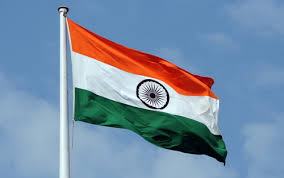
<h4>Description</h4>

### **This is data analysis of past national elections in the india and building a model to predict probable outcome of comming elections in india**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
import pycountry
py.init_notebook_mode(connected=True)
import folium 
from folium import plugins
%config InlineBackend.figure_format = 'retina' 
plt.rcParams['figure.figsize'] = 8, 5
pd.options.mode.chained_assignment = None 
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./indian_national_level_election.csv')
national_data = pd.read_csv('./indian_national_level_election.csv')
df.head(100)

st_name  year  pc_no                    pc_name pc_type  \
0   Andaman & Nicobar Islands  1977      1  Andaman & Nicobar Islands     GEN   
1   Andaman & Nicobar Islands  1977      1  Andaman & Nicobar Islands     GEN   
2   Andaman & Nicobar Islands  1980      1  Andaman & Nicobar Islands     GEN   
3   Andaman & Nicobar Islands  1980      1  Andaman & Nicobar Islands     GEN   
4   Andaman & Nicobar Islands  1980      1  Andaman & Nicobar Islands     GEN   
..                        ...   ...    ...                        ...     ...   
95             Andhra Pradesh  1977      2              Parvathipuram      ST   
96             Andhra Pradesh  1977      3                    Bobbili     GEN   
97             Andhra Pradesh  1977      3                    Bobbili     GEN   
98             Andhra Pradesh  1977      3                    Bobbili     GEN   
99             Andhra Pradesh  1977      3                    Bobbili     GEN   

                                       cand_name cand_sex  \
0                                    K.R. Ganesh        M   
1                              Manoranjan Bhakta        M   
2                                Ramesh Mazumdar        M   
3                                  Alagiri Swamy        M   
4                                    Kannu Chemy        M   
..                                           ...      ...   
95  Vyrichorla Kishore Chandra Suryanarayana Deo        M   
96                           Appalanaidu Gottapu        M   
97                                 U. L. N. Raju        M   
98                                  Ramulu Botsa        M   
99                              Apparao Gudivada        M   

                   partyname partyabbre  totvotpoll  electors  
0               Independents        IND       25168     85308  
1   Indian National Congress        INC       35400     85308  
2               Independents        IND         109     96084  
3               Independents        IND         125     96084  
4               Independents        IND         405     96084  
..                       ...        ...         ...       ...  
95  Indian National Congress        INC      174454    655999  
96              Independents        IND        2497    635653  
97              Independents        IND        5070    635653  
98              Independents        IND        7386    635653  
99              Independents        IND        9126    635653  

[100 rows x 11 columns]

### Explore the number of rows & columns, ranges of values etc

1) What are number of rows and columns ?

In [5]:
print('Number of rows and columns :',df.shape) # Number of rows and columns

Number of rows and columns : (73081, 11)


2. Can you describe given dataset ?

In [6]:
df.describe()

year         pc_no     totvotpoll      electors
count  73081.000000  73081.000000   73081.000000  7.308100e+04
mean    1996.779505     22.311490   49834.760266  1.122277e+06
std       10.432527     19.039793  104893.319706  3.560049e+05
min     1977.000000      1.000000       0.000000  1.947100e+04
25%     1989.000000      7.000000     872.000000  9.129850e+05
50%     1996.000000     18.000000    2743.000000  1.099503e+06
75%     2004.000000     33.000000   19185.000000  1.329086e+06
max     2014.000000     85.000000  863358.000000  3.368399e+06

4).column types

In [7]:
df.dtypes

st_name       object
year           int64
pc_no          int64
pc_name       object
pc_type       object
cand_name     object
cand_sex      object
partyname     object
partyabbre    object
totvotpoll     int64
electors       int64
dtype: object

4) check count of missing values ?

In [11]:

# Calculate the count of missing values in each column
df.isna().sum()   

st_name          0
year             0
pc_no            0
pc_name          0
pc_type       8070
cand_name        0
cand_sex       542
partyname        0
partyabbre       0
totvotpoll       0
electors         0
dtype: int64

#### Observations:   pc_type has 8070 and cand_sex has 542 missing or null values


### Percentage of missing values

In [14]:
df1 = df[df['partyname']!= 'NOTA']
percentage_missing_values = round(df1.isnull().sum()*100/len(df1),2).reset_index()
percentage_missing_values.columns = ['column_name','percentage_missing_values']
percentage_missing_values = percentage_missing_values.sort_values('percentage_missing_values',ascending = False)
percentage_missing_values



column_name  percentage_missing_values
4      pc_type                      11.13
0      st_name                       0.00
1         year                       0.00
2        pc_no                       0.00
3      pc_name                       0.00
5    cand_name                       0.00
6     cand_sex                       0.00
7    partyname                       0.00
8   partyabbre                       0.00
9   totvotpoll                       0.00
10    electors                       0.00

If we exclude NOTA(None Of The Above) rows, there are no missing values.

***to check columns of data***

In [16]:
df.columns

Index(['st_name', 'year', 'pc_no', 'pc_name', 'pc_type', 'cand_name',
       'cand_sex', 'partyname', 'partyabbre', 'totvotpoll', 'electors'],
      dtype='object')

**5. What are the top 5 parties that got most votes in Uttar Pradesh?**

In [17]:
data_2014 = national_data[national_data['year'] == 2014]
up_data_2014 = data_2014[data_2014['st_name'] =='Uttar Pradesh']
up_data_2014_max_voted_party = up_data_2014.groupby('partyabbre')['totvotpoll'].sum()
up_data_2014_max_voted_party = pd.DataFrame(up_data_2014_max_voted_party)
up_data_2014_max_voted_party = up_data_2014_max_voted_party.sort_values(by= 'totvotpoll',ascending=False)
up_data_2014_top5_max_voted_party = up_data_2014_max_voted_party.head(5)
up_data_2014_top5_max_voted_party = up_data_2014_top5_max_voted_party.reset_index()
up_data_2014_top5_max_voted_party 

partyabbre  totvotpoll
0        BJP    34318854
1         SP    17988967
2        BSP    15914194
3        INC     6061267
4        IND     1414869

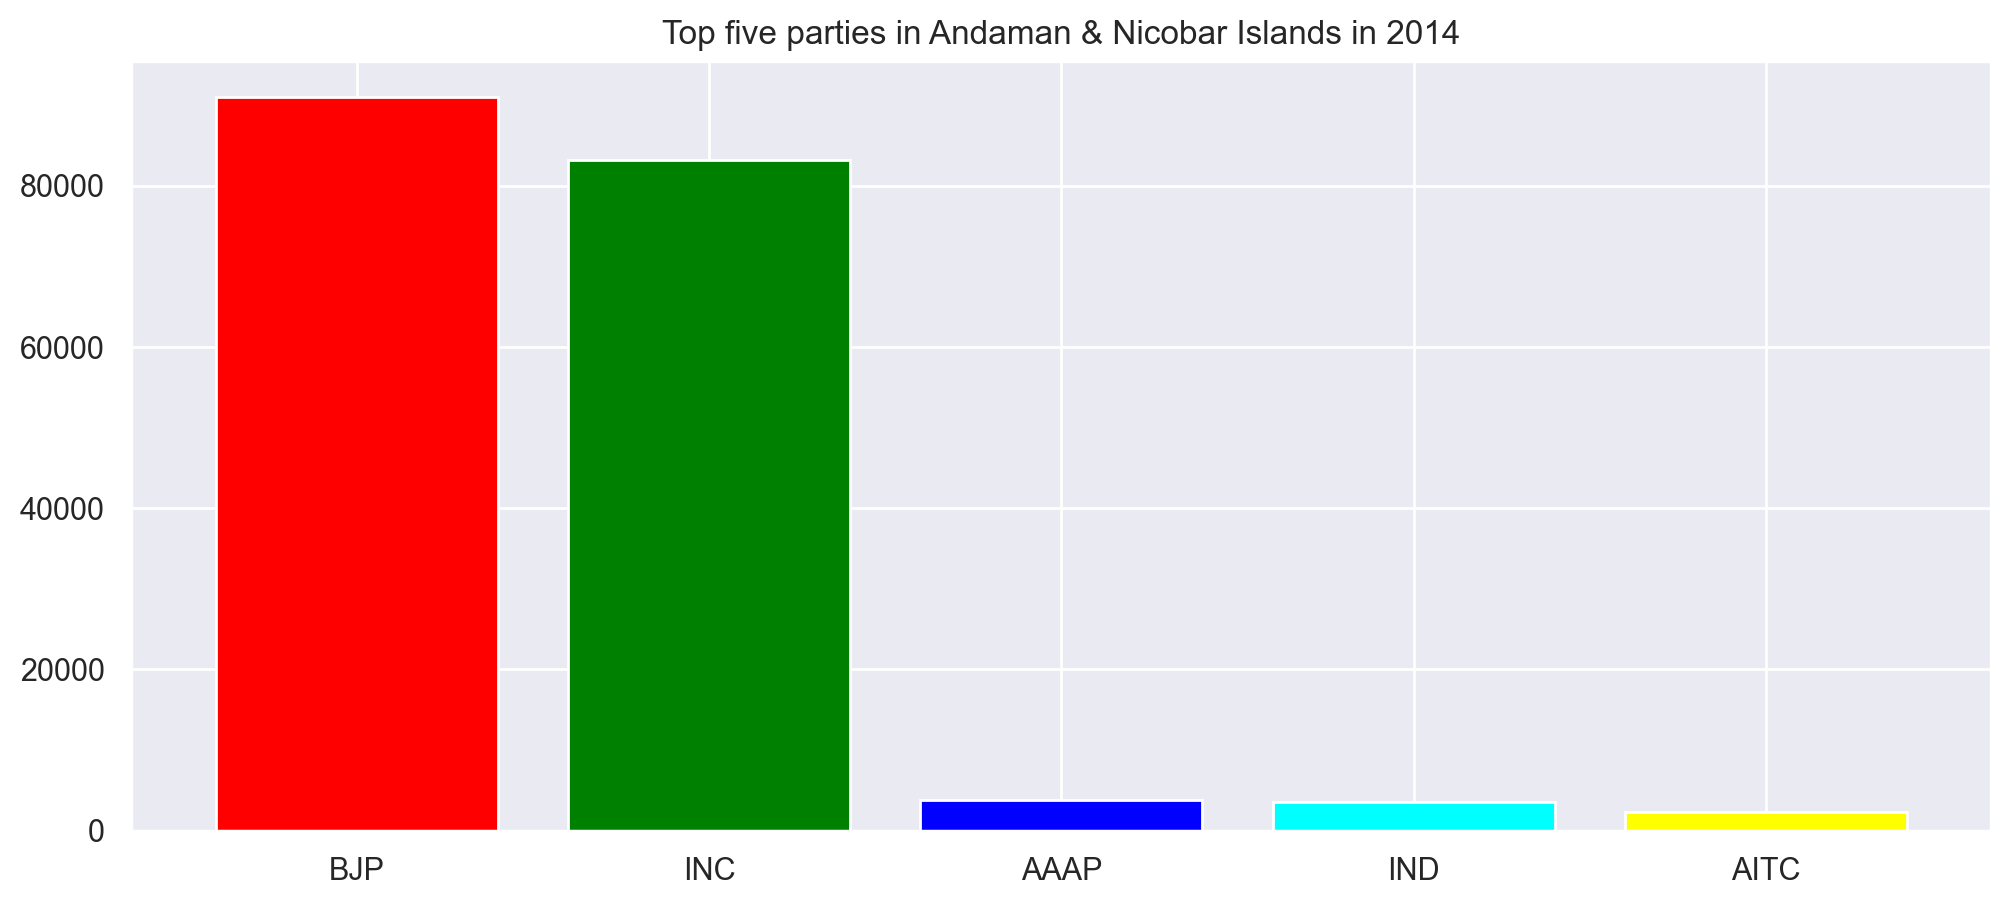

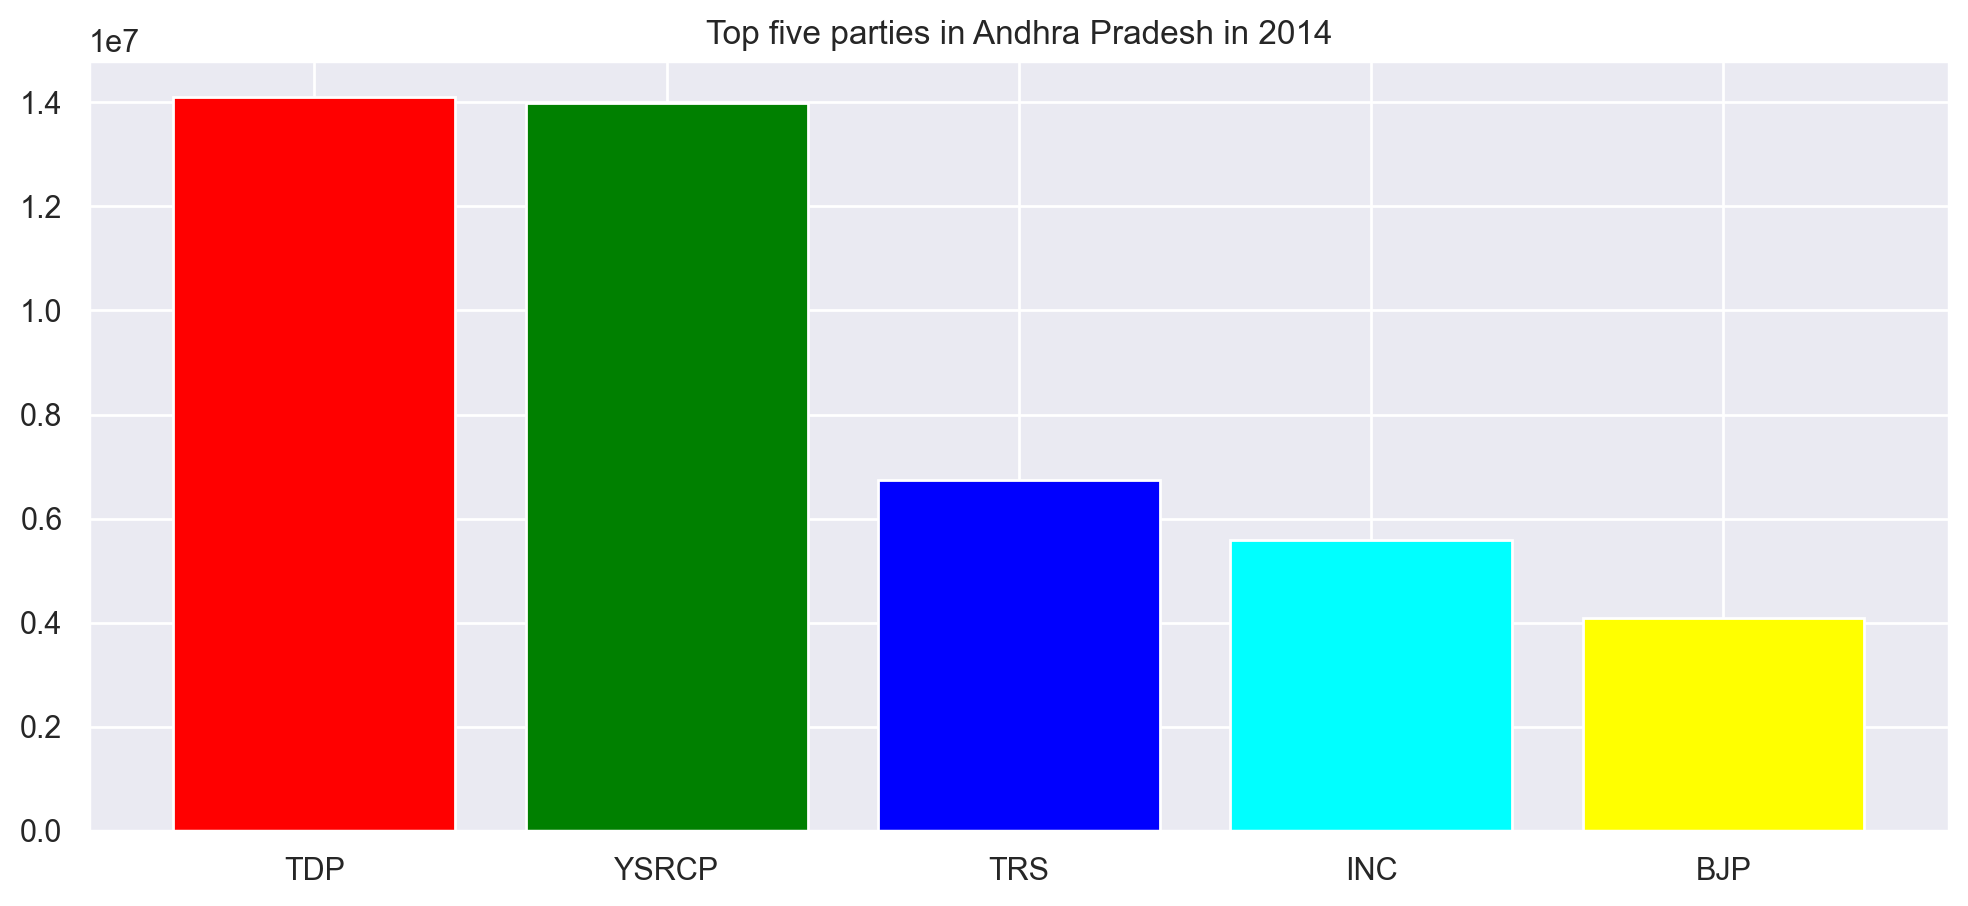

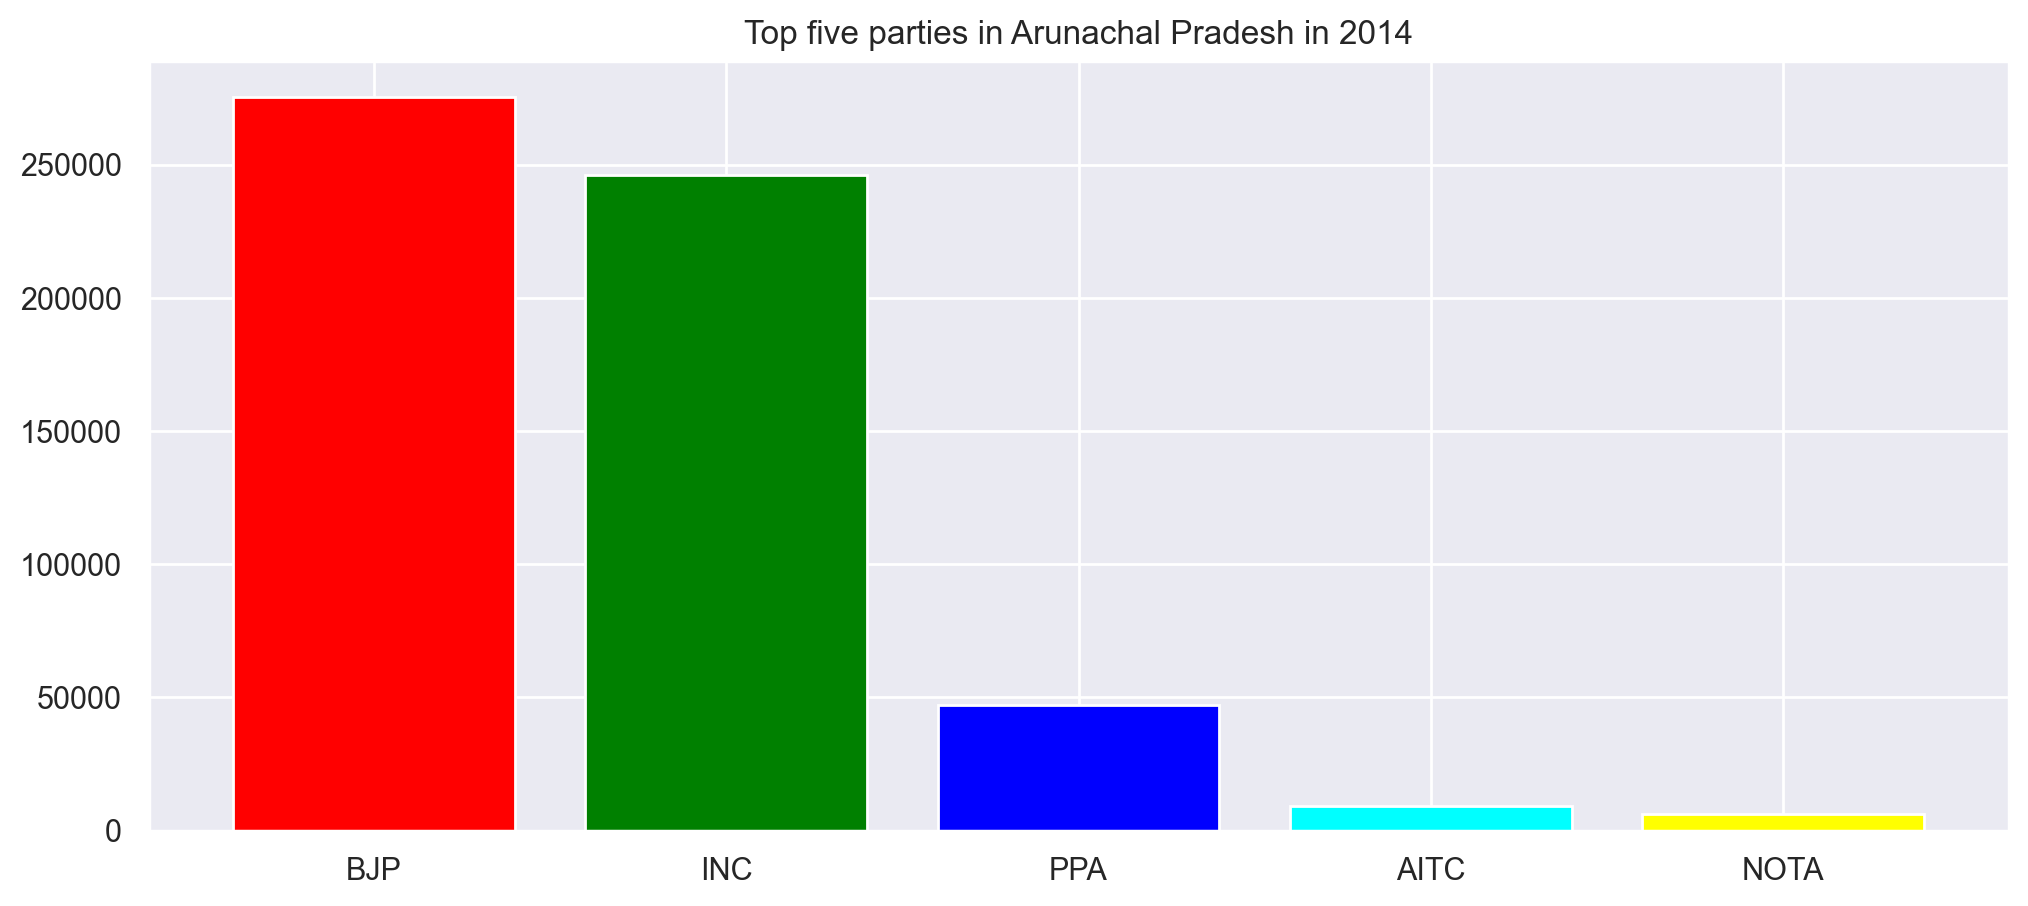

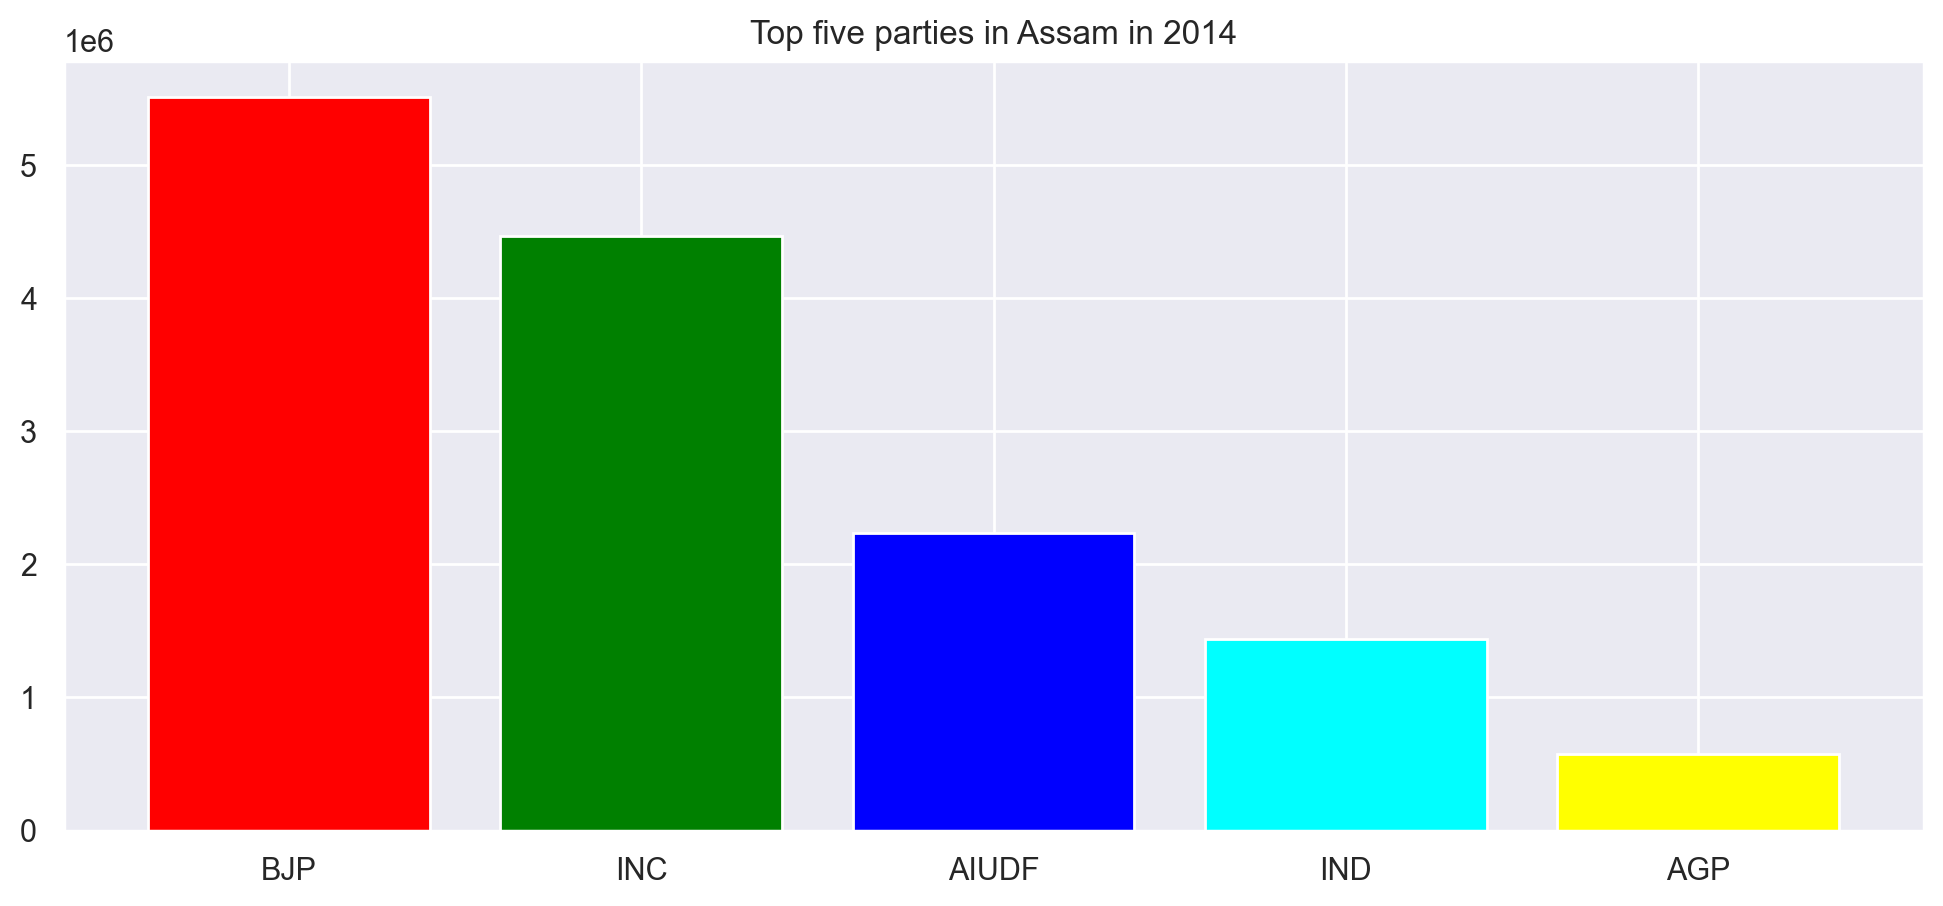

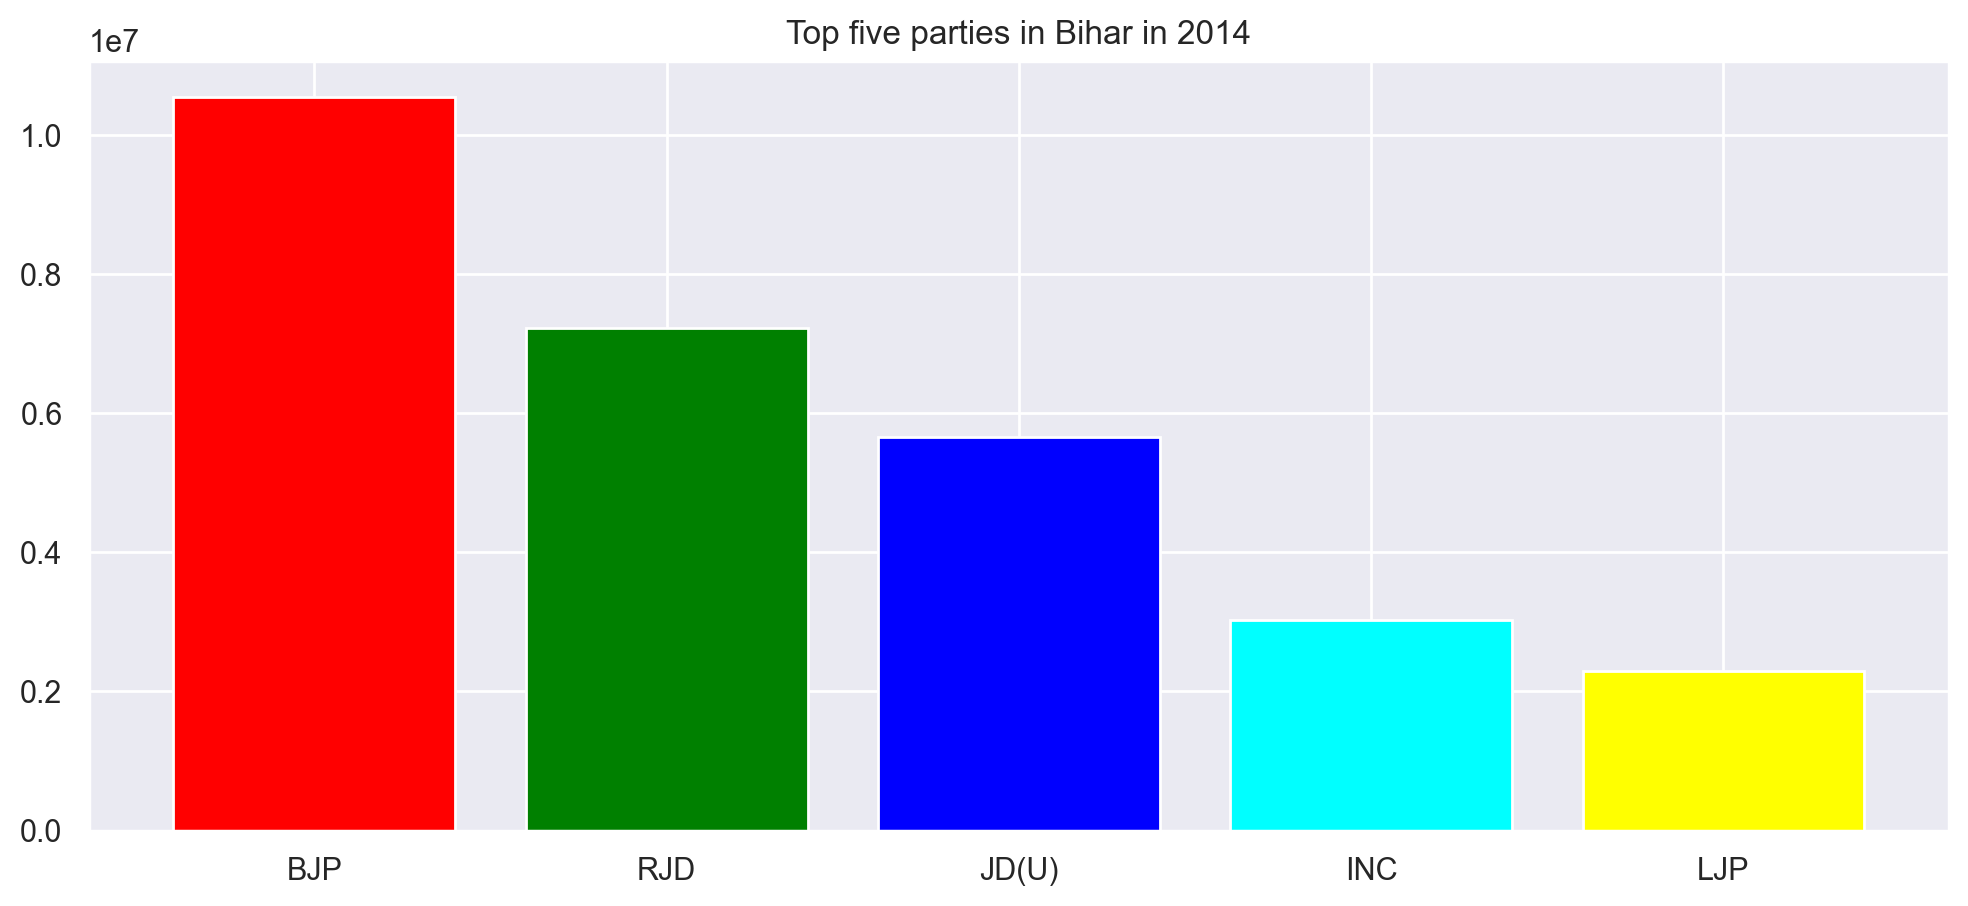

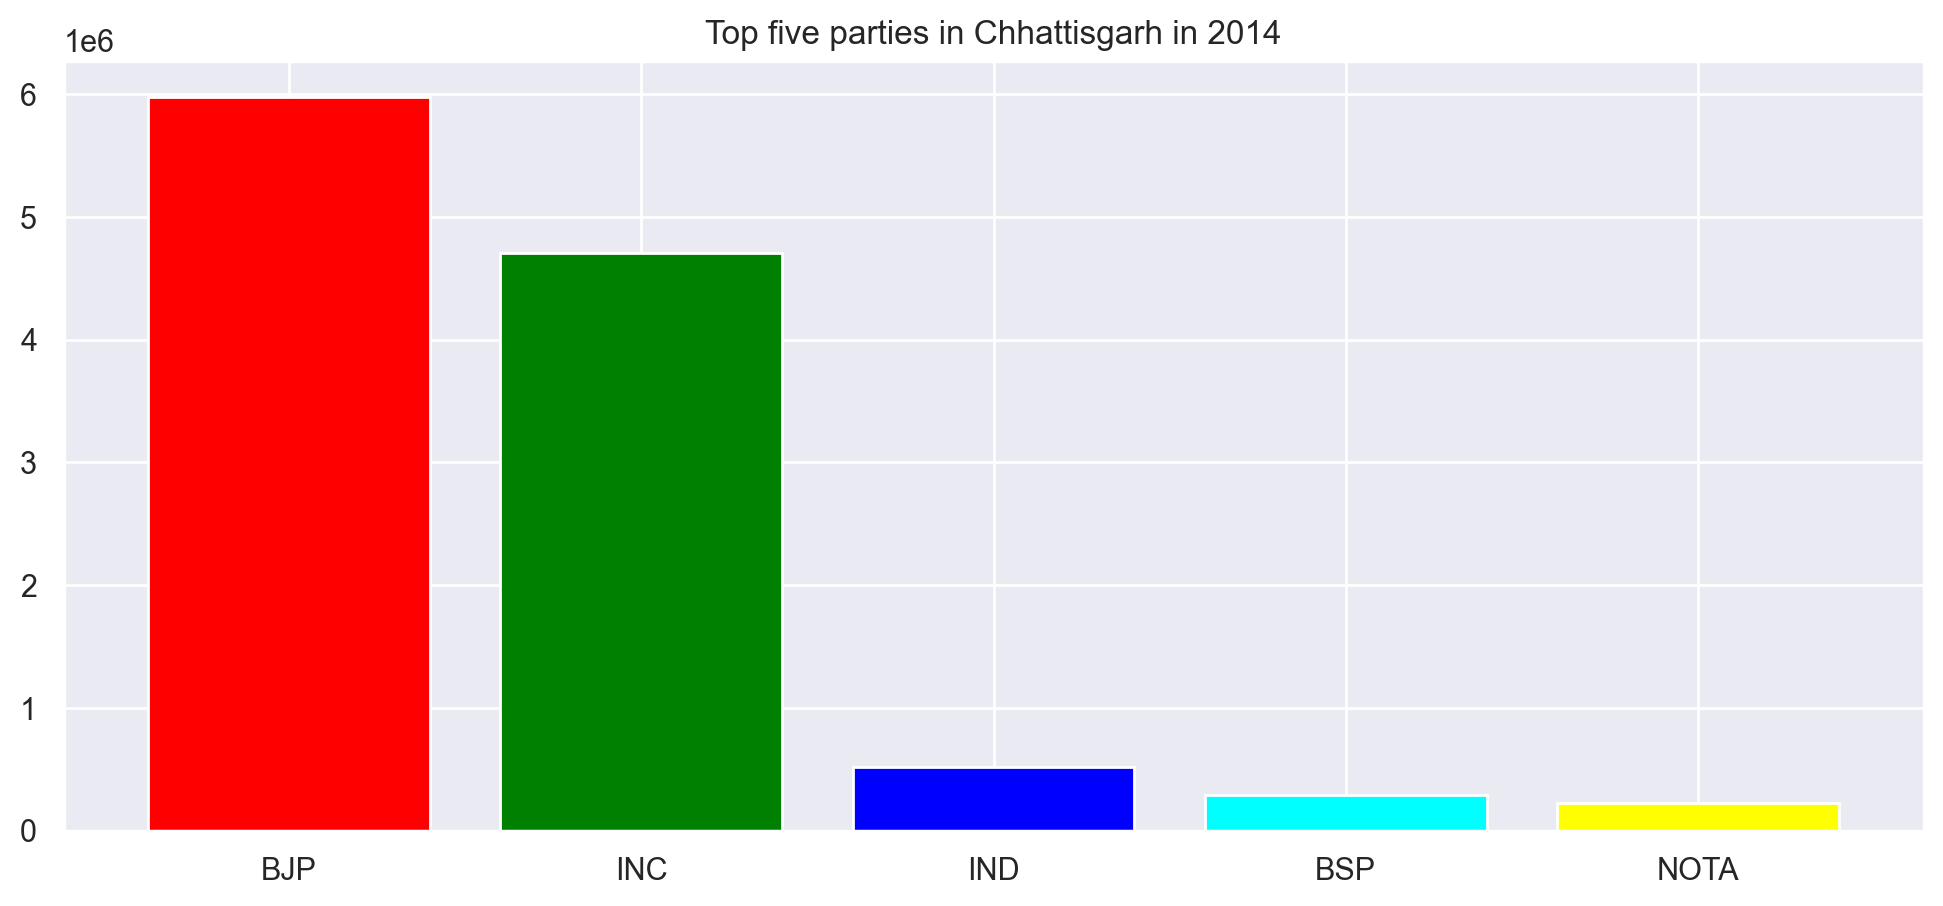

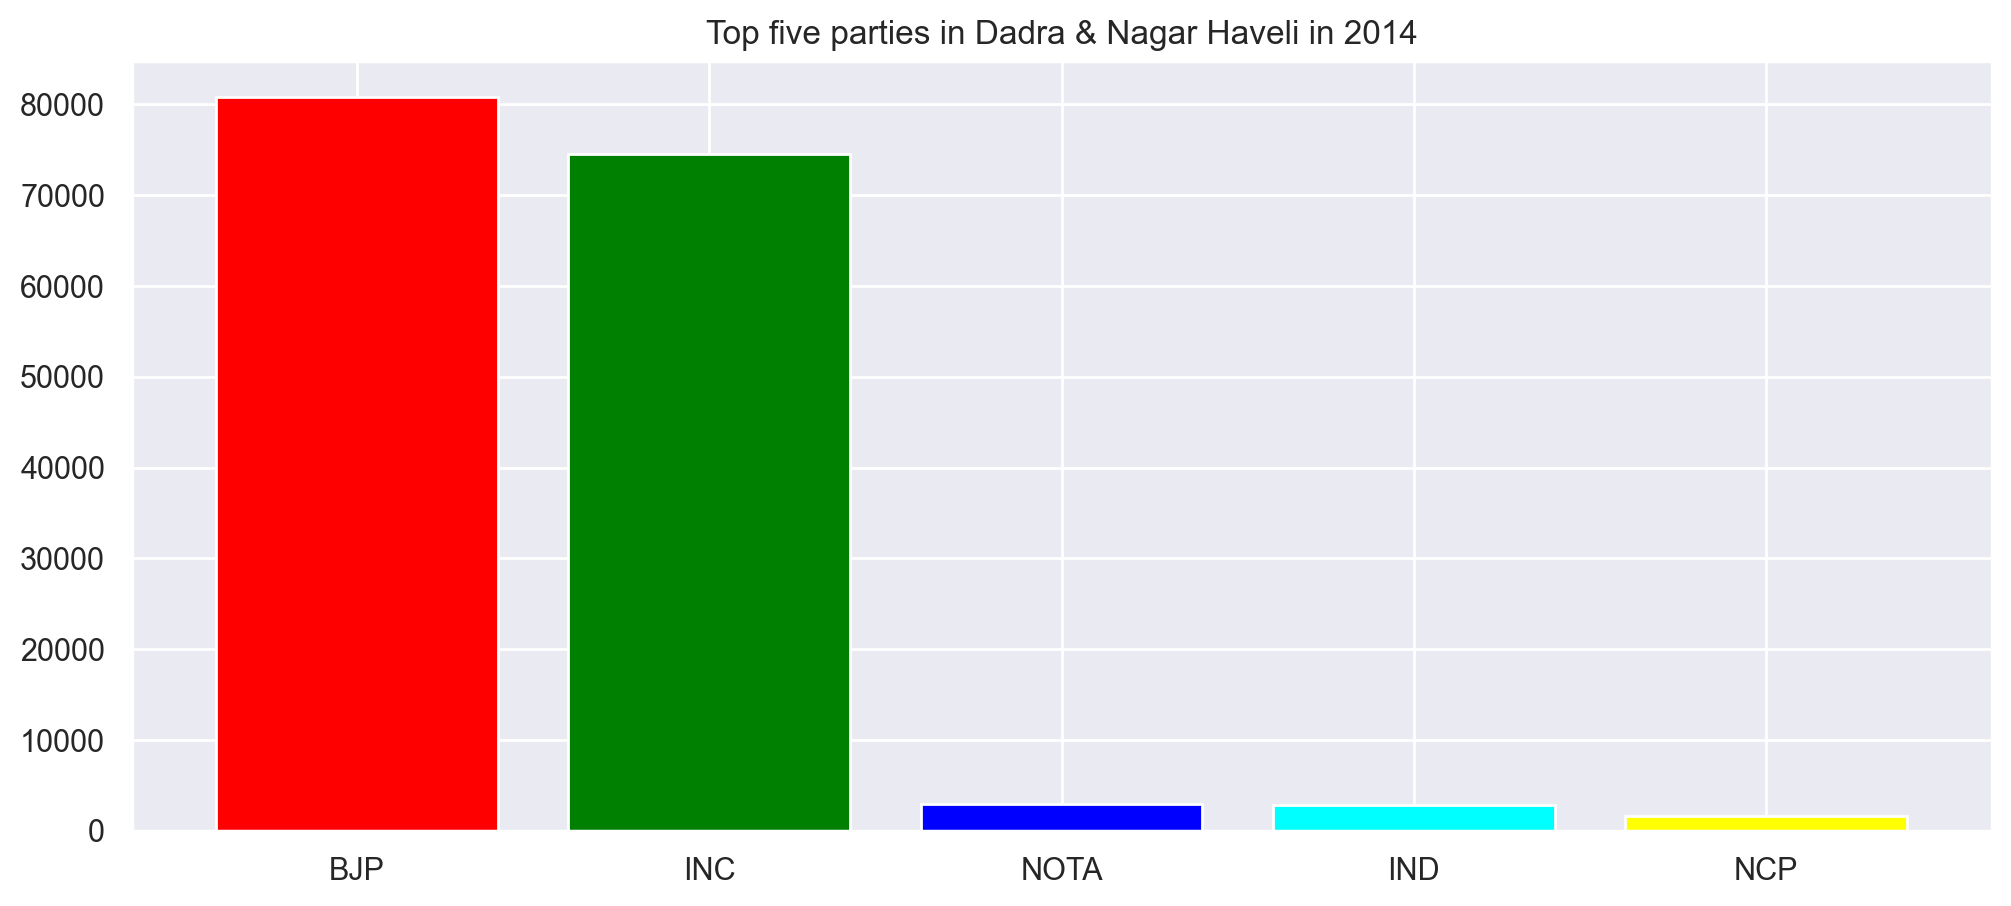

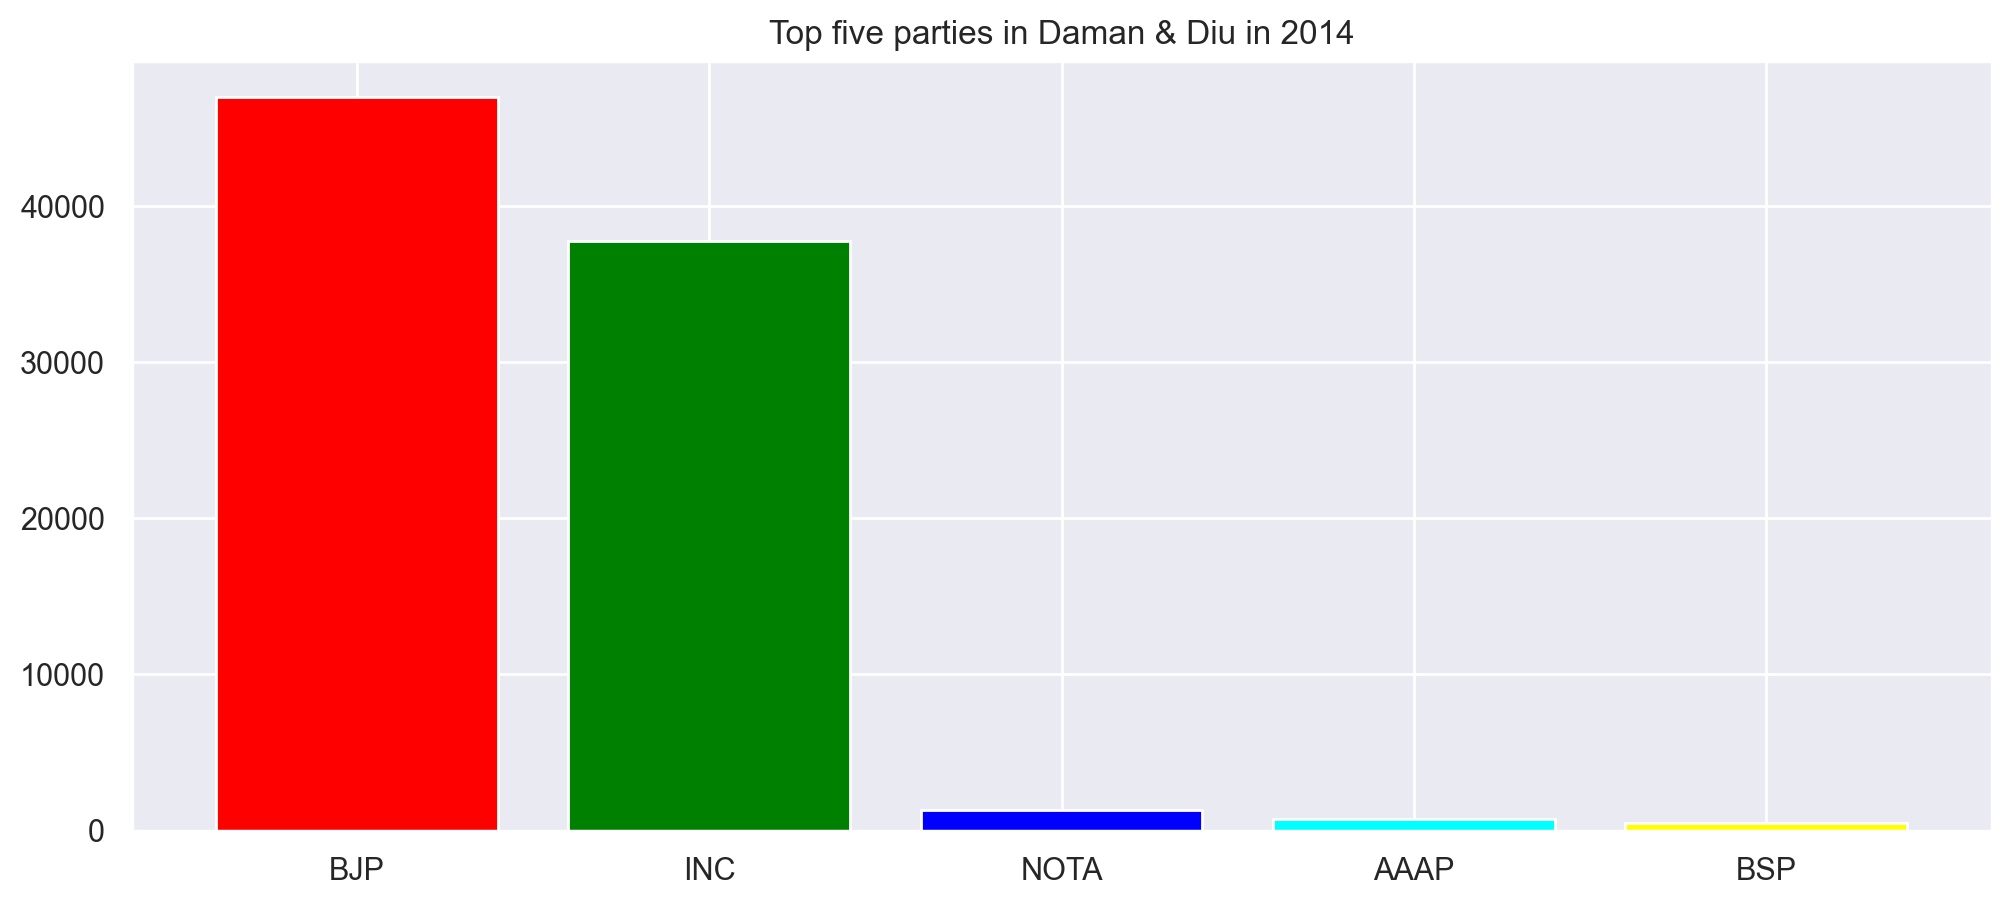

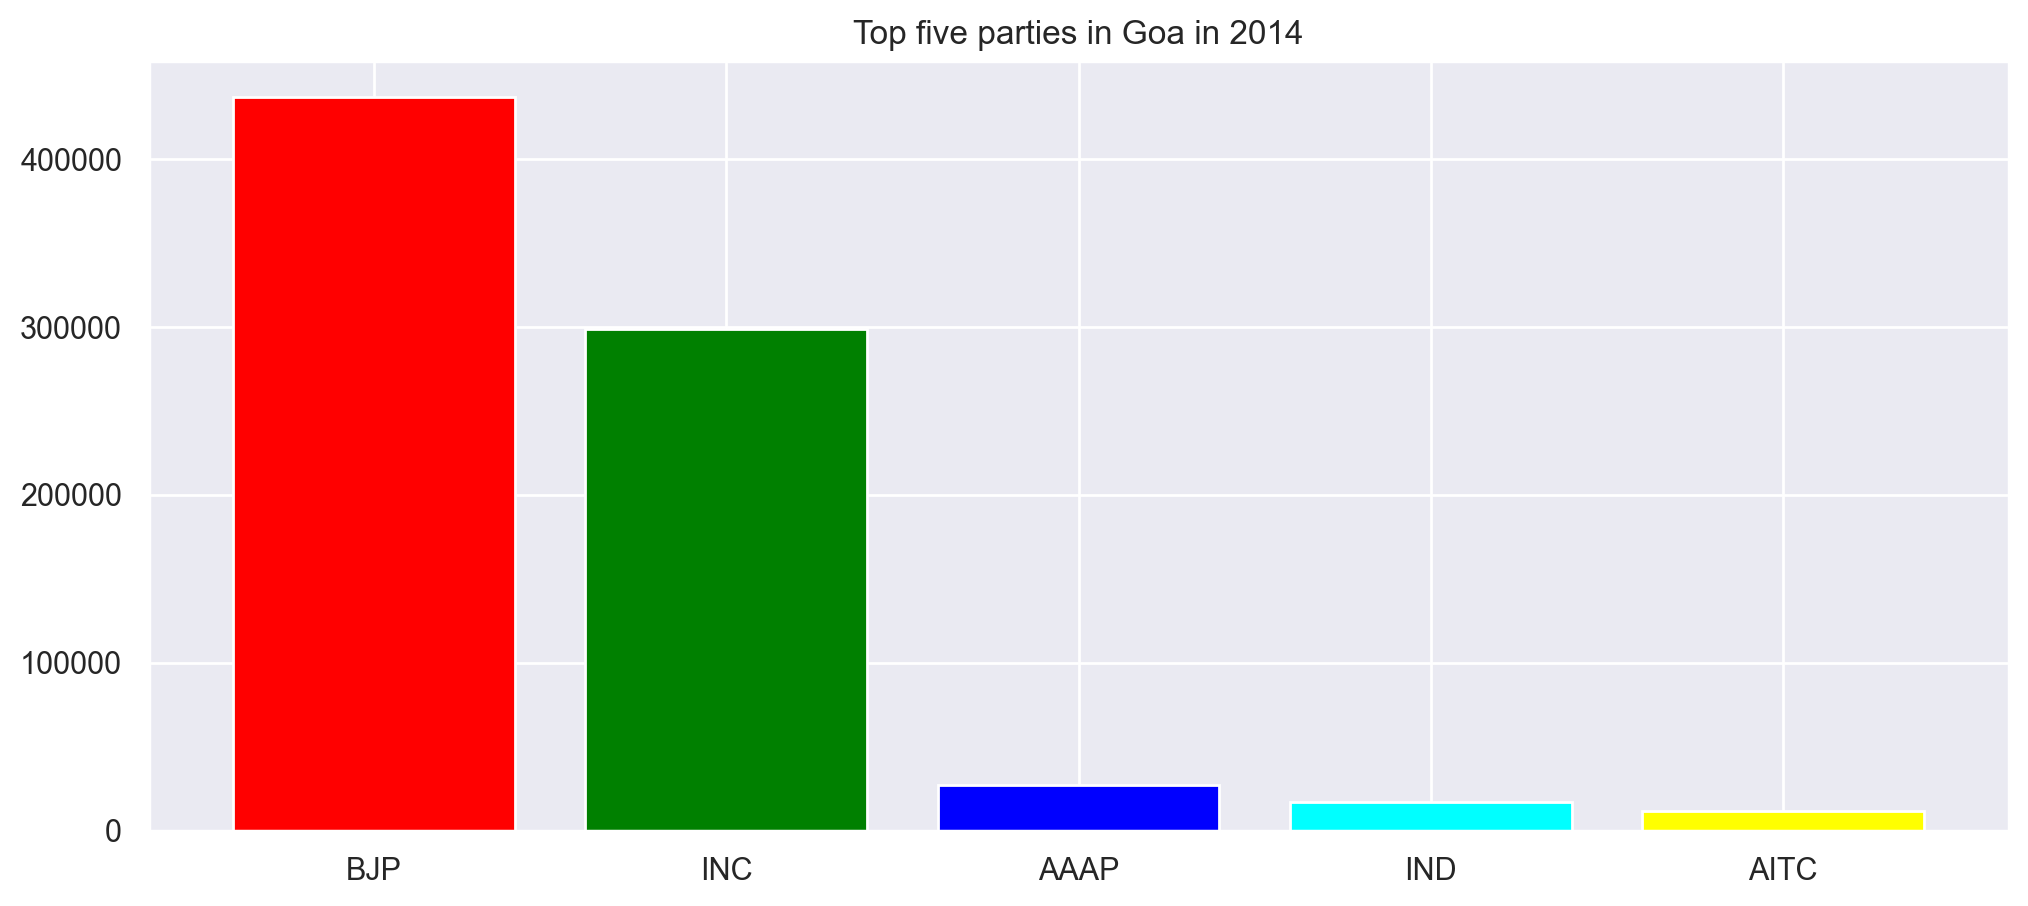

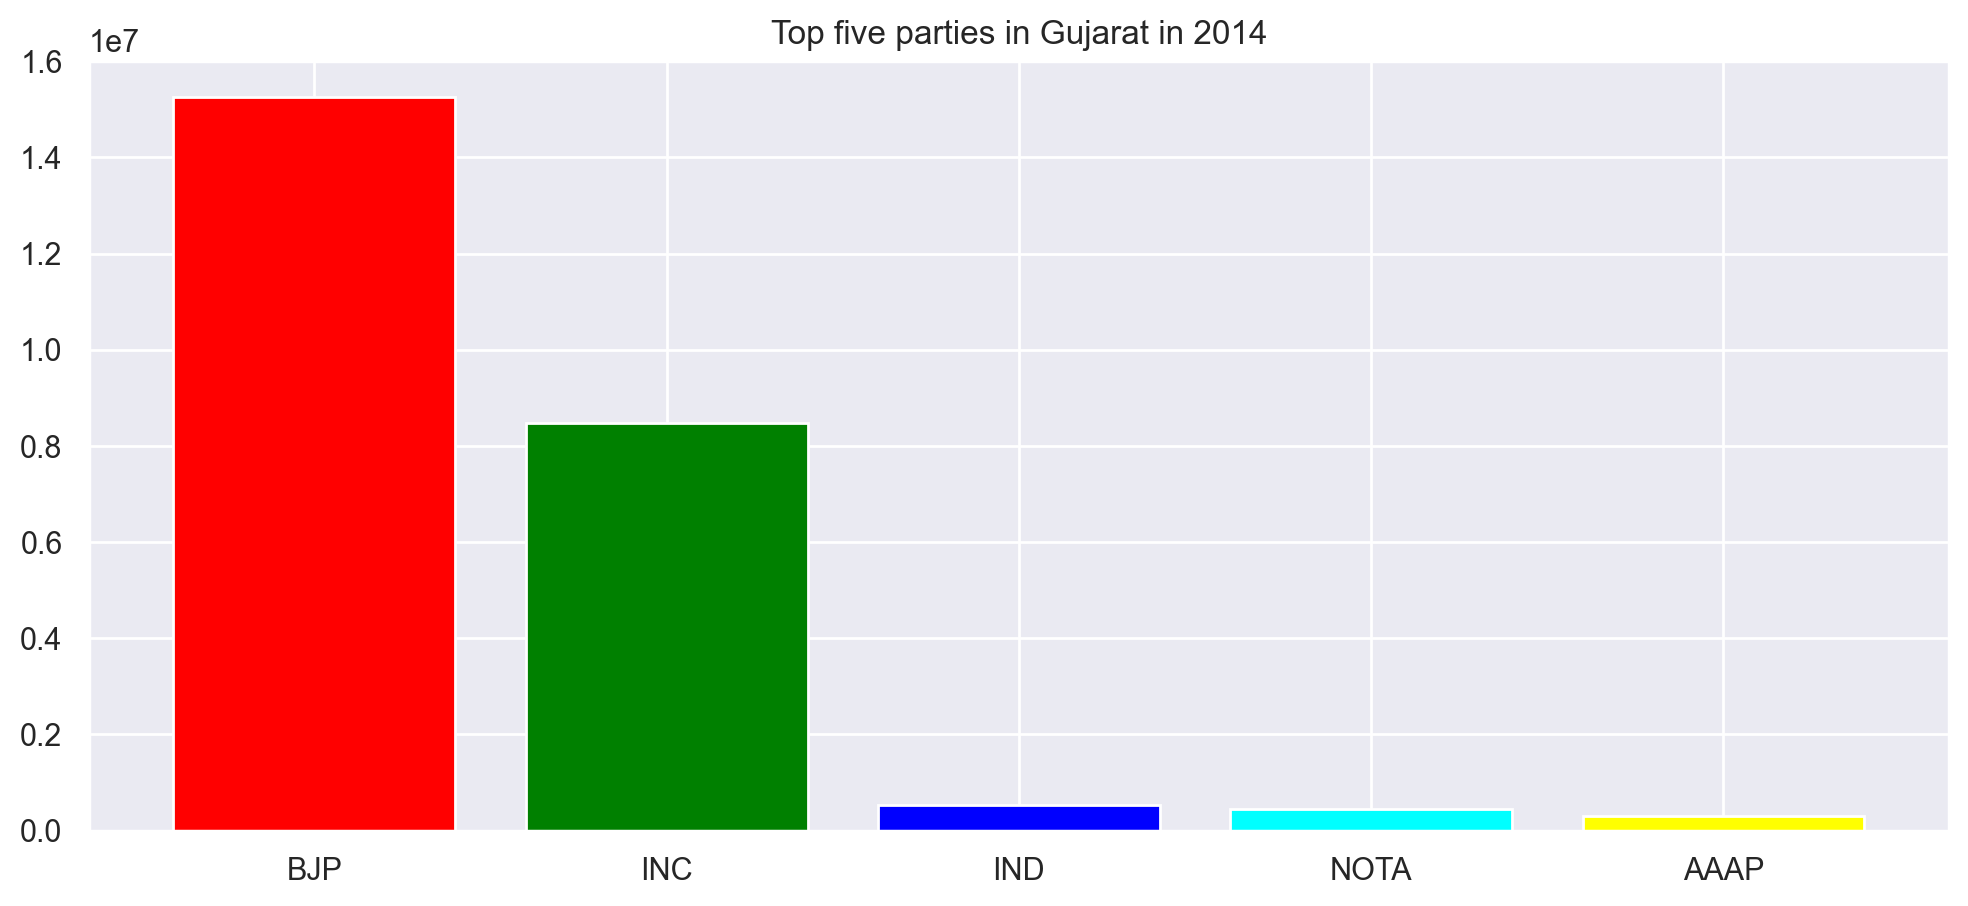

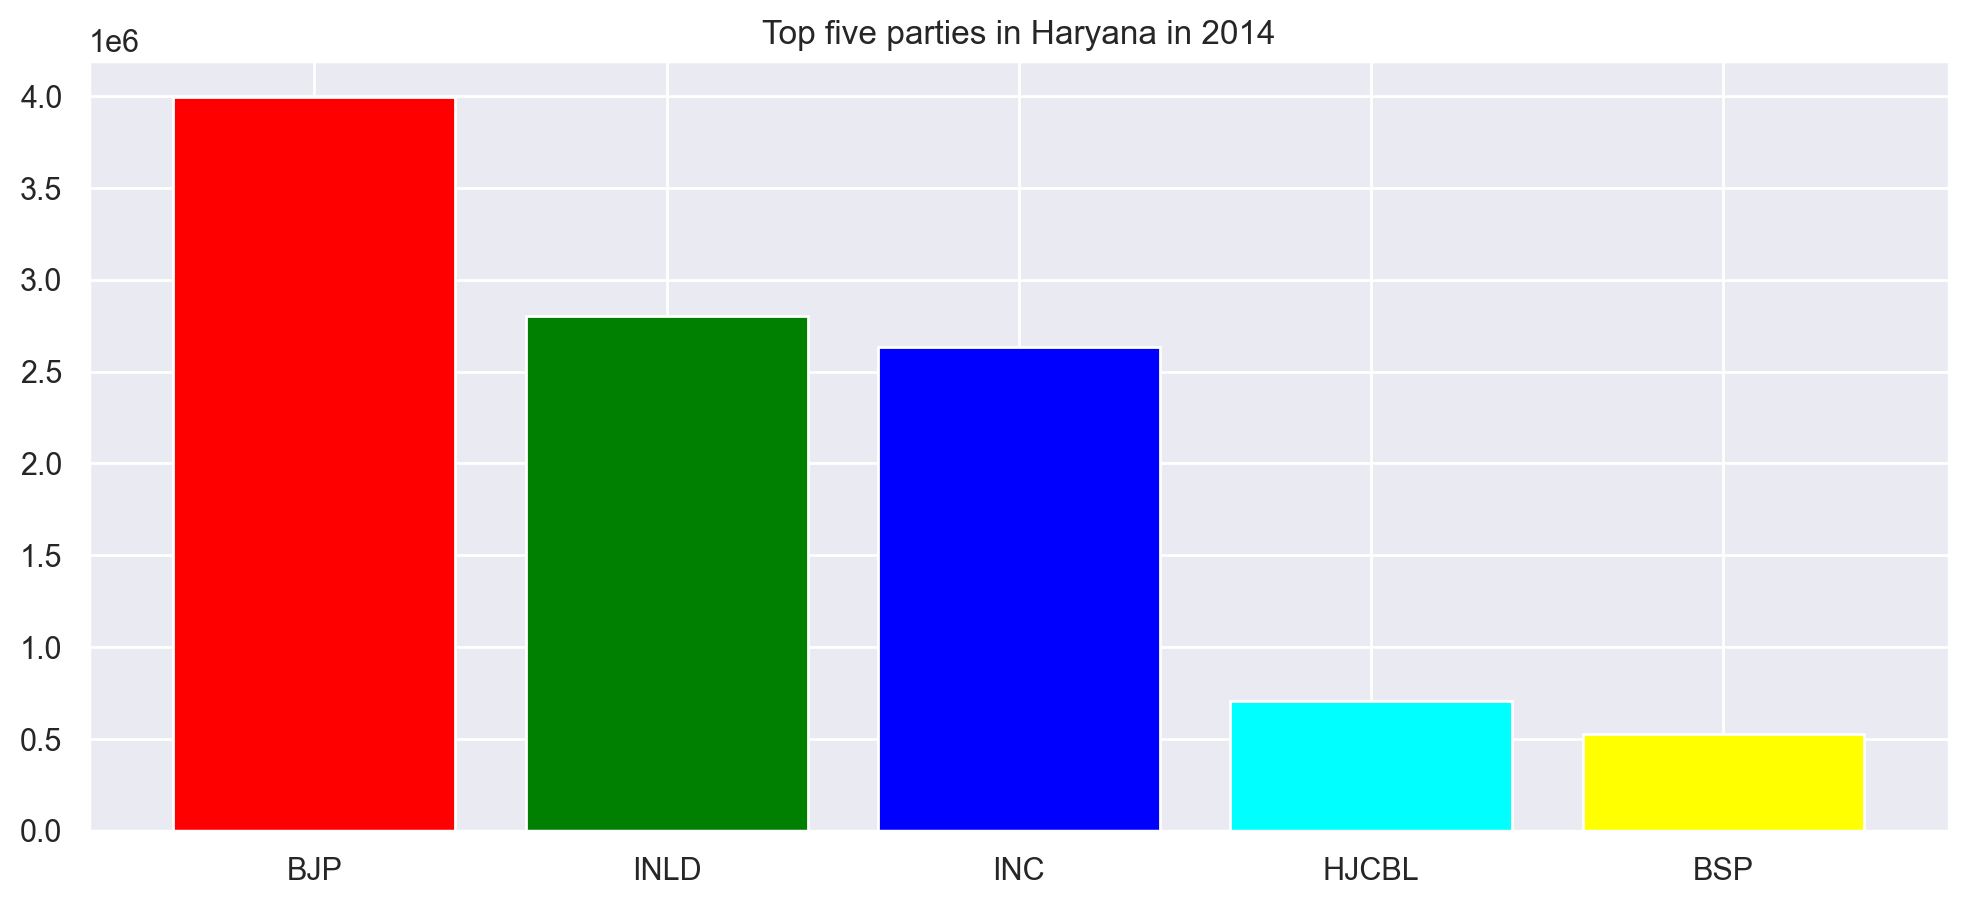

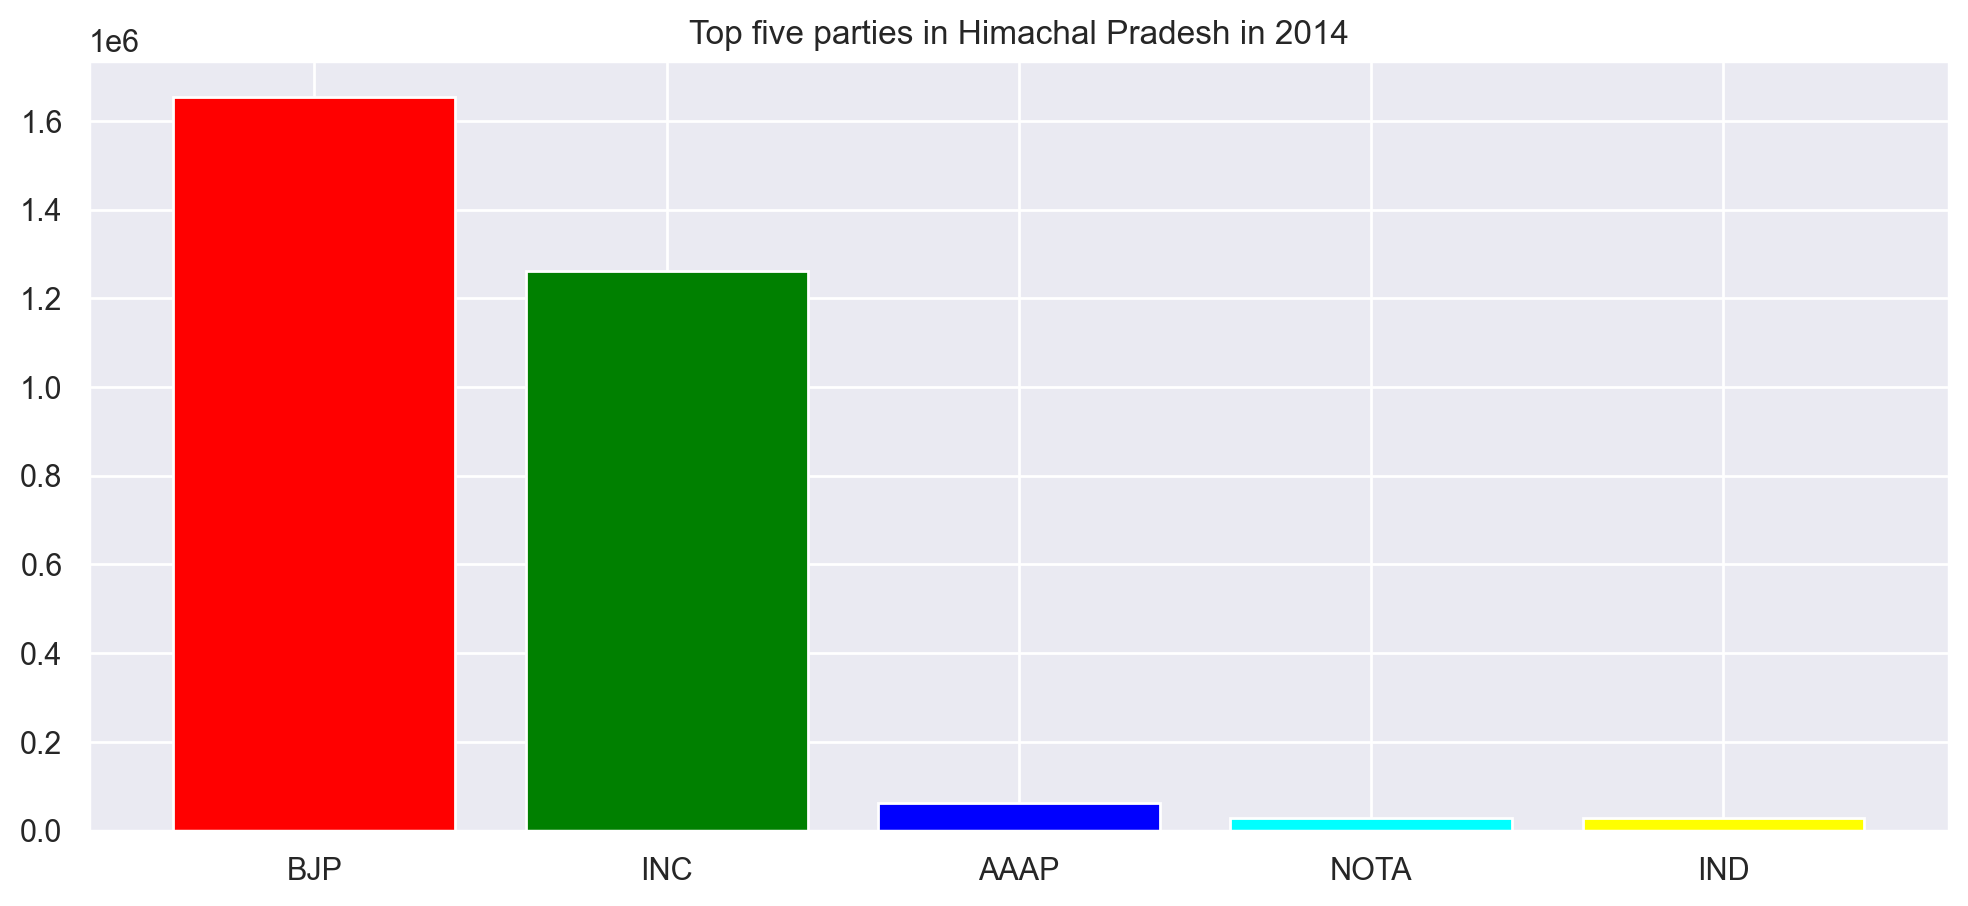

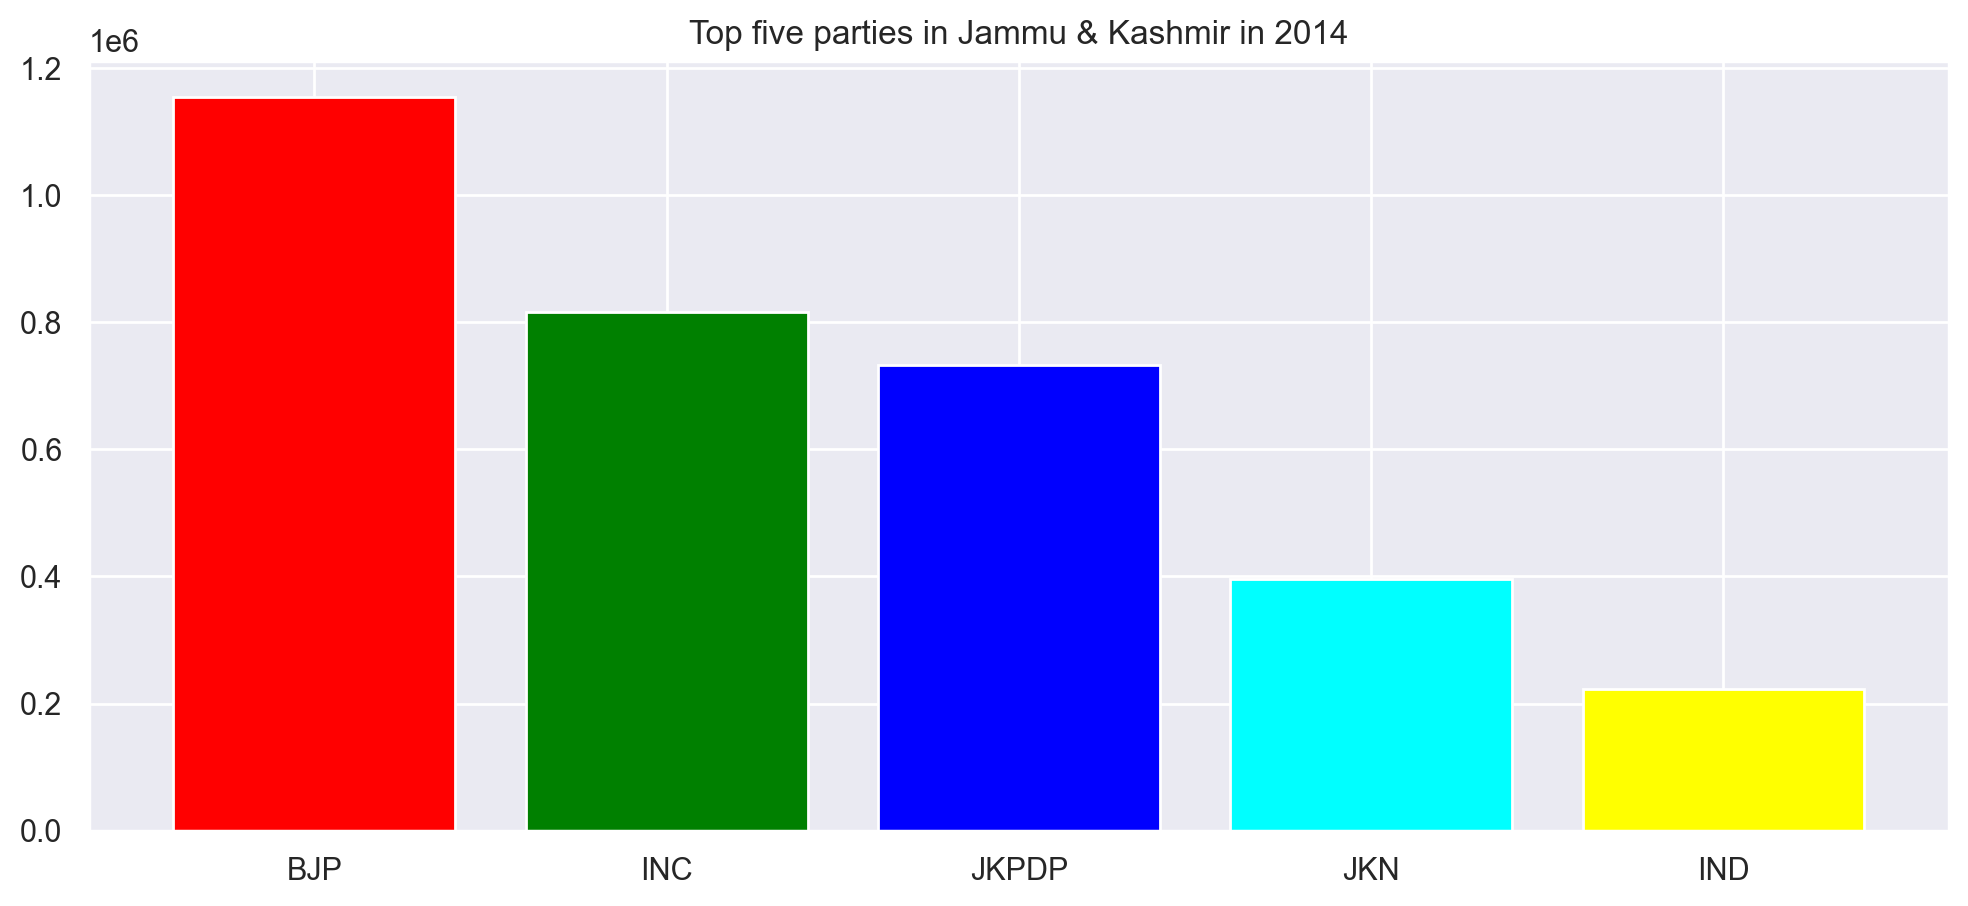

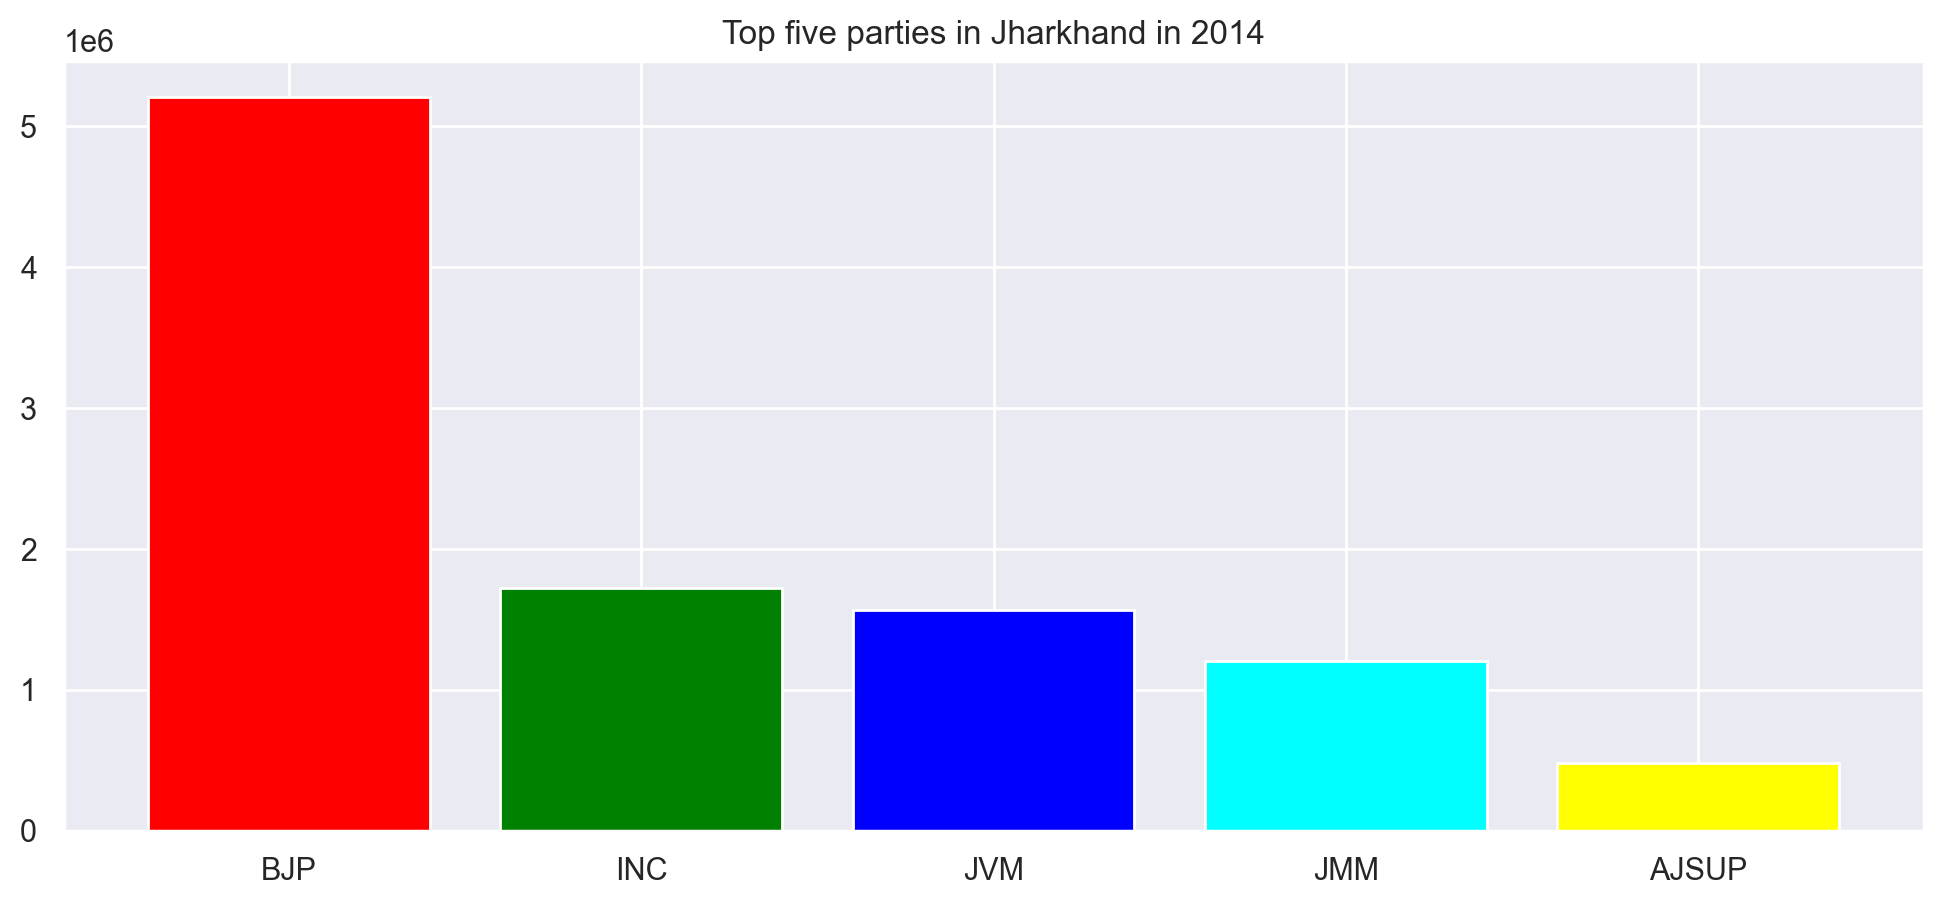

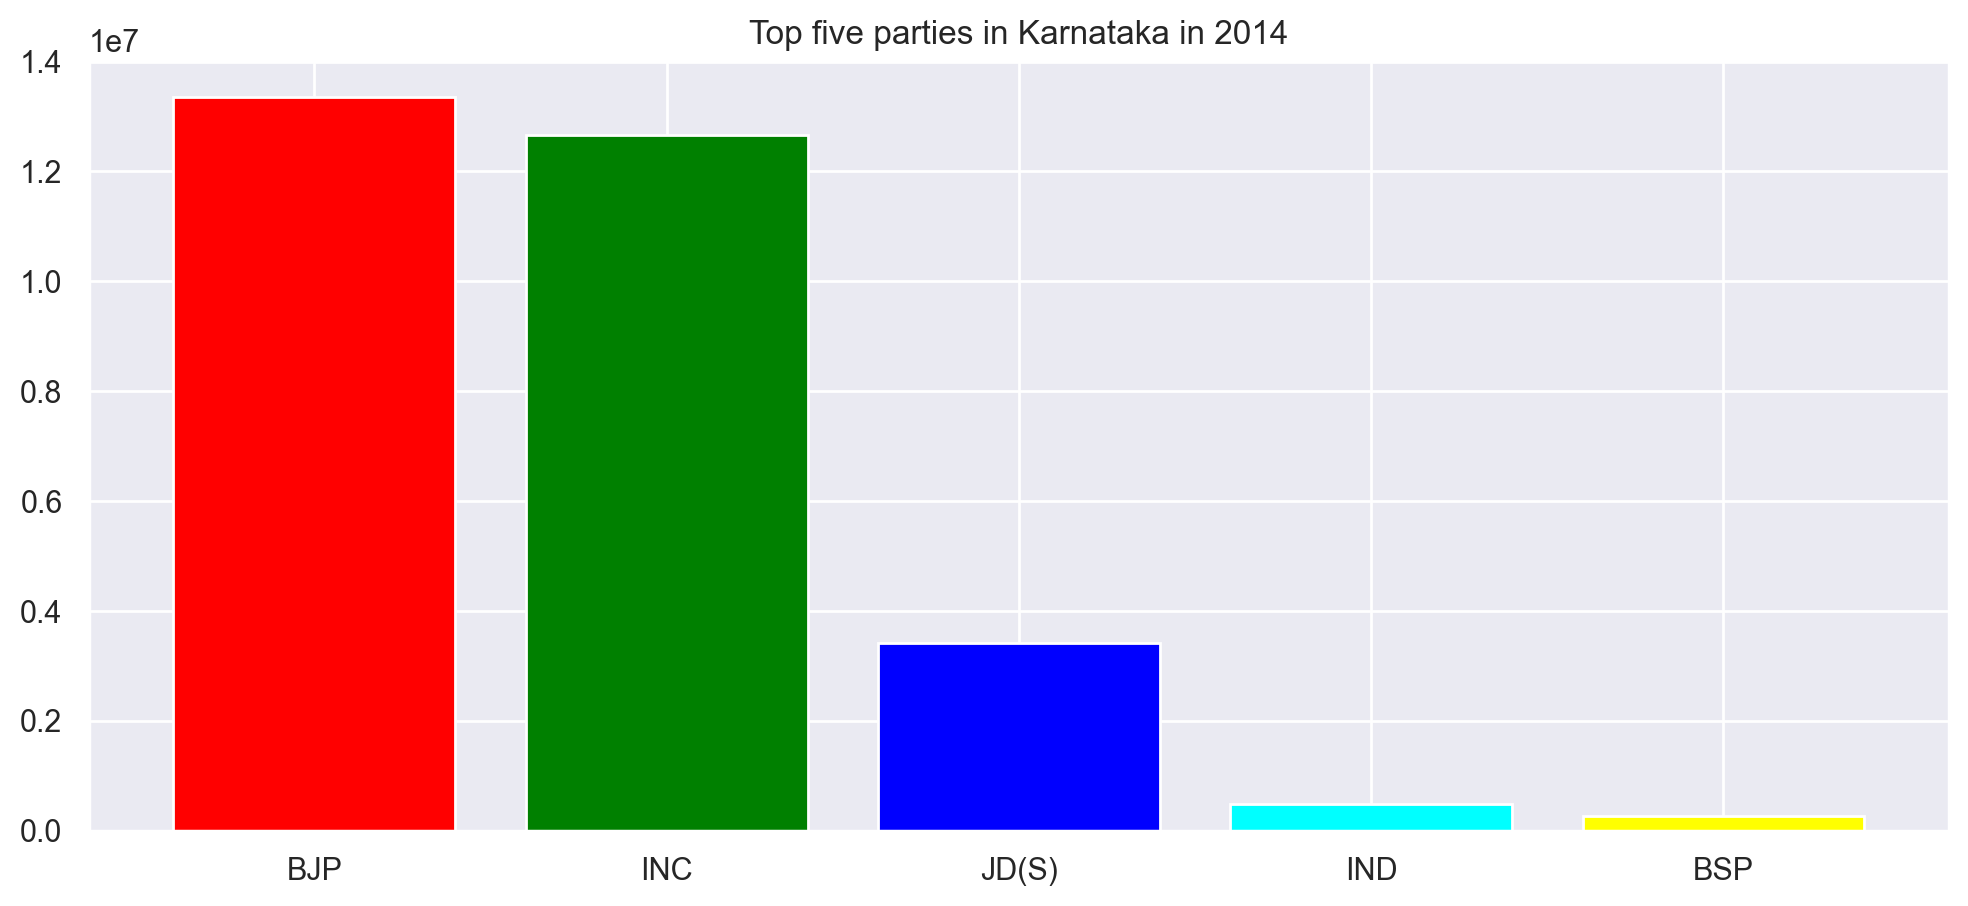

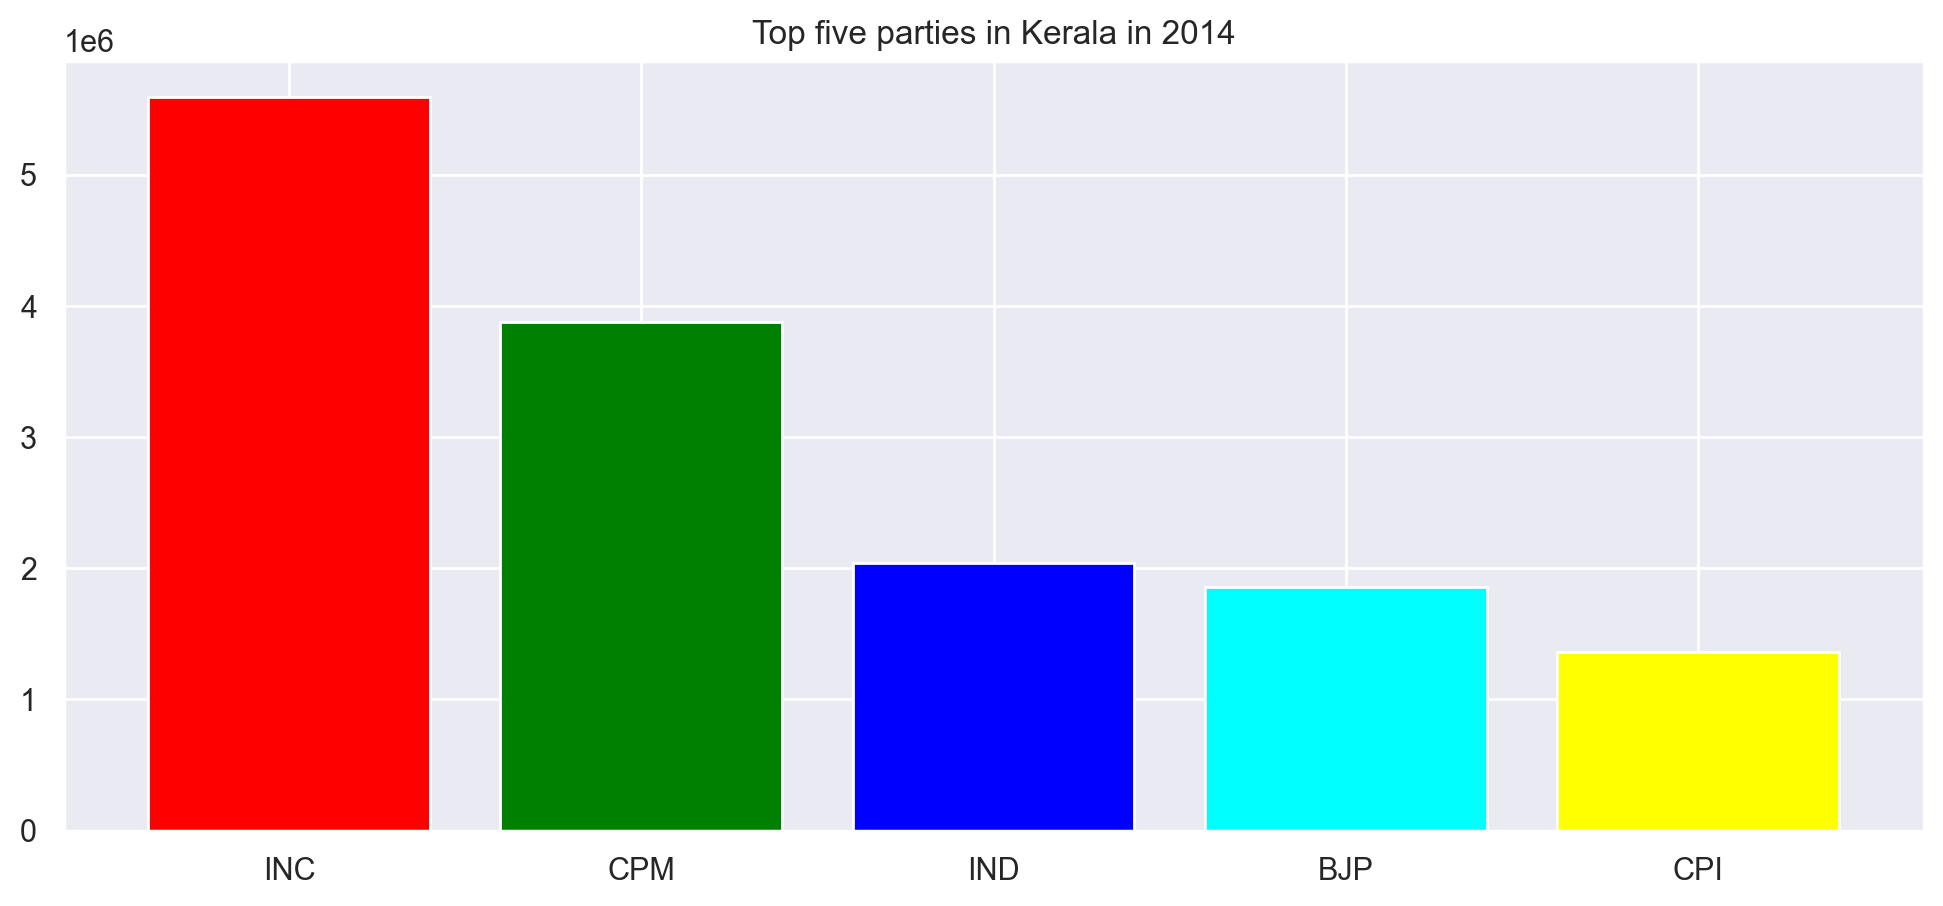

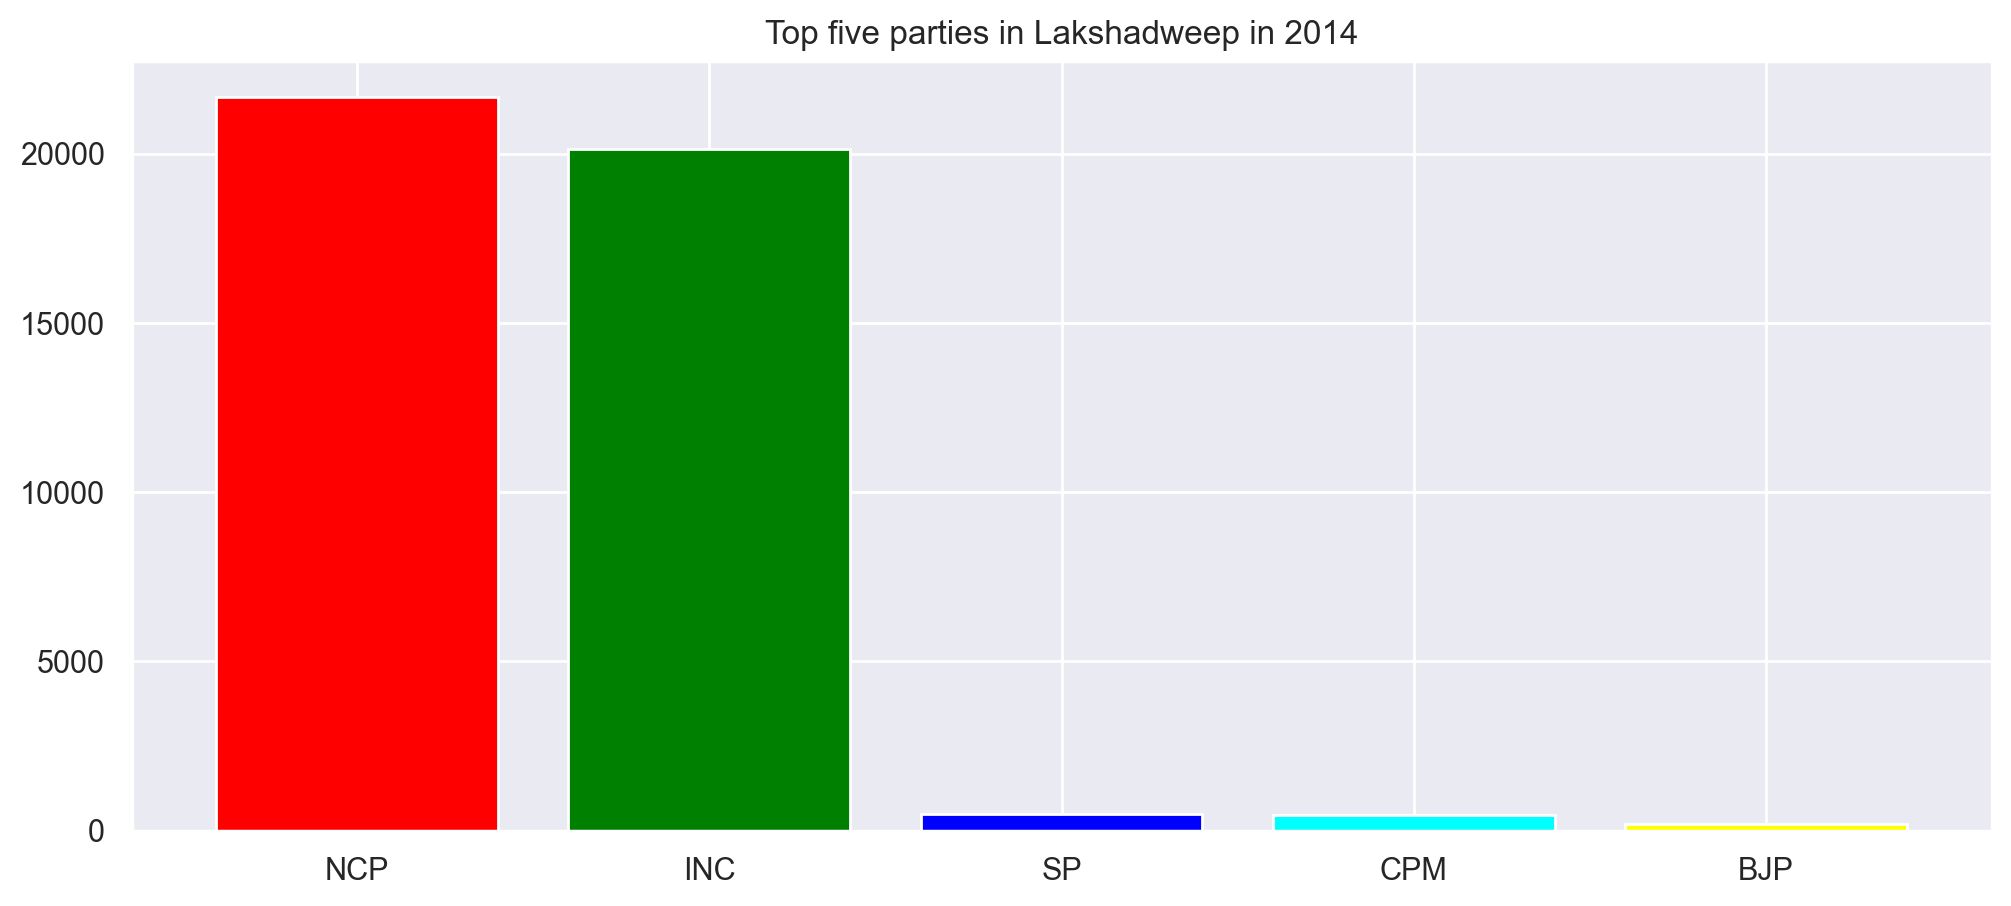

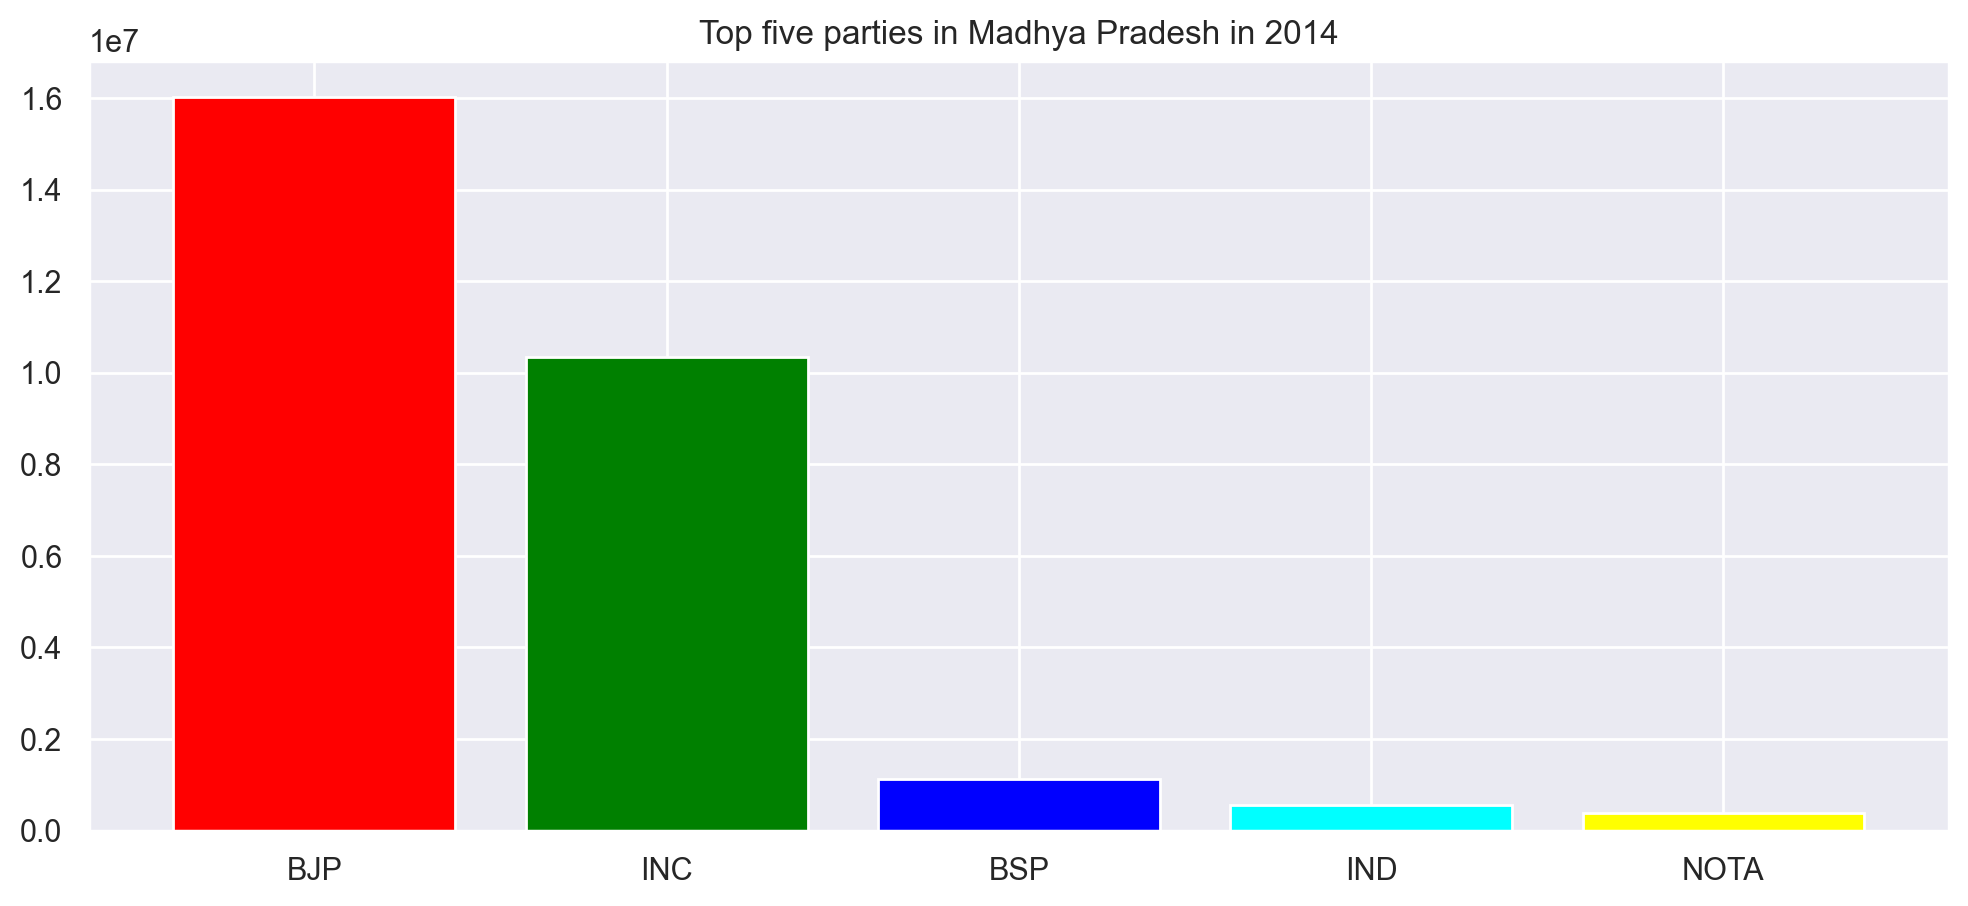

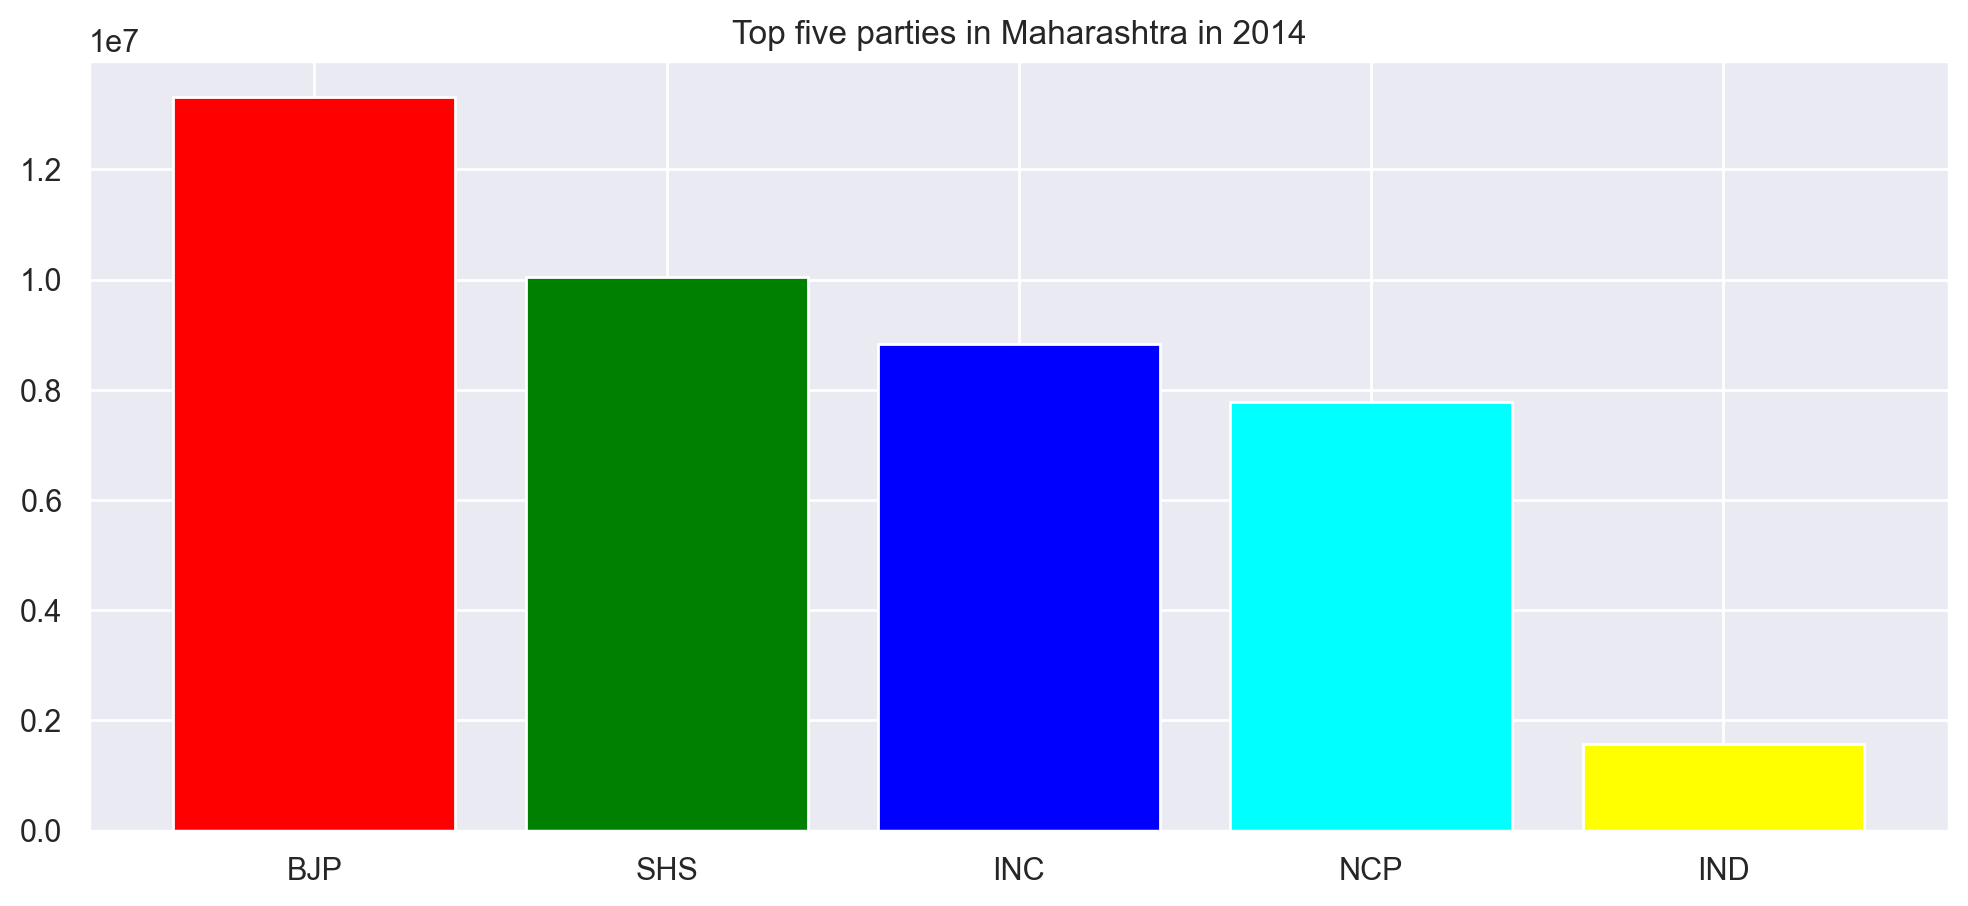

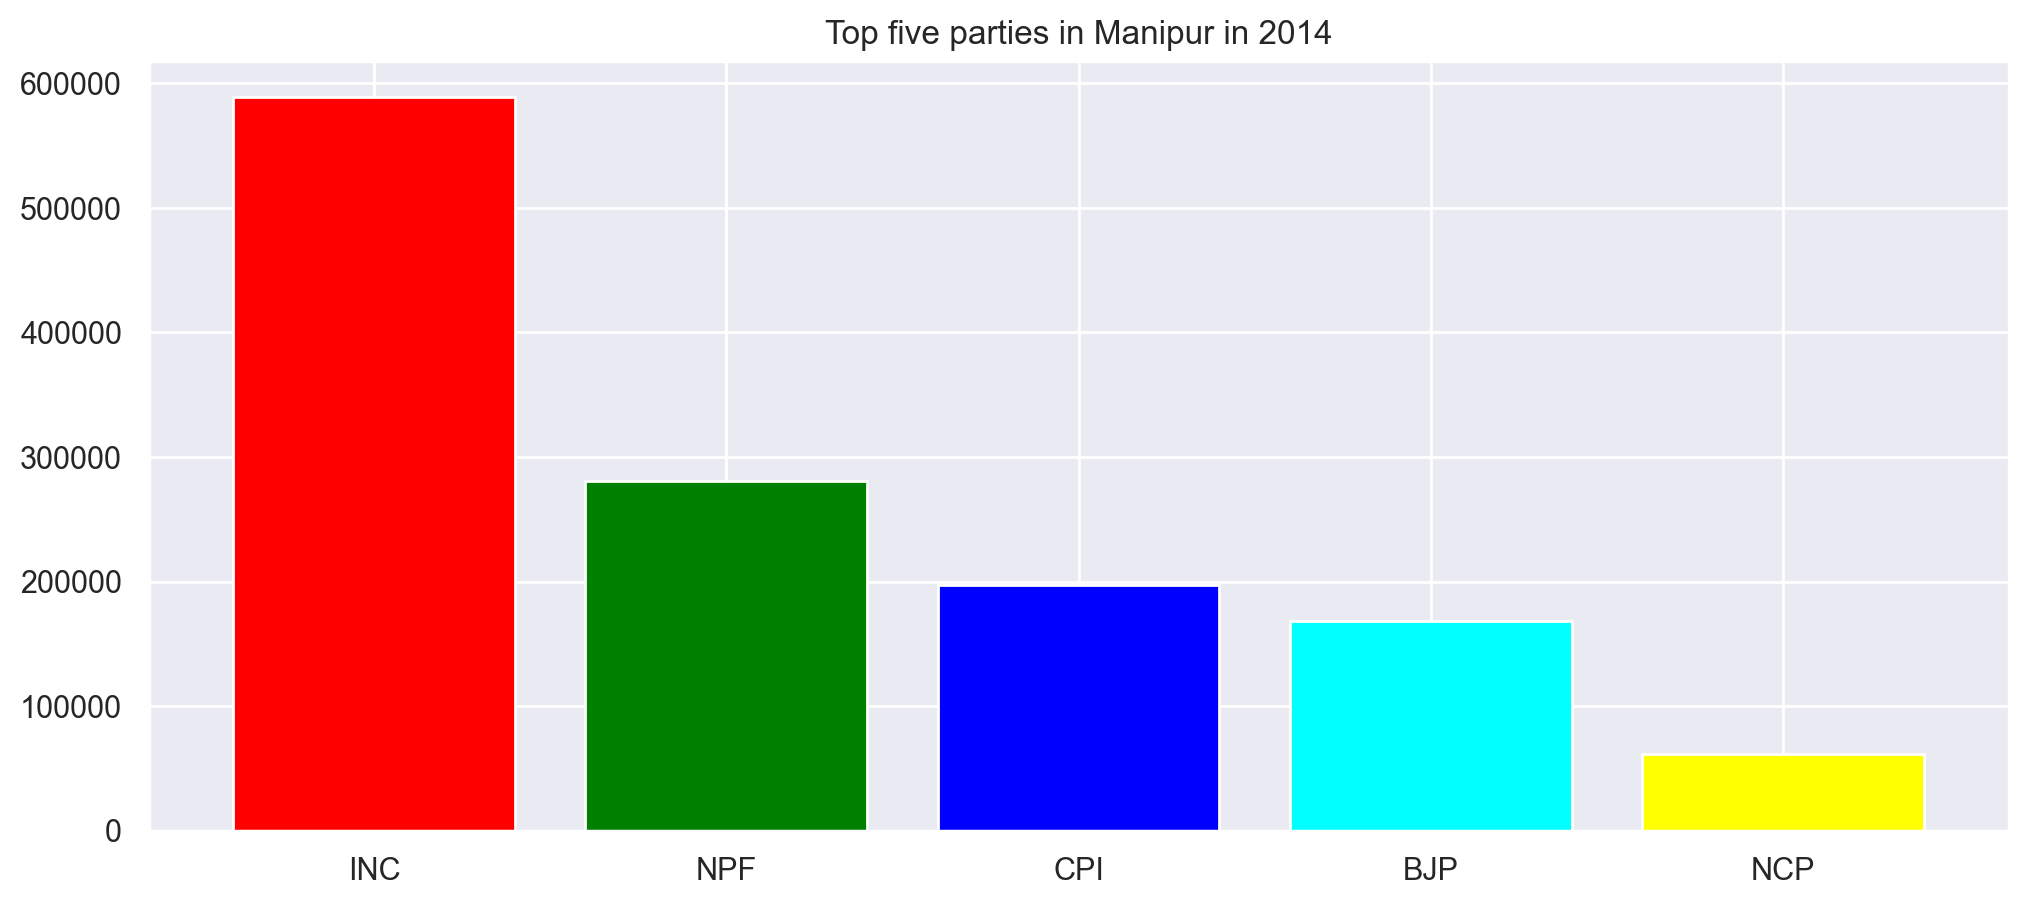

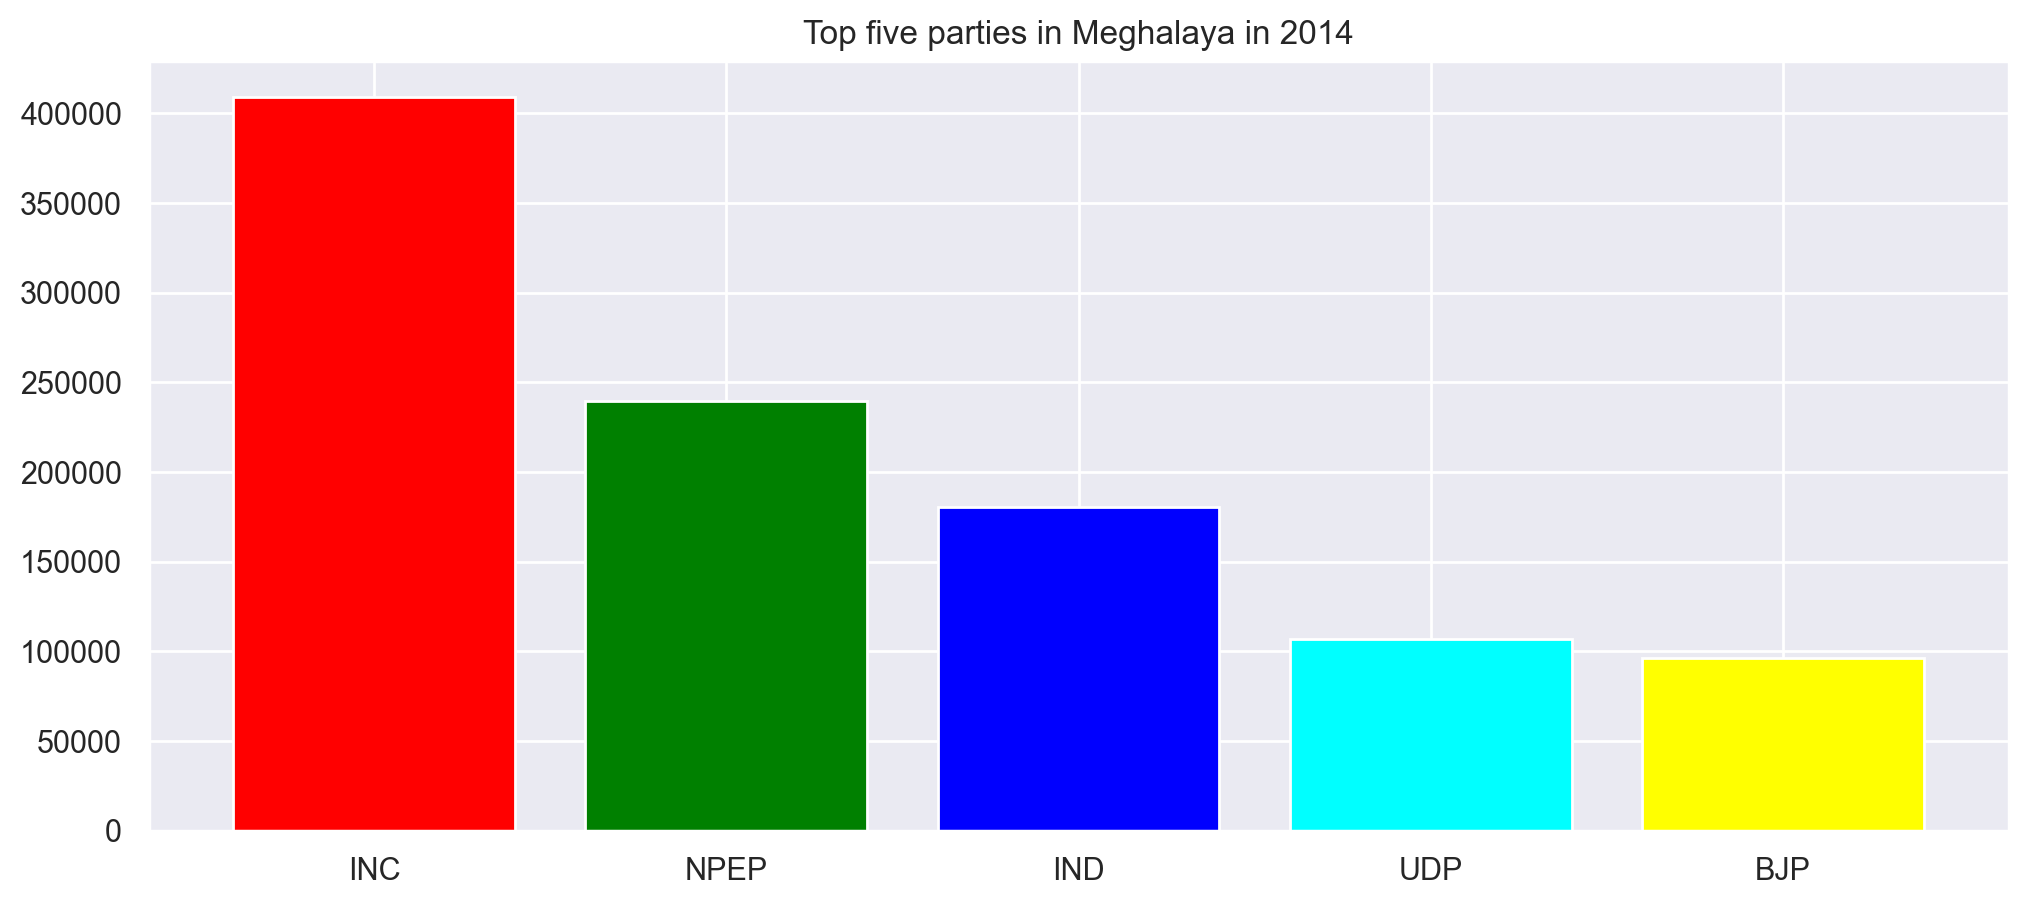

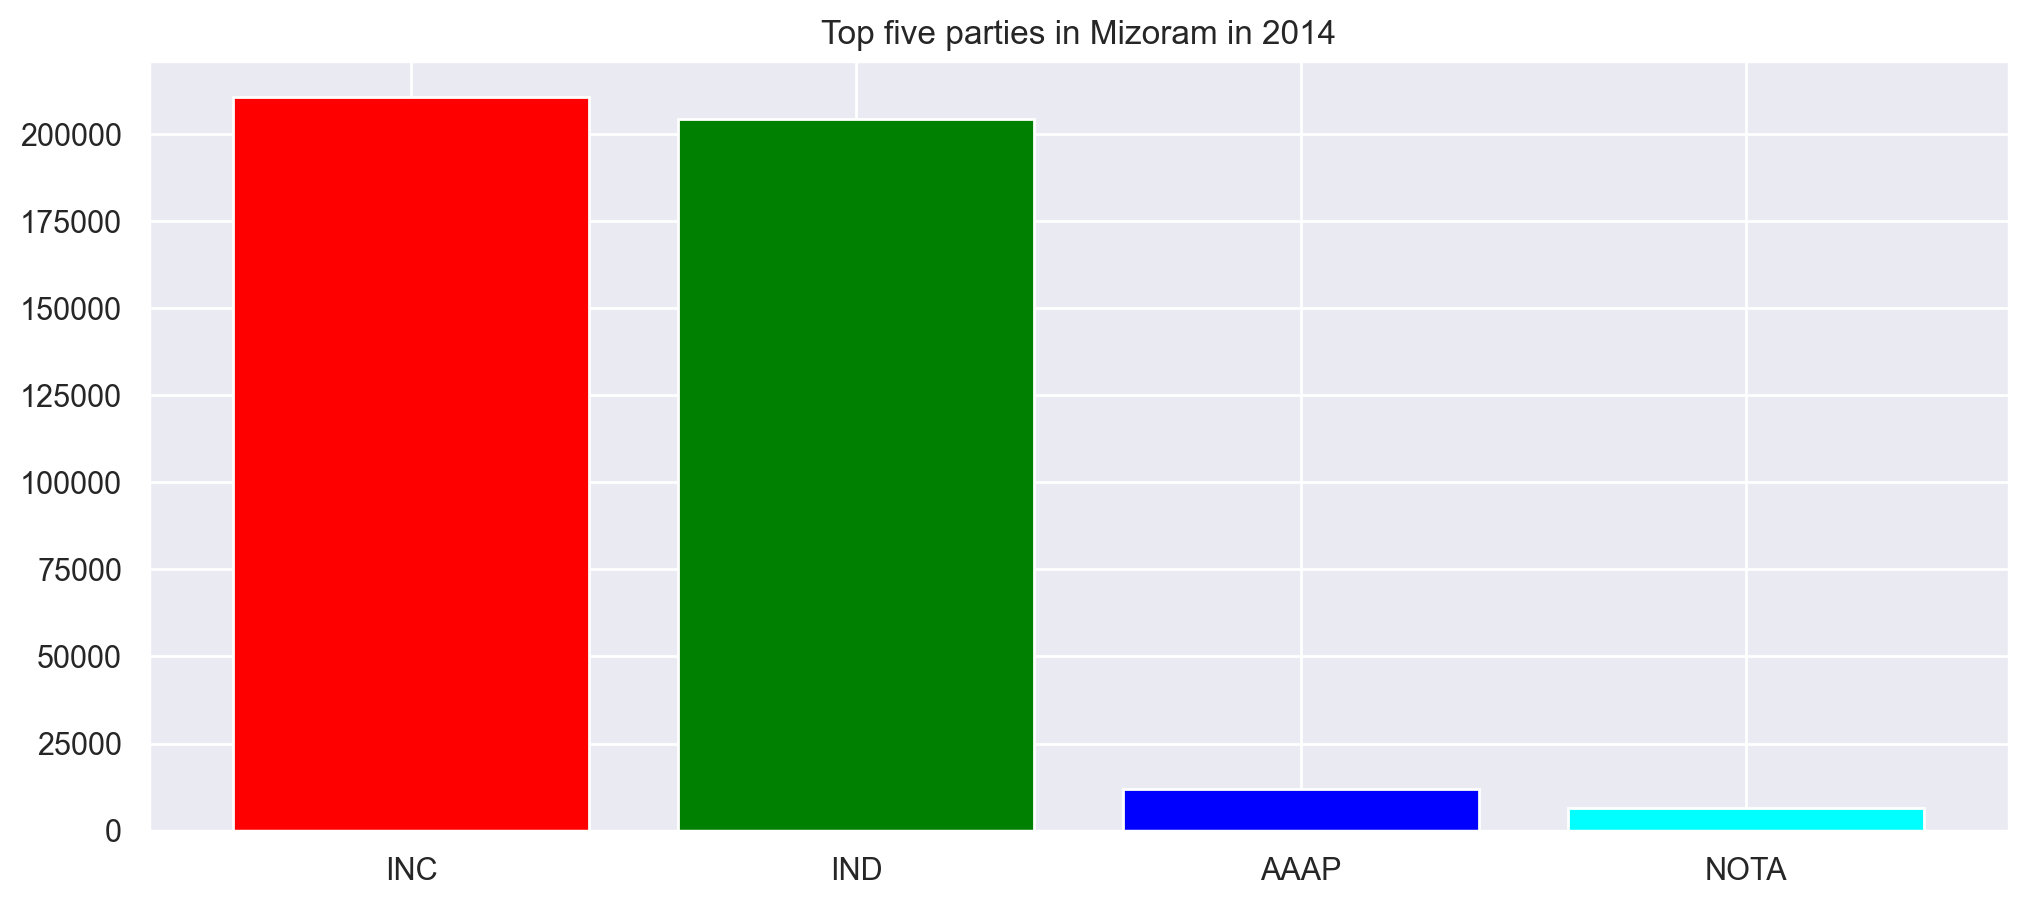

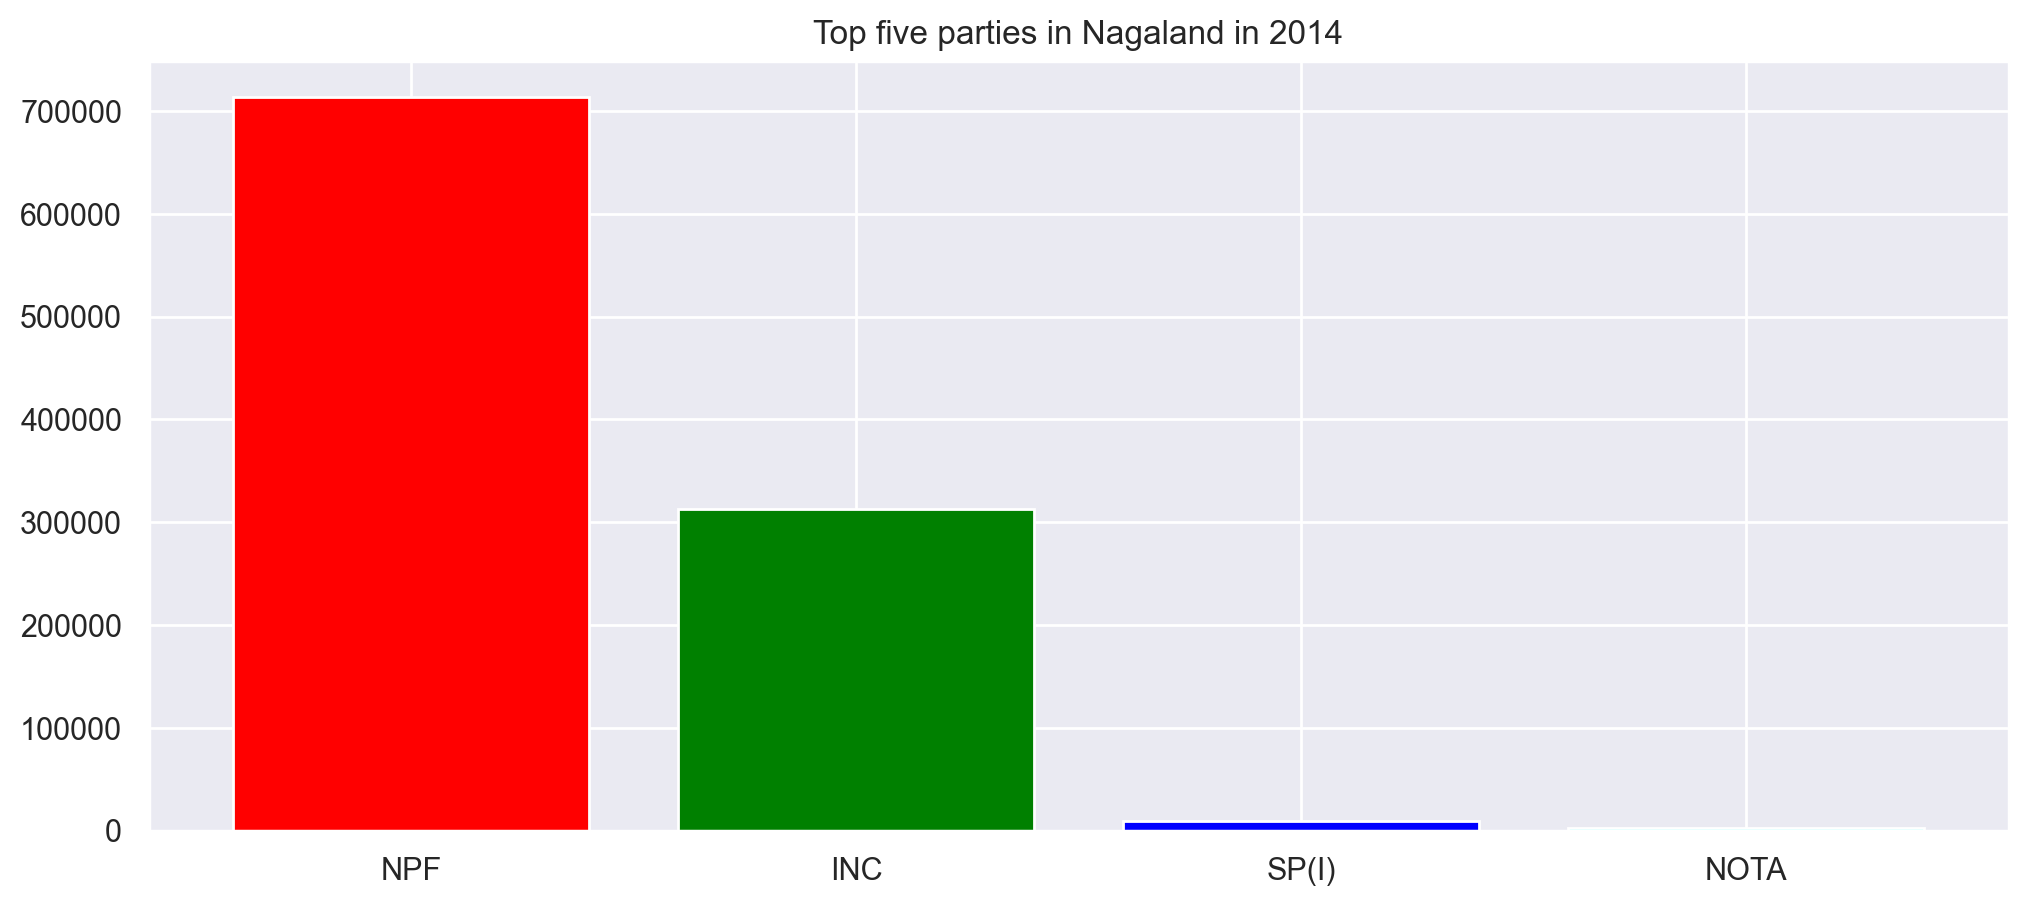

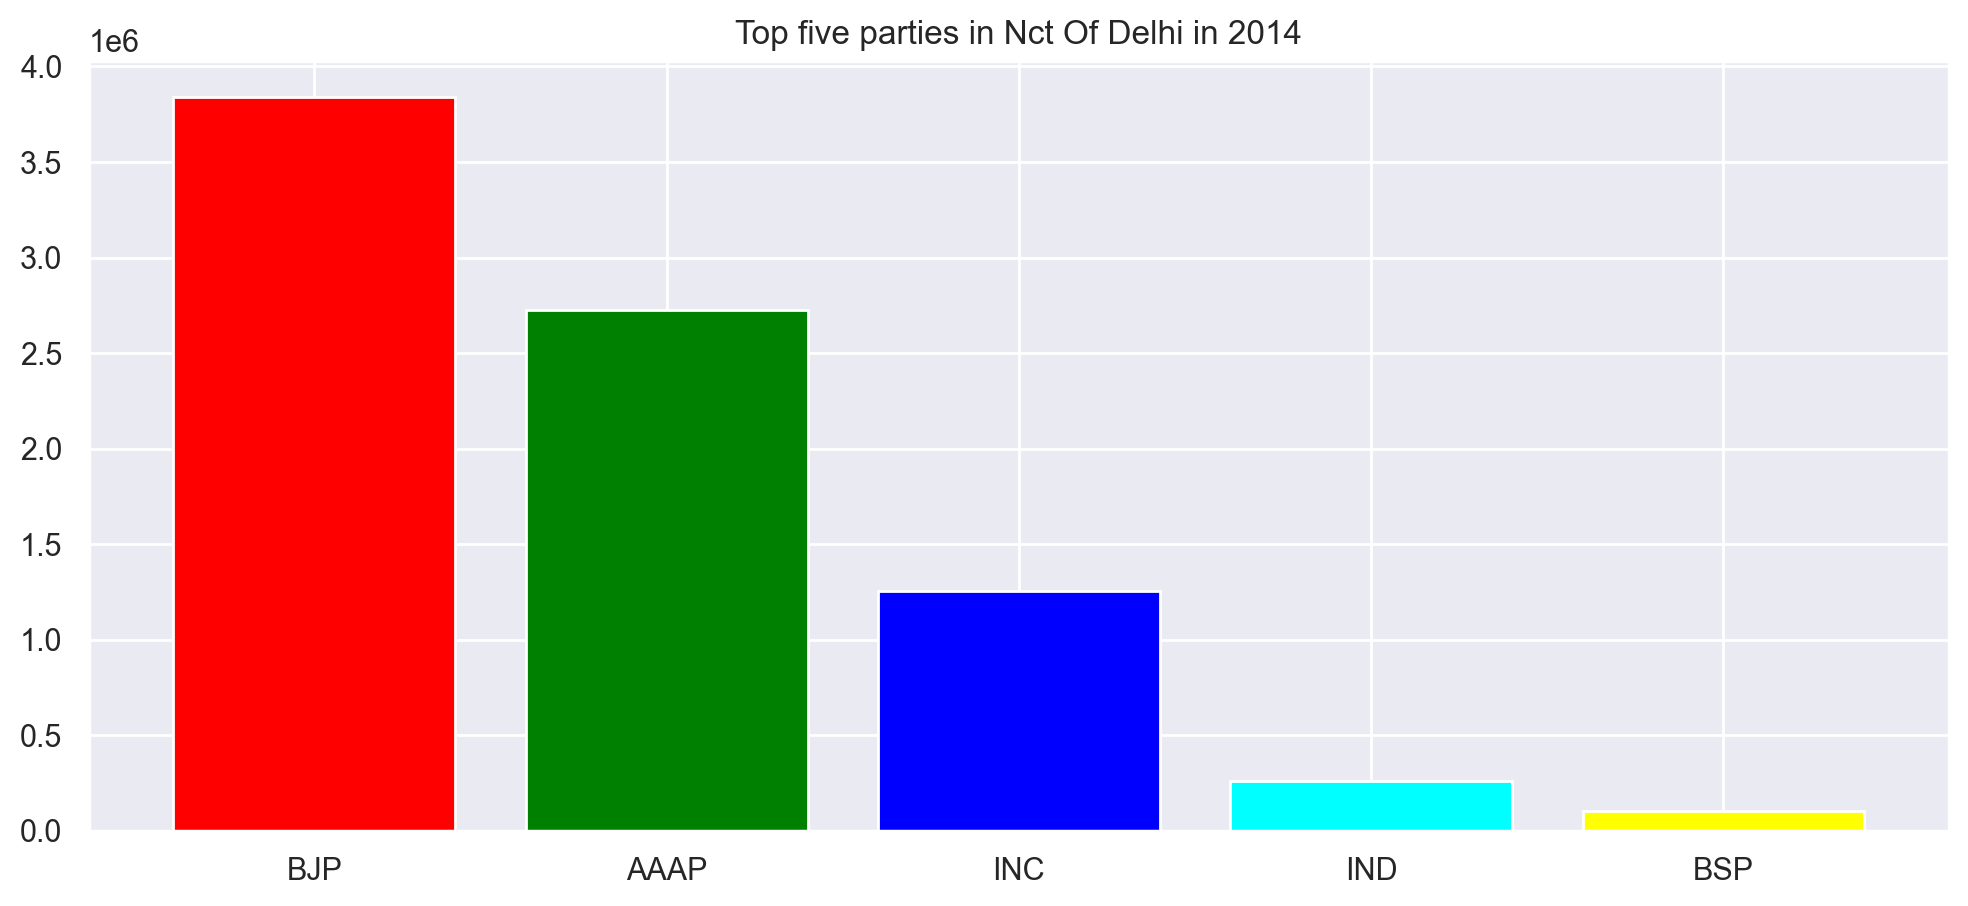

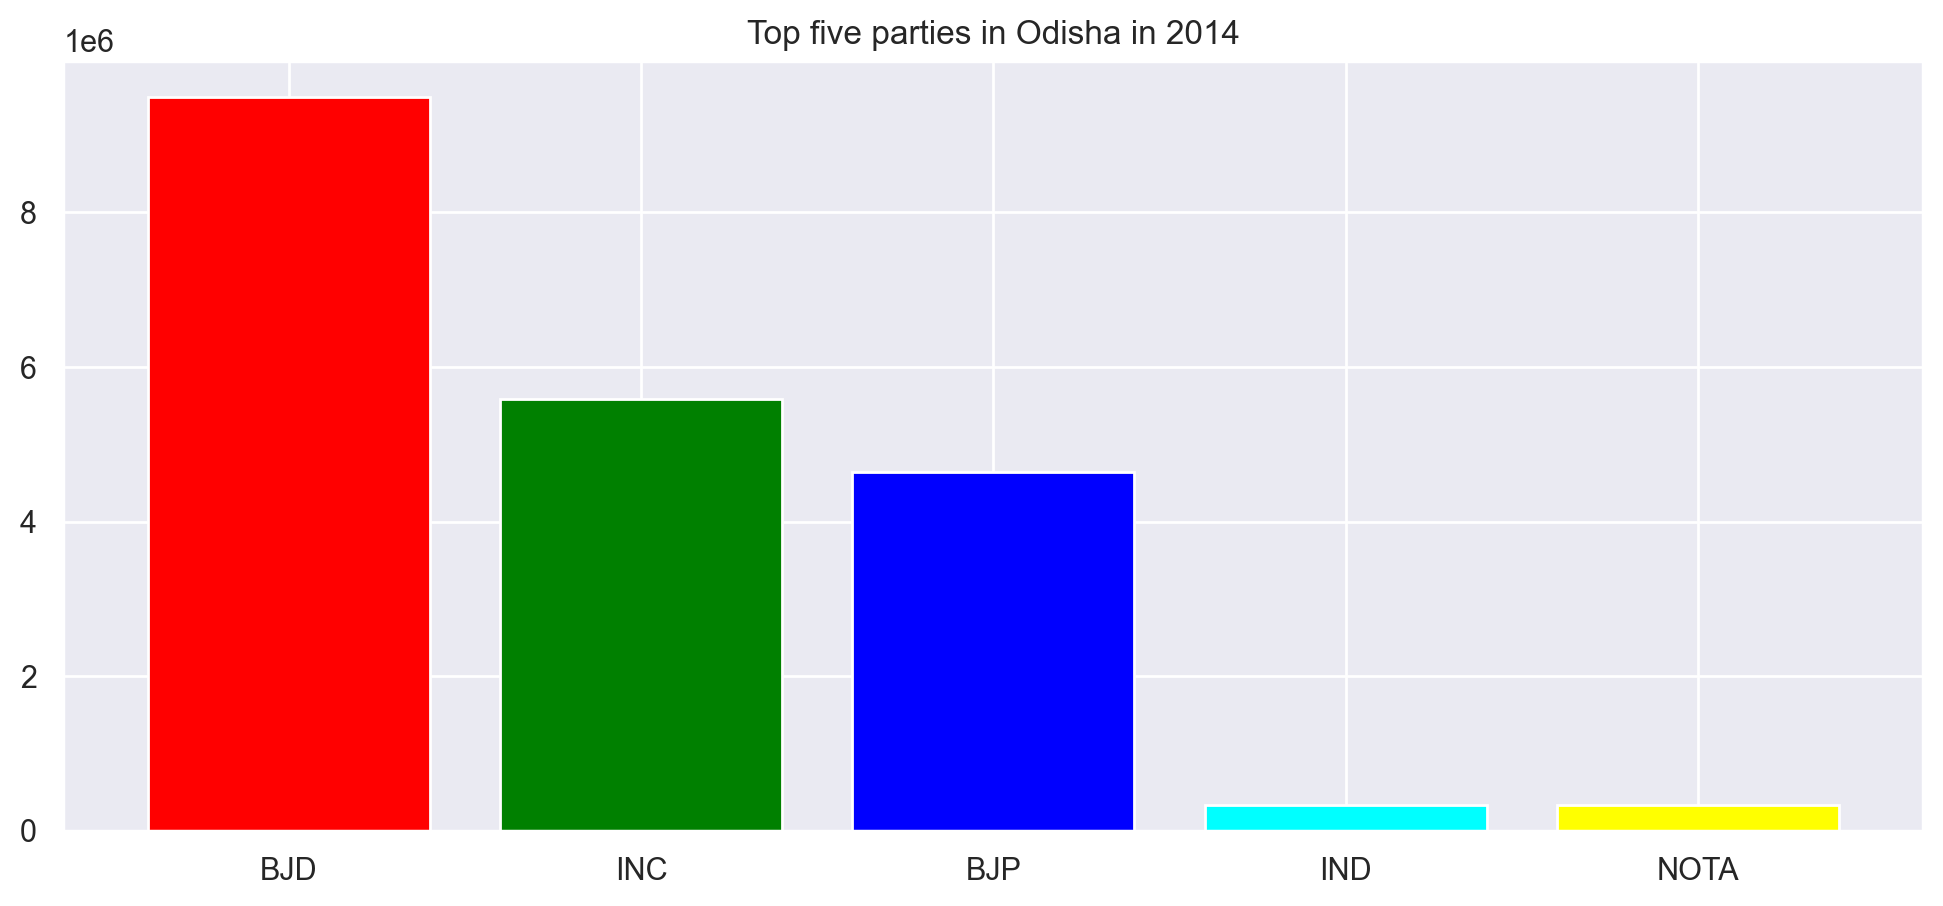

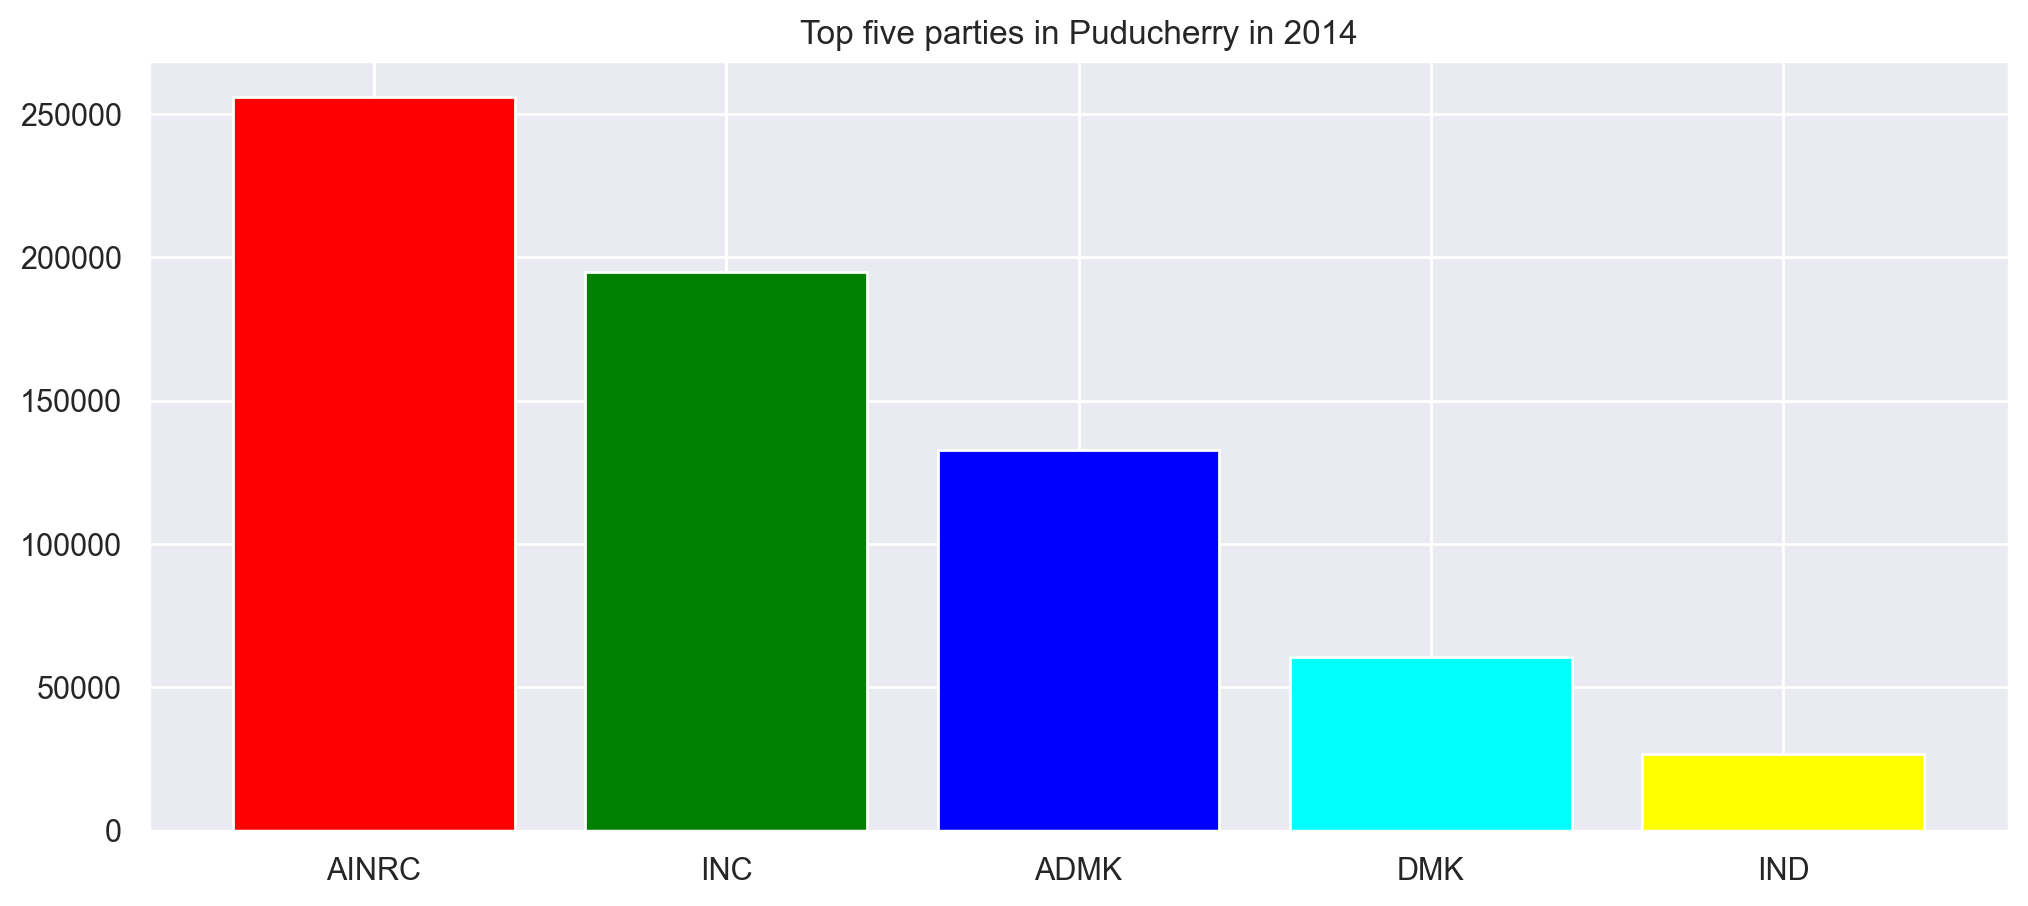

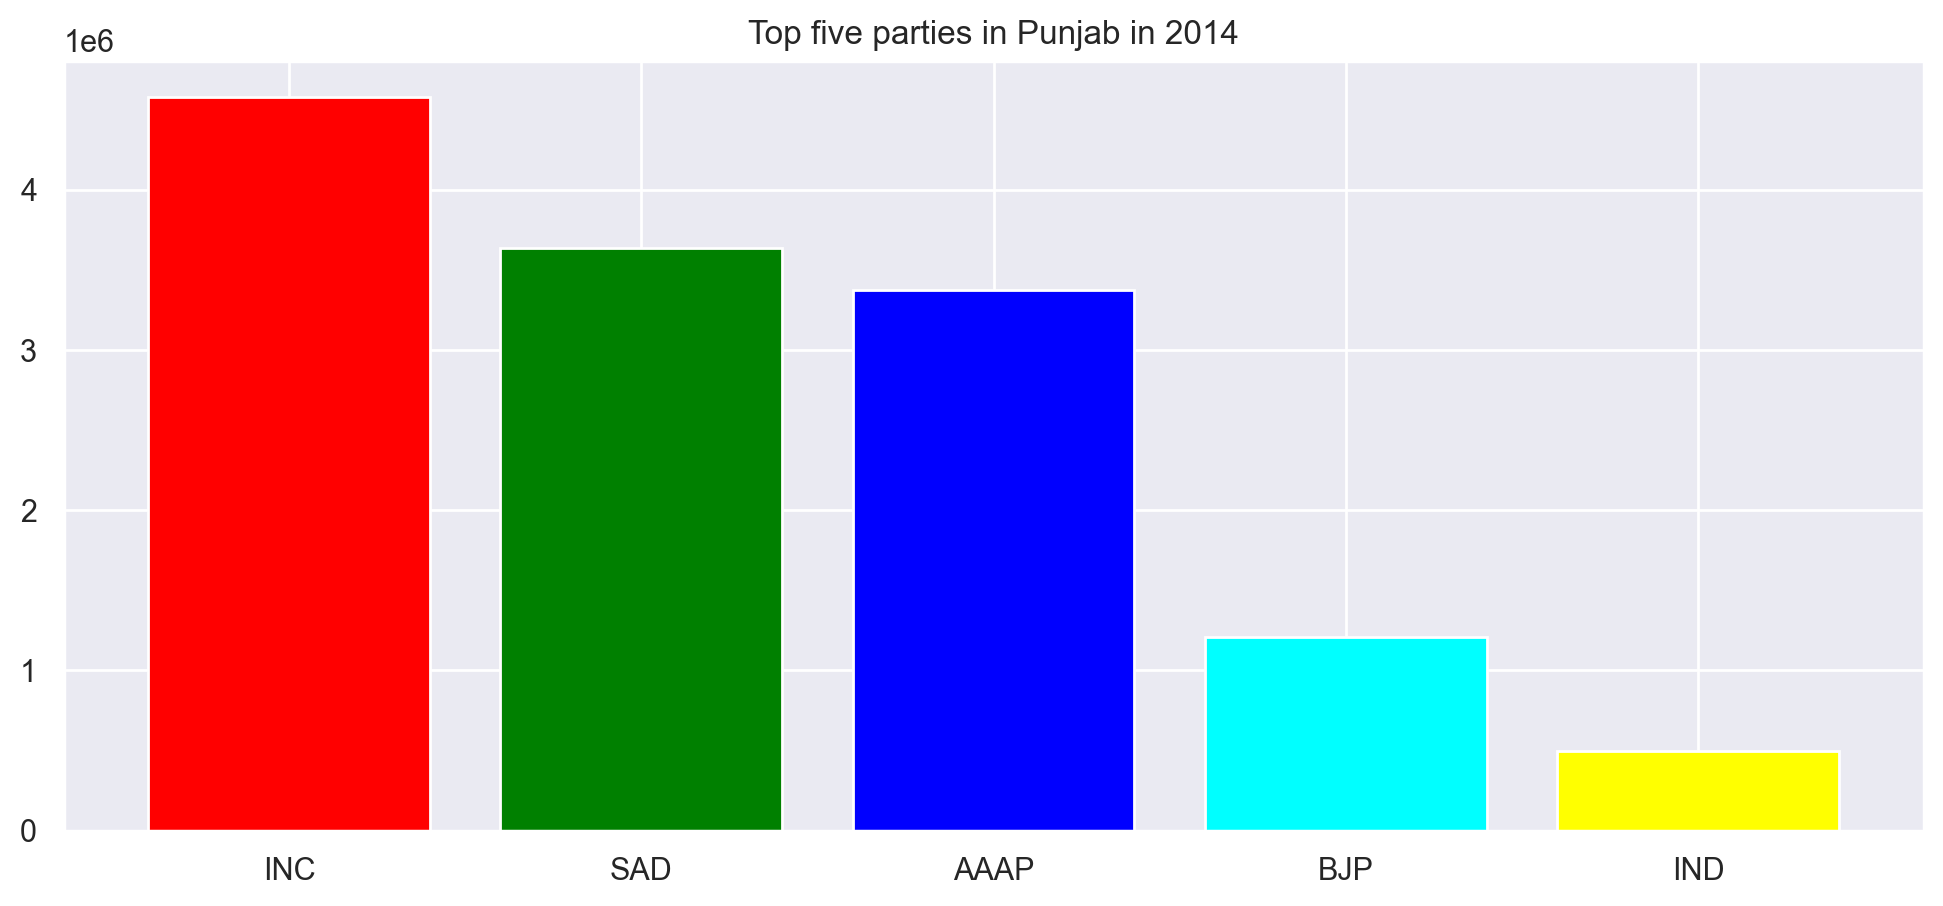

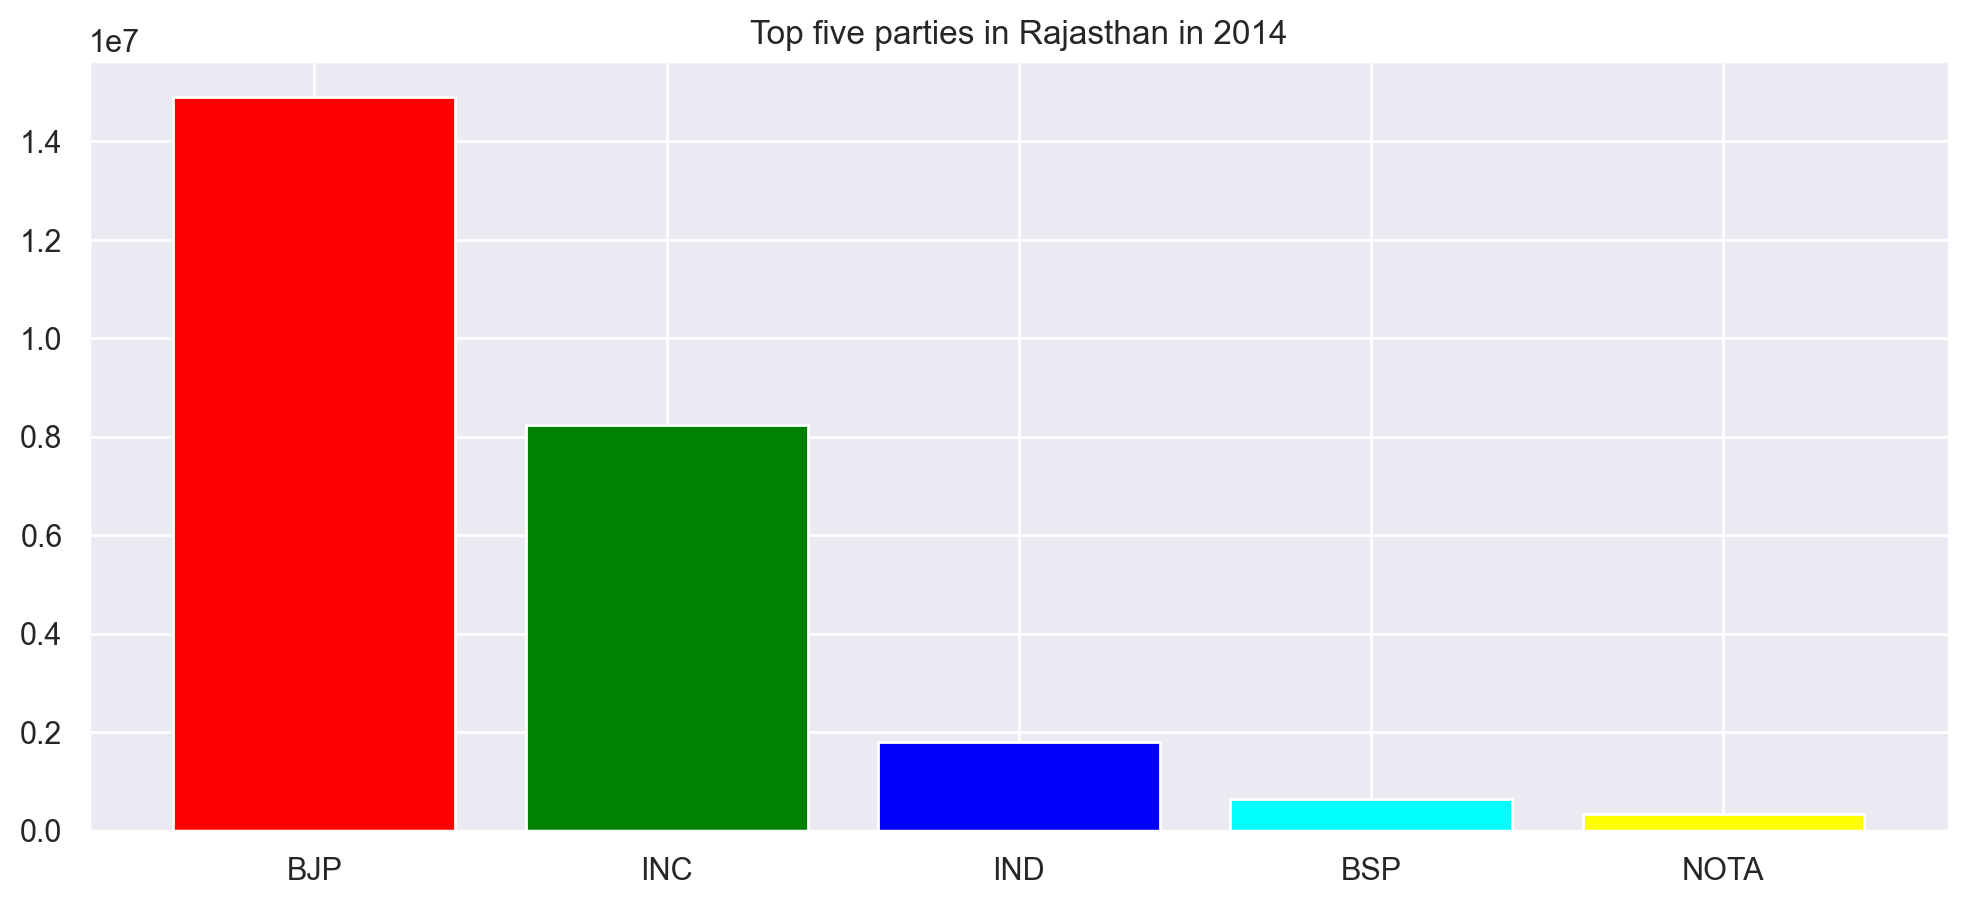

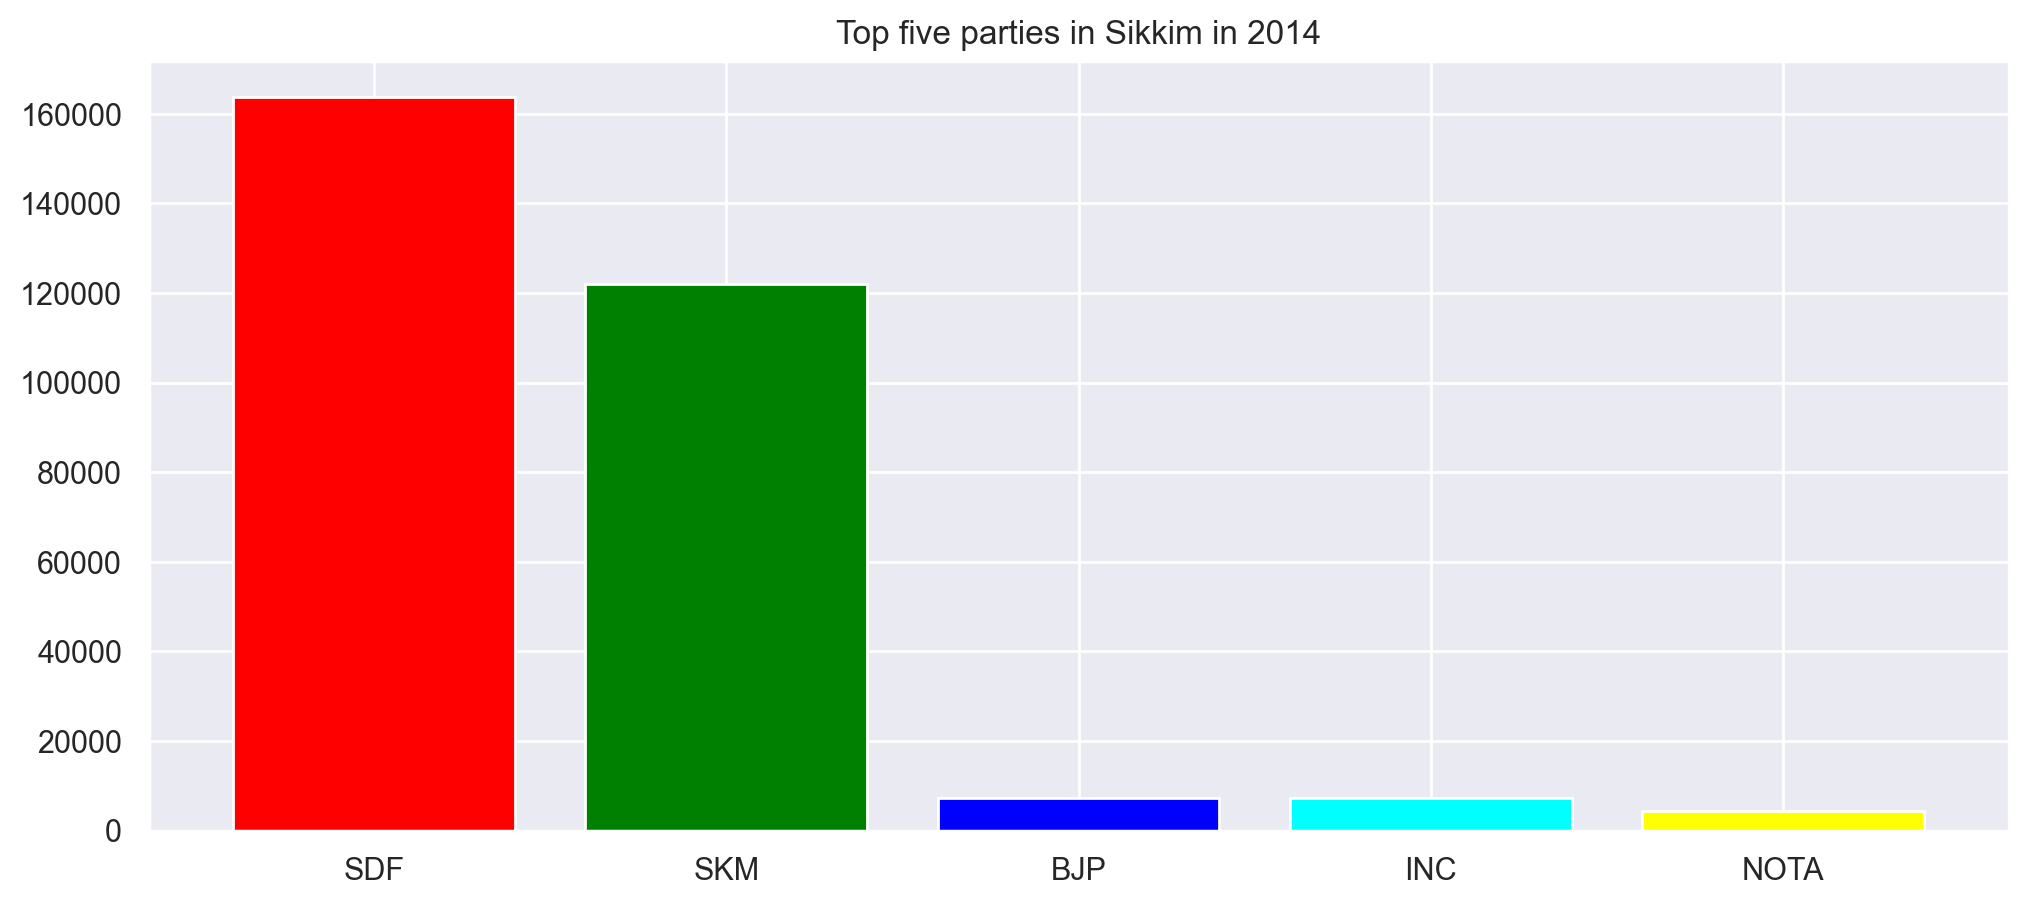

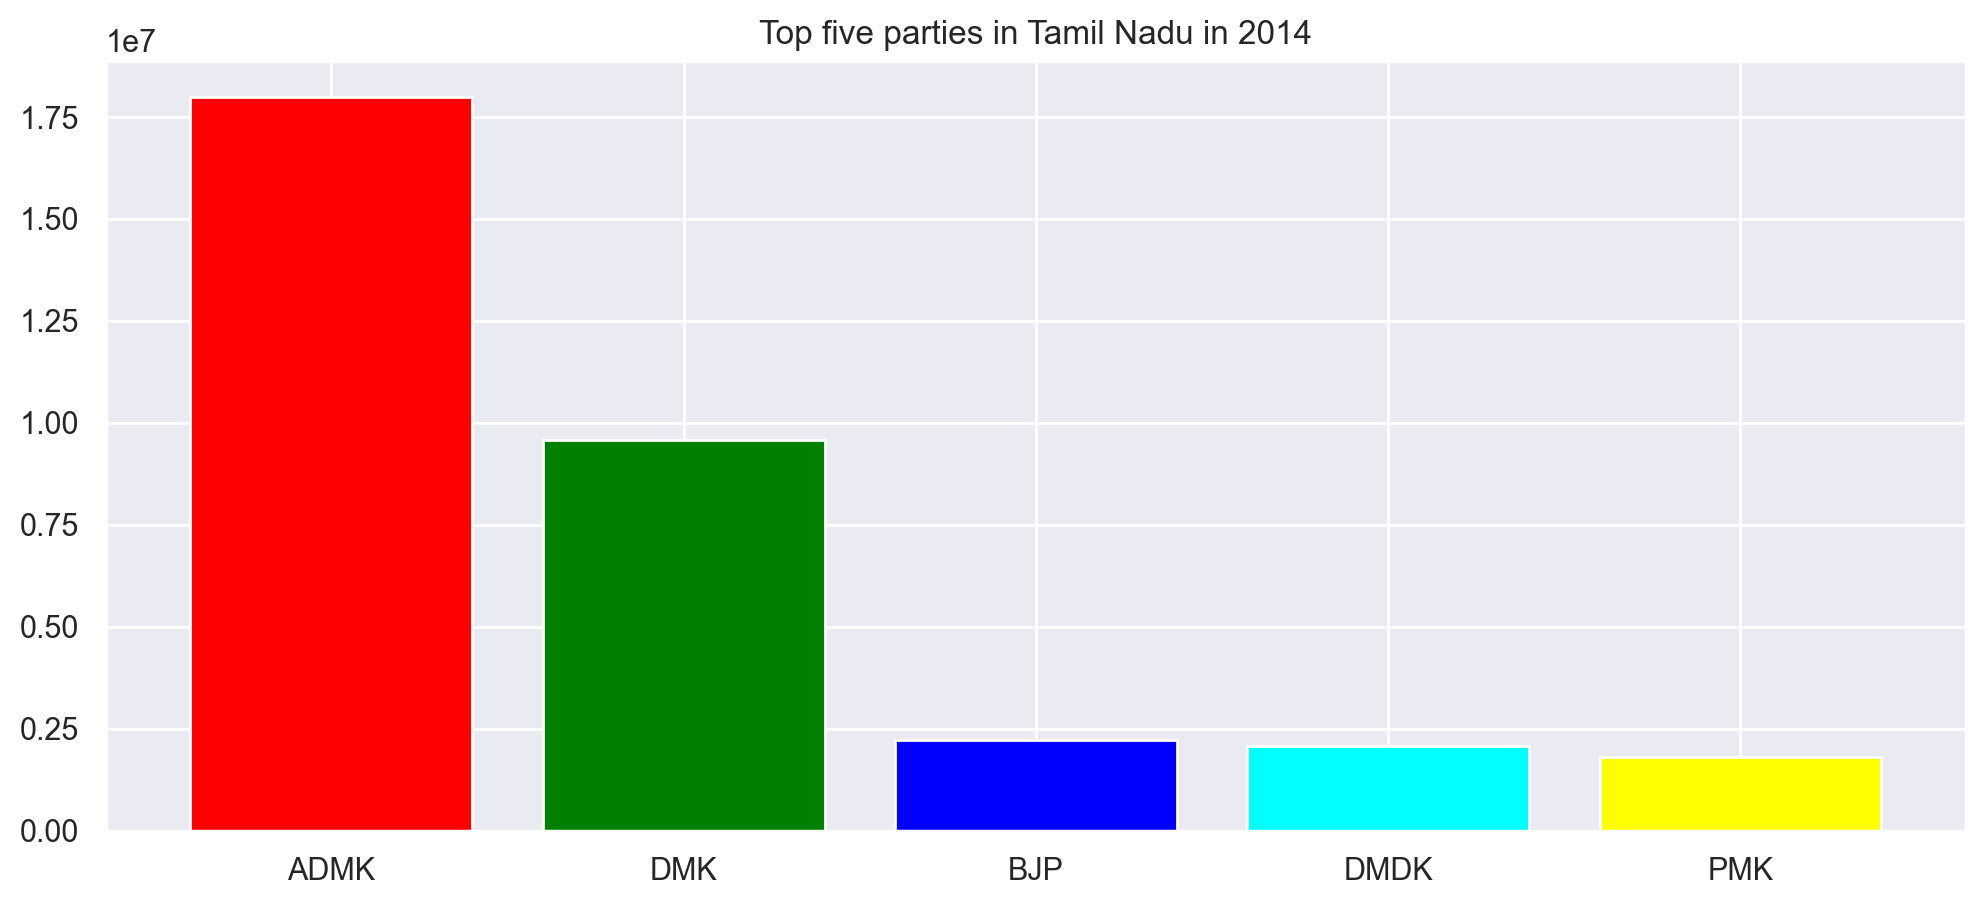

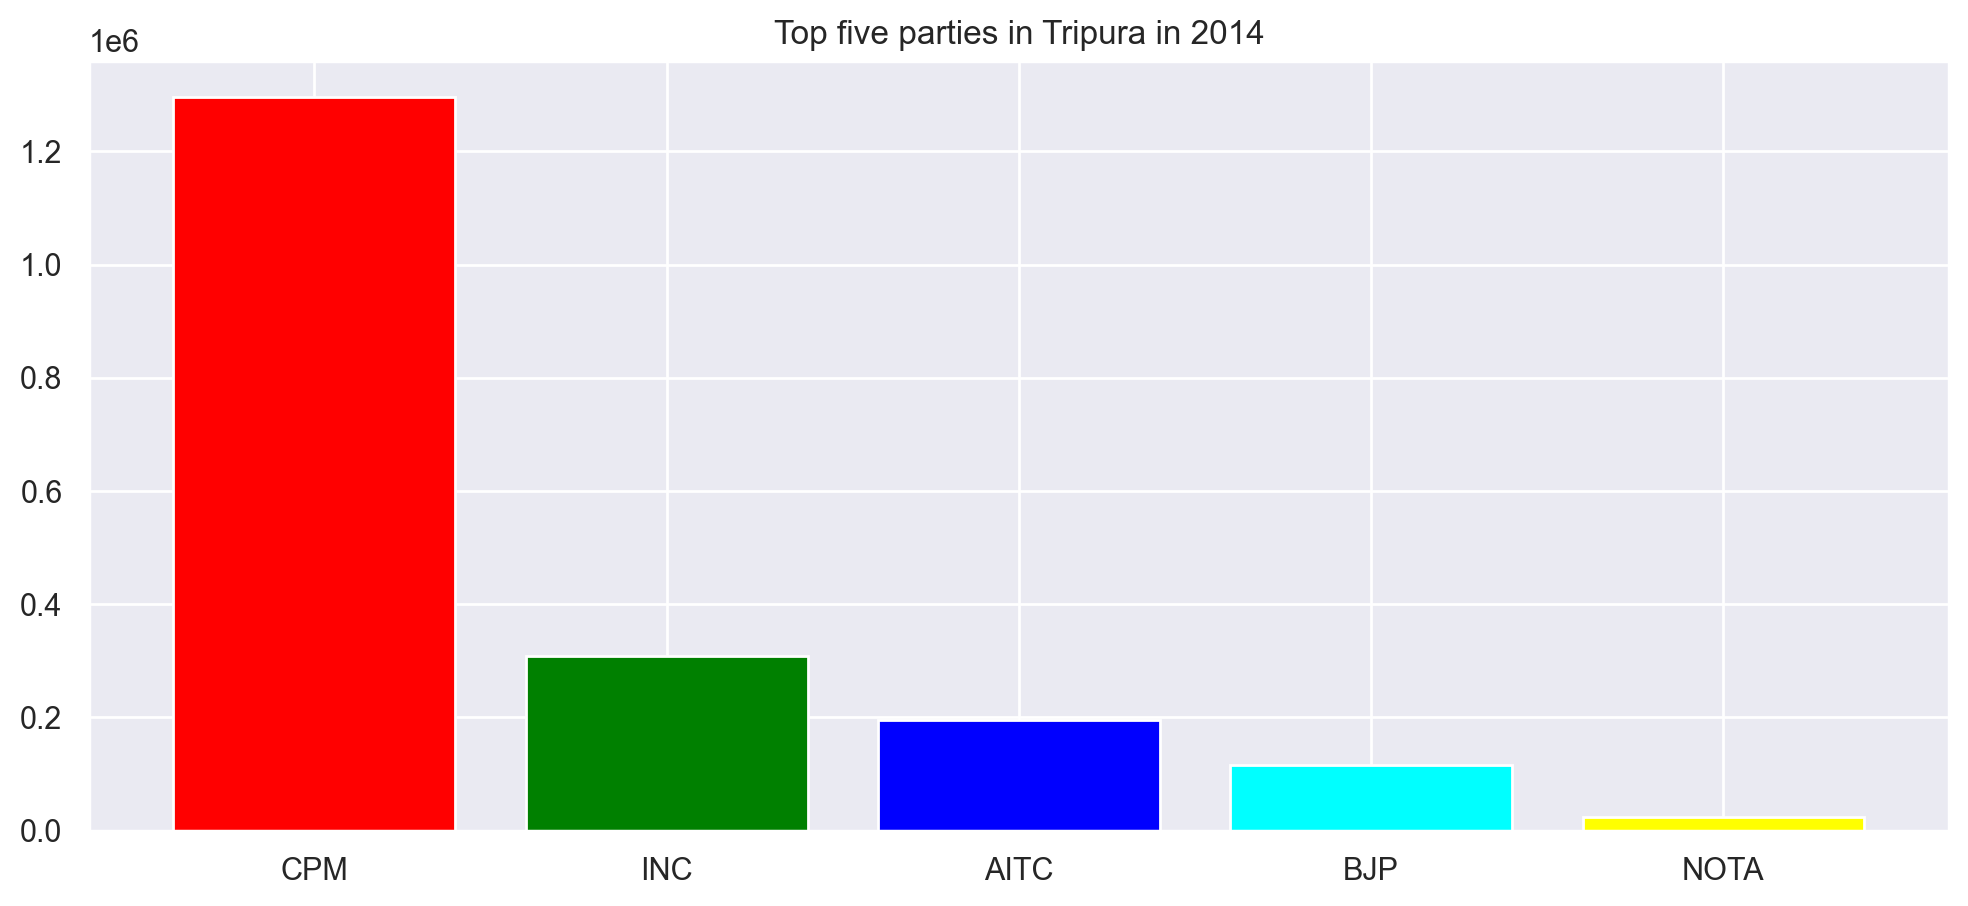

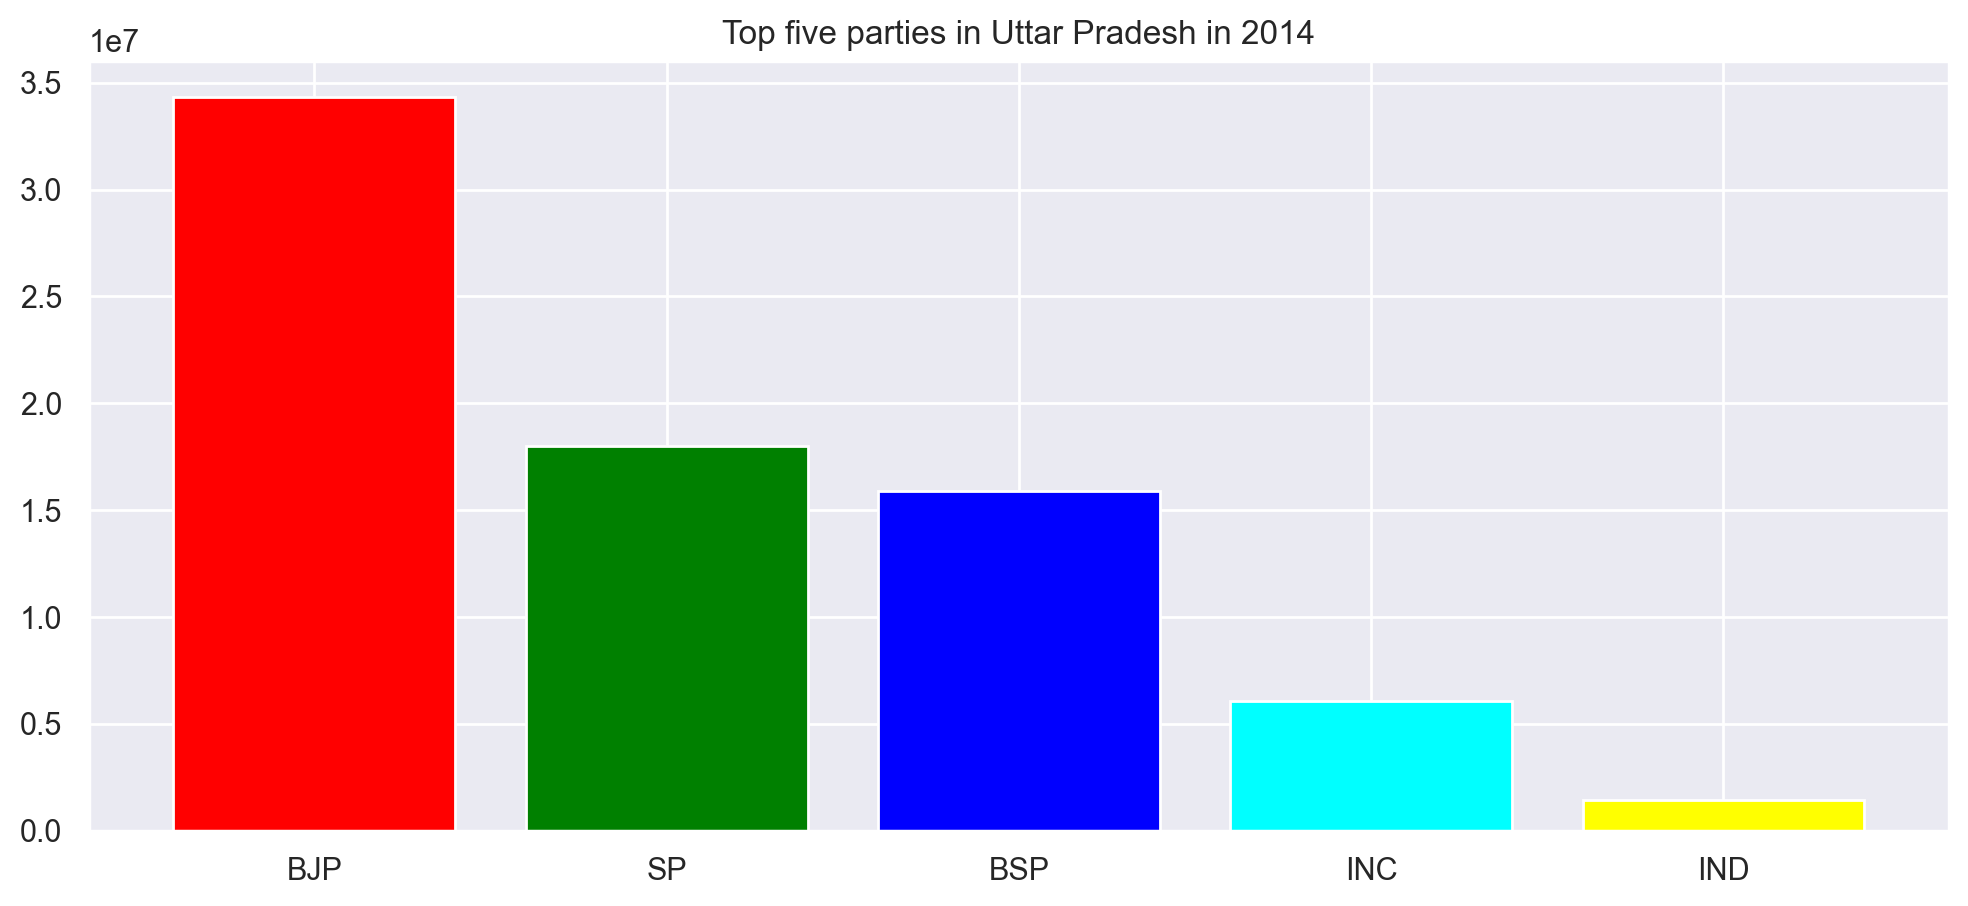

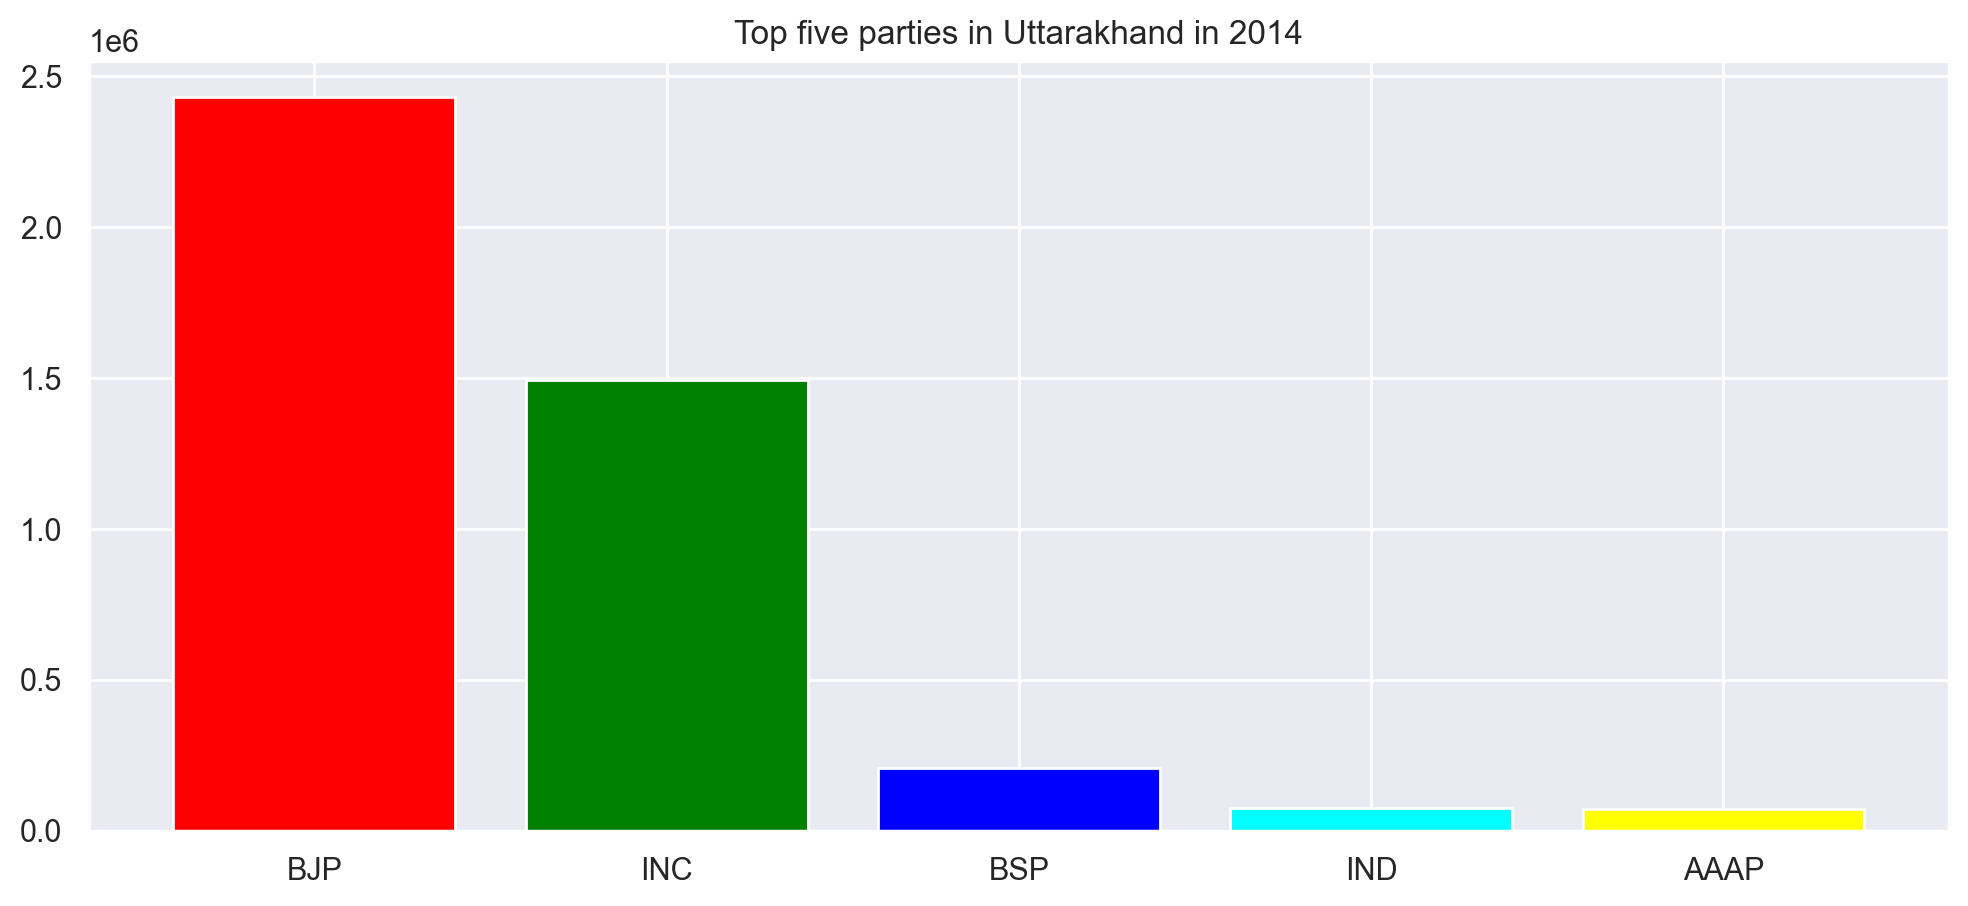

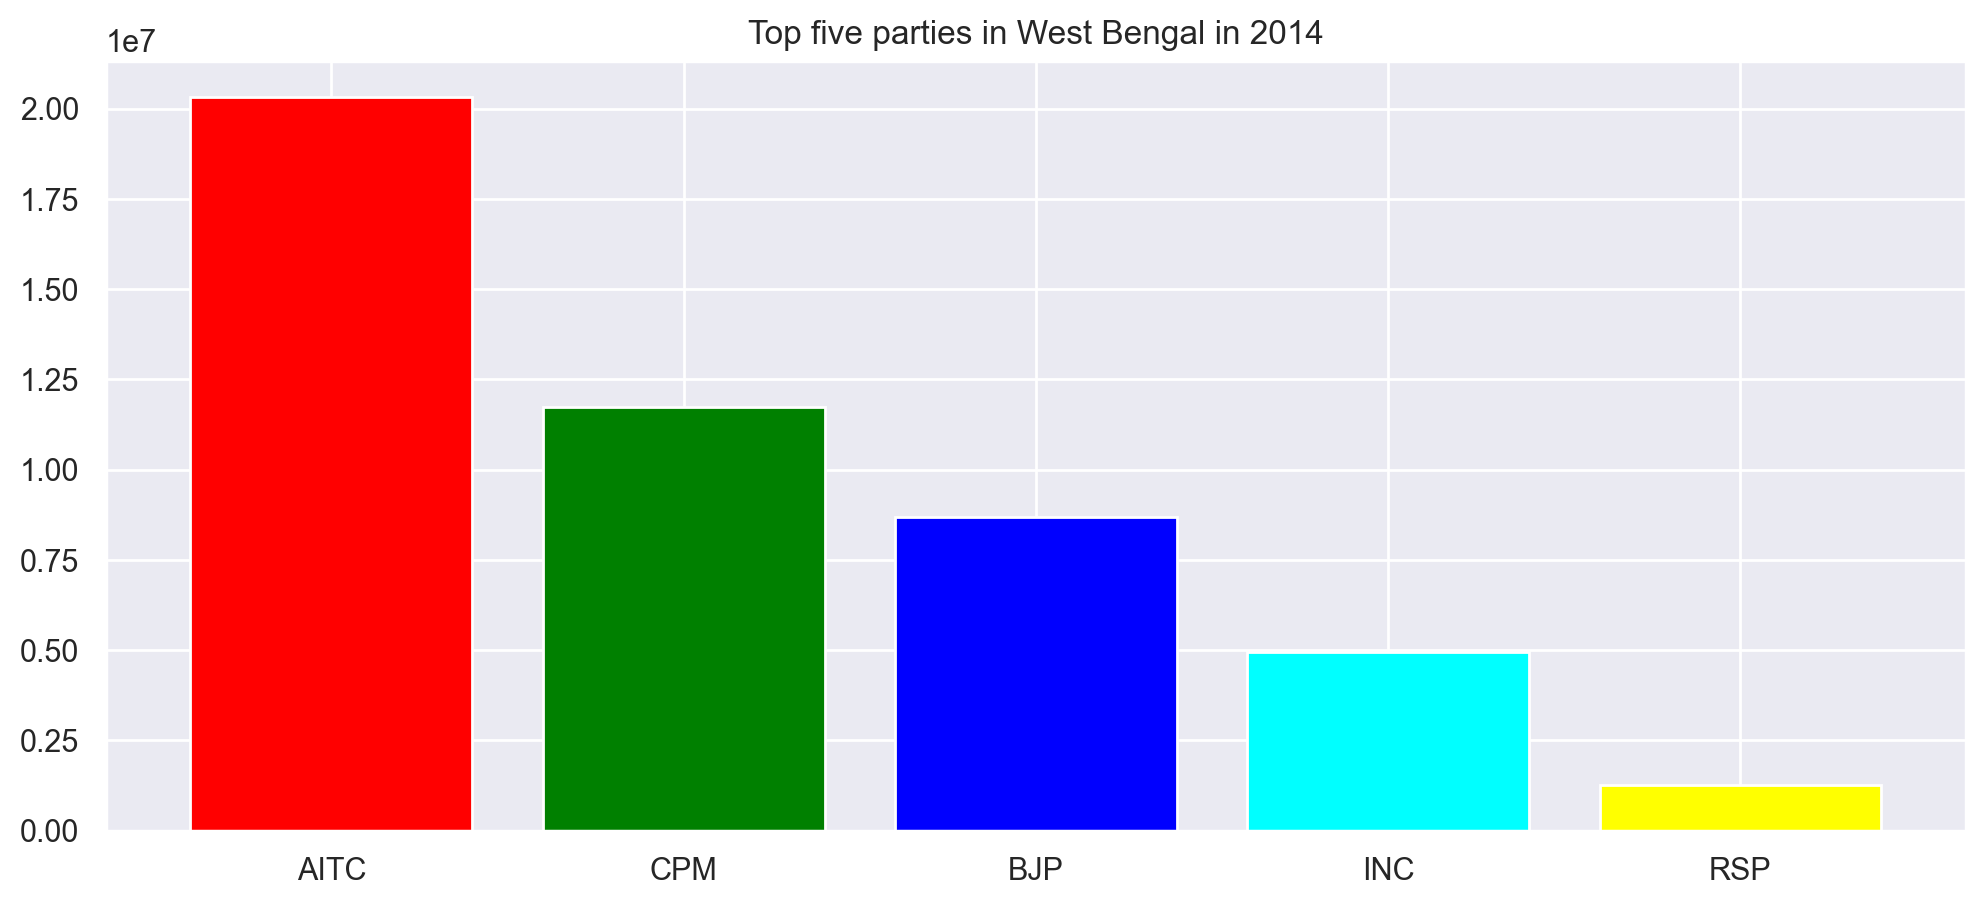

In [18]:
# states=df['st_name'].unique()
# data_2014 = national_data[national_data['year'] == 2014]
# for state in states:
#     data_2014 = data_2014[data_2014['st_name'] ==state]
#     data_2014_max_voted_party = data_2014.groupby('partyabbre')['totvotpoll'].sum()
#     data_2014_max_voted_party = pd.DataFrame(up_data_2014_max_voted_party)
#     data_2014_max_voted_party = data_2014_max_voted_party.sort_values(by= 'totvotpoll',ascending=False)
#     data_2014_top5_max_voted_party = data_2014_max_voted_party.head(5)
#     data_2014_top5_max_voted_party = data_2014_top5_max_voted_party.reset_index()

#     plt.figure(figsize = (12,5))
    
#     plt.bar(data_2014_top5_max_voted_party['partyabbre'],data_2014_top5_max_voted_party['totvotpoll'], color=[ 'red', 'green', 'blue', 'cyan', 'yellow'])
#     plt.title('top five party in '+state+ " in 2014")
#     plt.show()
states =pd.Series(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar','Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Nct Of Delhi', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
        'West Bengal'])
data_2014 = national_data[national_data['year'] == 2014]

for state in states:
    state_data_2014 = data_2014[data_2014['st_name'] == state]
    state_max_voted_party = state_data_2014.groupby('partyabbre')['totvotpoll'].sum()
    state_max_voted_party = pd.DataFrame(state_max_voted_party)
    state_max_voted_party = state_max_voted_party.sort_values(by='totvotpoll', ascending=False)
    state_top5_max_voted_party = state_max_voted_party.head(5)
    state_top5_max_voted_party = state_top5_max_voted_party.reset_index()

    plt.figure(figsize=(12, 5))   #Figure size (width 12 inch, Hight 5 inch)
    plt.bar(state_top5_max_voted_party['partyabbre'], state_top5_max_voted_party['totvotpoll'],
            color=['red', 'green', 'blue', 'cyan', 'yellow'])
    plt.title('Top five parties in ' + state + ' in 2014')
    plt.show()


**6. What are the top 5 parties that got most votes in Maharastra** ?

In [35]:
data_2014 = national_data[national_data['year'] == 2014]
mh_data_2014 = data_2014[data_2014['st_name'] =='Maharashtra']
mh_data_2014_max_voted_party = mh_data_2014.groupby('partyabbre')['totvotpoll'].sum()
mh_data_2014_max_voted_party = pd.DataFrame(mh_data_2014_max_voted_party)
mh_data_2014_max_voted_party = mh_data_2014_max_voted_party.sort_values(by= 'totvotpoll',ascending=False)
mh_data_2014_top5_max_voted_party = mh_data_2014_max_voted_party.head(5)
mh_data_2014_top5_max_voted_party 

totvotpoll
partyabbre            
BJP           13308961
SHS           10050652
INC            8830190
NCP            7782275
IND            1577114

<BarContainer object of 5 artists>

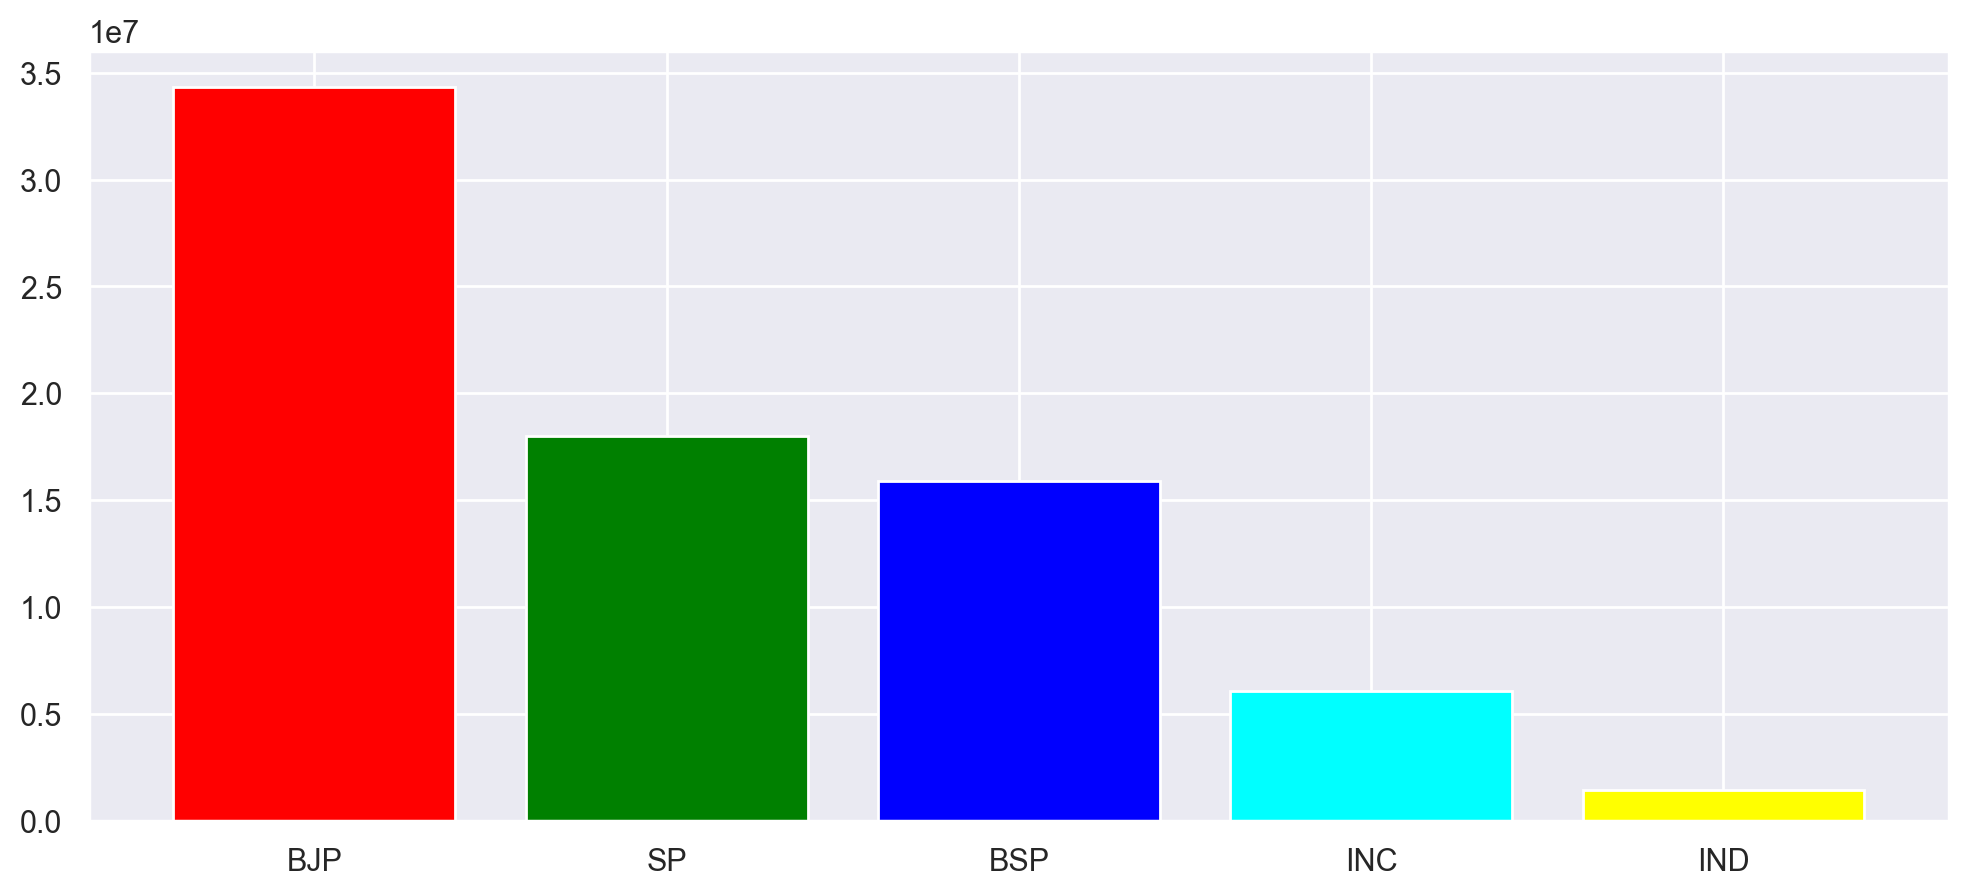

In [34]:
plt.figure(figsize = (12,5))
plt.bar(up_data_2014_top5_max_voted_party['partyabbre'],up_data_2014_top5_max_voted_party['totvotpoll'], color=[ 'red', 'green', 'blue', 'cyan', 'yellow'])

**7.  Plot the total votes corresponding to each party(top 8) for each year?**

In [20]:
yearwise_partywise_total_votes = national_data.groupby(['year','partyabbre'])['totvotpoll'].sum()
yearwise_partywise_total_votes = pd.DataFrame(yearwise_partywise_total_votes).reset_index()
years = yearwise_partywise_total_votes['year'].unique()
yearwise_partywise_total_votes_again = {}
for year in list(years):
    yearwise_partywise_total_votes_again['year_' + f'{year}'] = yearwise_partywise_total_votes[yearwise_partywise_total_votes['year'] == year].sort_values(by = 'totvotpoll',ascending= False).head(8)

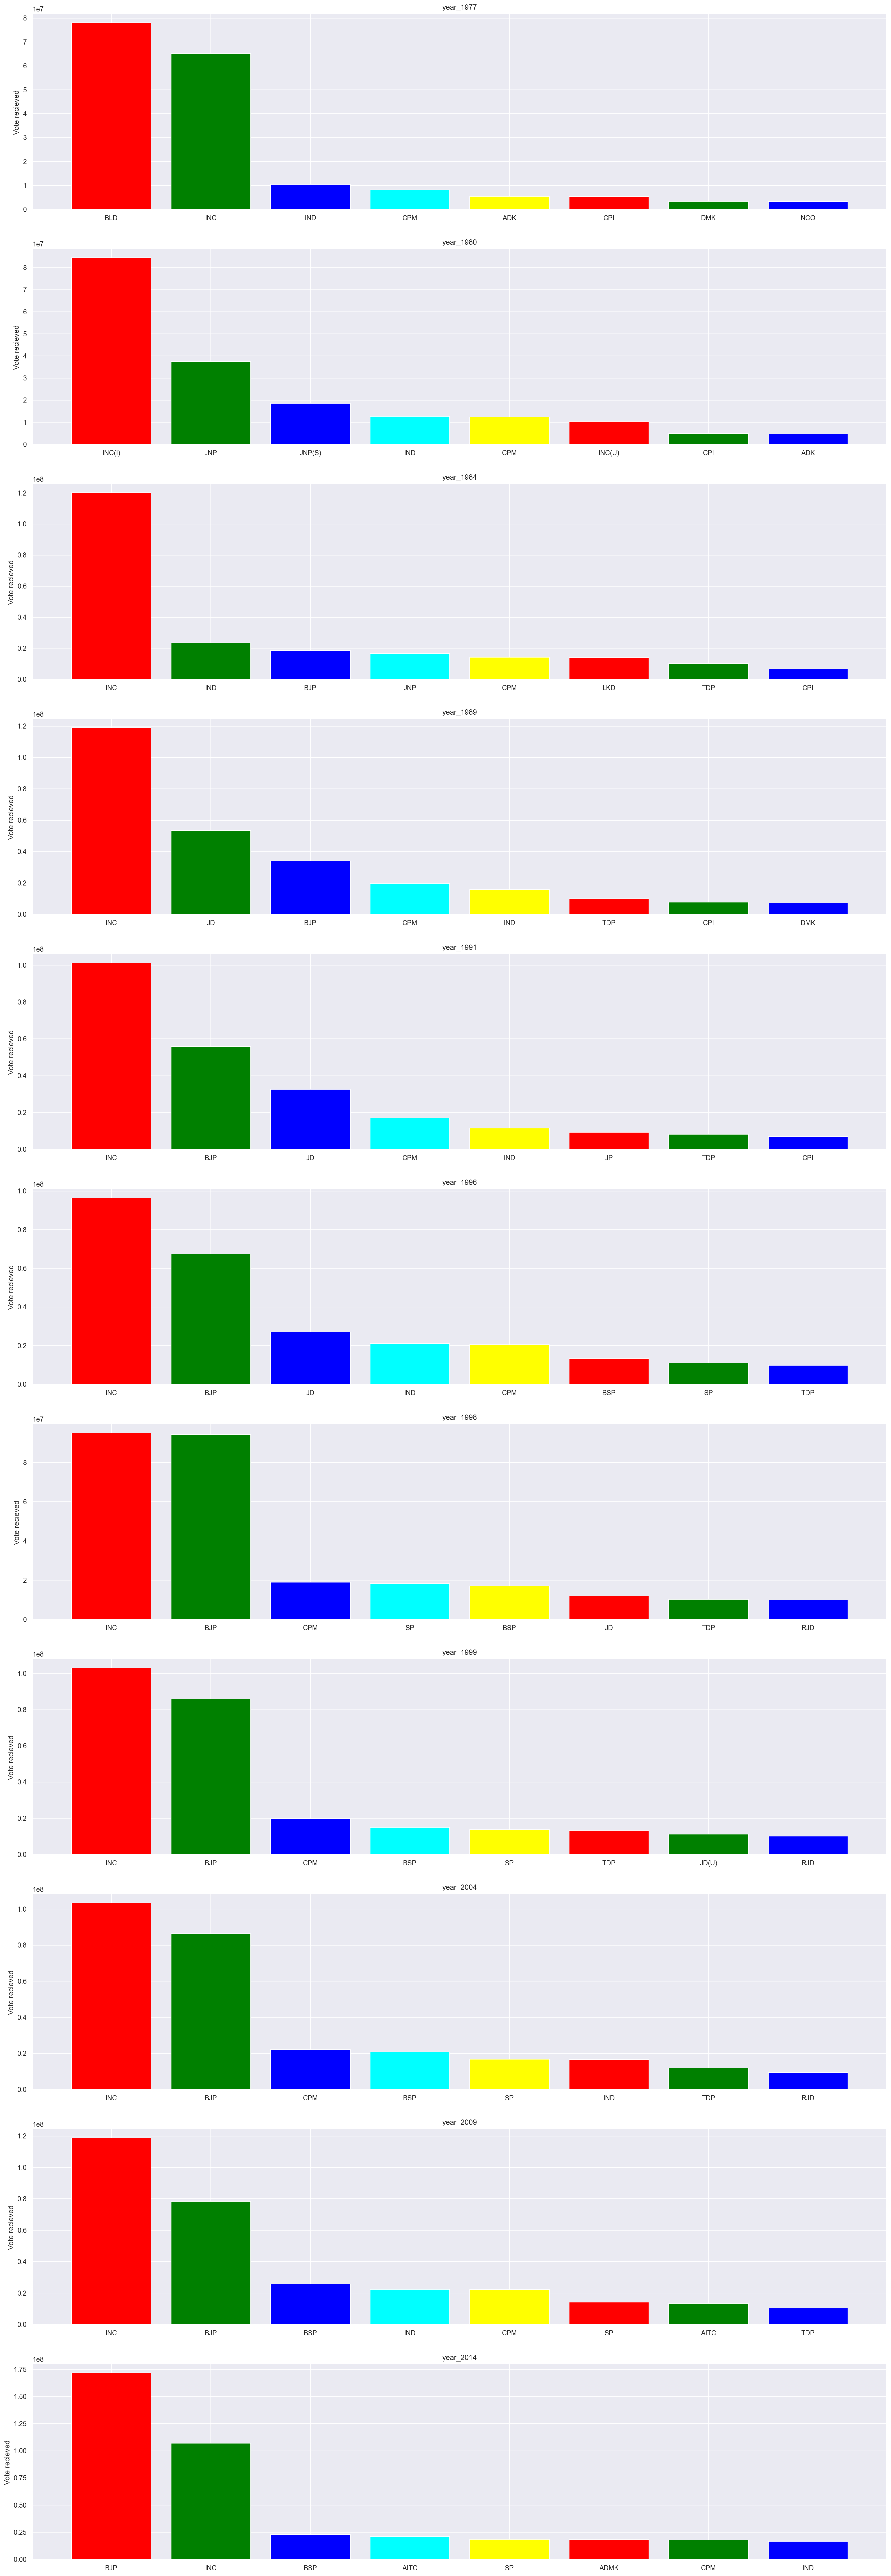

In [21]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize = (25,75))
for index,(key,value)  in enumerate(yearwise_partywise_total_votes_again.items()):
    dataframe = yearwise_partywise_total_votes_again[key]
    plt.subplot(11, 1, index+1)
    plt.bar(dataframe['partyabbre'],dataframe['totvotpoll'],color=[ 'red', 'green', 'blue', 'cyan', 'yellow'])
#     plt.plot(dataframe['partyabbre'],dataframe['totvotpoll'])
    plt.title(key)
    plt.ylabel('Vote recieved ')
    

### Total Constituencies per State

In [52]:
# Convert the 'year' column to datetime format
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Convert the 'year' column back to string format
df['year'] = df['year'].dt.strftime('%Y')

# Calculate the number of unique constituencies per state and year
constituencies_per_state_year = df.groupby(['st_name', 'year'])['pc_no'].nunique().reset_index().sort_values('pc_no', ascending=False)

# Create a dictionary to store the data for each year
data = {}
for year in sorted(df['year'].unique()):
    data[year] = constituencies_per_state_year[constituencies_per_state_year['year'] == year]

# Create the initial figure
fig = go.Figure()

# Add traces for each year
for year, year_data in data.items():
    fig.add_trace(go.Bar(
        x=year_data['st_name'],
        y=year_data['pc_no'],
        name=year
    ))

# Set up the layout
fig.update_layout(
    barmode='stack',
    showlegend=True,
    updatemenus=[
        {
            'buttons': [
                {
                    'label': 'All Years',
                    'method': 'update',
                    'args': [{'visible': [True] * len(fig.data)}, {'title': 'All Years'}]
                }
            ],
            'direction': 'down',
            'showactive': True,
            'active': 0
        }
    ]
)

# Add the JavaScript callback function for legends
buttons = []
for year in sorted(df['year'].unique()):
    visible = [False] * len(fig.data)
    visible[list(data.keys()).index(year)] = True
    buttons.append(
        dict(
            label=year,
            method='update',
            args=[{'visible': visible}, {'title': f'Year {year}'}]
        )
    )
fig.update_layout(
    updatemenus=[
        {
            'buttons': buttons,
            'direction': 'down',
            'showactive': True,
            'active': 0
        }
    ]
)


**Uttar Pradesh has the highest of constituencies.**

Text(0.5, 1.0, 'votes recieved by major parties till 2014')

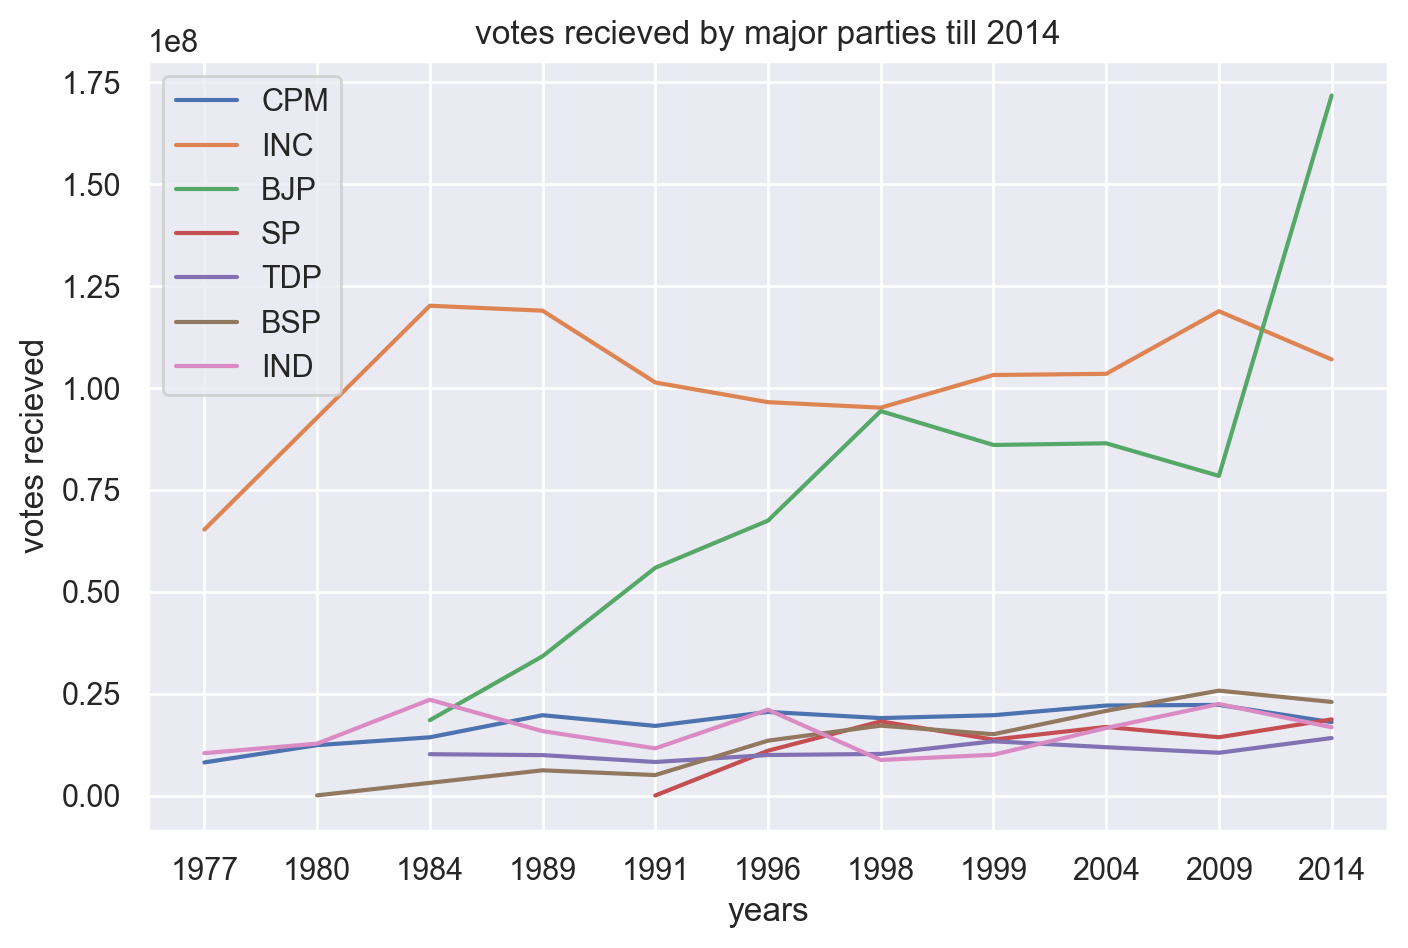

In [53]:
grouped_data=df.groupby(['year','partyabbre'])
x=grouped_data.sum()

x.describe()
data=pd.DataFrame(x).reset_index()
parties=['CPM','INC','BJP','SP','TDP','BSP','IND']
for party in parties:
    votes_per_party=data[data['partyabbre']==party]
    votes_per_party=votes_per_party[['year','totvotpoll']].sort_values(by = 'year',ascending= True)
    plt.plot(votes_per_party['year'],votes_per_party['totvotpoll'],label=party)
plt.legend()
plt.xlabel('years')
plt.ylabel('votes recieved')
plt.title('votes recieved by major parties till 2014')


### Partywise Vote Share

In [54]:

year=df['year'].unique()
for item in year:
    vote_share_top8 = df[df['year']==item].groupby('partyabbre')['totvotpoll'].sum().nlargest(8).index.tolist()

    def vote_share(row):
        if row['partyabbre'] not in vote_share_top8:
            return 'Other'
        else:
            return row['partyabbre']

    df['Party New'] = df.apply(vote_share, axis=1)

    counts = df[df['year']==item].groupby('Party New')['totvotpoll'].sum().sort_values(ascending=False)
    labels = counts.index
    values = counts.values

    pie = go.Pie(labels=labels, values=values, marker=dict(line=dict(color='#000000', width=1)))
    layout = go.Layout(title='Partywise Vote Share'+item)
    fig = go.Figure(data=[pie], layout=layout)
    py.iplot(fig)

From the above pie charts for diffrent years we can observe the variation of votes percentage with respect to year

### Seats Won by Party

BJP achieved a landslide victory winning 300 seats whereas INC won only 52 seats.

### Percentage of Voting by State

It refers to the proportion of eligible voters who participated in an election

In [55]:
# df_voters_state = df[['year','st_name','pc_name','electors']].drop_duplicates()
df_votes_perct_constituency = df.groupby(['year','st_name','electors','pc_name']).sum().reset_index()
data=df_votes_perct_constituency.groupby(['year','st_name']).sum().reset_index()
data['percent votes']=round(data['totvotpoll']*100/data['electors'],2)
data

years=data['year'].unique()
years.sort()

for year in years:
    yearlydata=data[data['year']==year]
    fig = px.bar(yearlydata, x='st_name', y='percent votes', color='percent votes', height=500,title=year +' voting percentage in state')
    fig.show()
    

Lakshadweep witnessed highest percentage of voting whereas voting was least in Jammu & Kashmir.

### Total Voters by State

In [56]:
for year in years:
    yearlydata=data[data['year']==year]
    fig = px.bar(yearlydata, x='st_name', y='electors', color='electors', height=500,title=year +' total eligible voters in state')
    fig.show()





Utatr Pradesh has highest number of people who are eligible for voting.

### Reservations

In India, reservations exist in almost every field. Entire political game runs on the basis of religion,caste and all other forms of reservations.

In [57]:
for year in years:
    yearlydata=df[df['year']==year]
    df_category = yearlydata['pc_type'].value_counts().reset_index()
    df_category.columns = ['pc_type','COUNT']
    fig = px.bar(df_category, x='pc_type', y='COUNT', color='pc_type', height=500,title=year+" candidates category wise")
    fig.show()

### Gender of Candidates

In [58]:
for year in years:
    yearlydata=df[df['year']==year]
    df_gender = yearlydata['cand_sex'].value_counts().reset_index()
    df_gender.columns = ['cand_sex','COUNT']
    pie = go.Pie(labels=df_gender['cand_sex'], values=df_gender['COUNT'], marker=dict(line=dict(color='black', width=1)))
    layout = go.Layout(title='yearly Male vs Female Ratio - All Candidates '+year)
    fig = go.Figure(data=[pie], layout=layout)
    py.iplot(fig)

**Adding a new column winner, win=1,defeat=0**

In [59]:
df=national_data
df['winner'] = df.groupby(['year', 'pc_name'])['totvotpoll'].transform(max) == df['totvotpoll']
df['winner'] = df['winner'].astype(int)
df.head()

st_name  year  pc_no                    pc_name pc_type  \
0  Andaman & Nicobar Islands  1977      1  Andaman & Nicobar Islands     GEN   
1  Andaman & Nicobar Islands  1977      1  Andaman & Nicobar Islands     GEN   
2  Andaman & Nicobar Islands  1980      1  Andaman & Nicobar Islands     GEN   
3  Andaman & Nicobar Islands  1980      1  Andaman & Nicobar Islands     GEN   
4  Andaman & Nicobar Islands  1980      1  Andaman & Nicobar Islands     GEN   

           cand_name cand_sex                 partyname partyabbre  \
0        K.R. Ganesh        M              Independents        IND   
1  Manoranjan Bhakta        M  Indian National Congress        INC   
2    Ramesh Mazumdar        M              Independents        IND   
3      Alagiri Swamy        M              Independents        IND   
4        Kannu Chemy        M              Independents        IND   

   totvotpoll  electors  winner  
0       25168     85308       0  
1       35400     85308       1  
2         109     96084       0  
3         125     96084       0  
4         405     96084       0

### Gender of Winning Candidates

In [60]:
for year in years:
    df_gender_won =df[df['year']==int(year)]
    df_gender_won =df_gender_won[df_gender_won['winner'] == 1]
    df_gender_won = df_gender_won['cand_sex'].value_counts().reset_index()
    df_gender_won.columns = ['cand_sex','COUNT']
    pie = go.Pie(labels=df_gender_won['cand_sex'], values=df_gender_won['COUNT'], marker=dict(line=dict(color='black', width=1)))
    layout = go.Layout(title='Male vs Female Ratio - Winners '+year)
    fig = go.Figure(data=[pie], layout=layout)
    py.iplot(fig)

There is very clear gap between number of male & female representatives in the assembly.

# ***Winner Prediction Using Random Forest***

In [3]:
df19=pd.read_csv('./LS_2.0.csv')

In [4]:
df19.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL\nCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL\nVOTES', 'POSTAL\nVOTES', 'TOTAL\nVOTES',
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

In [5]:
columns_to_drop=['SYMBOL','CRIMINAL\nCASES','EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL\nVOTES', 'POSTAL\nVOTES',
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY','AGE']

In [6]:
df.columns

Index(['st_name', 'year', 'pc_no', 'pc_name', 'pc_type', 'cand_name',
       'cand_sex', 'partyname', 'partyabbre', 'totvotpoll', 'electors'],
      dtype='object')

In [7]:
df19=df19.drop(columns_to_drop,axis=1)

In [8]:
new_column_names = {'STATE':'st_name','CONSTITUENCY':'pc_name','NAME':'cand_name','PARTY':'partyabbre','GENDER':'cand_sex','CATEGORY':'pc_type','TOTAL\nVOTES':'totvotpoll','TOTAL ELECTORS':'electors','WINNER':'winner'}
df19 = df19.rename(columns=new_column_names)

In [9]:
df19.columns

Index(['st_name', 'pc_name', 'cand_name', 'winner', 'partyabbre', 'cand_sex',
       'pc_type', 'totvotpoll', 'electors'],
      dtype='object')

In [10]:
df19['year']=2019

In [11]:
df19

st_name          pc_name              cand_name  winner  \
0         Telangana         ADILABAD         SOYAM BAPU RAO       1   
1         Telangana         ADILABAD           Godam Nagesh       0   
2         Telangana         ADILABAD          RATHOD RAMESH       0   
3         Telangana         ADILABAD                   NOTA       0   
4     Uttar Pradesh             AGRA  Satyapal Singh Baghel       1   
...             ...              ...                    ...     ...   
2258    Maharashtra  YAVATMAL-WASHIM     Anil Jayram Rathod       0   
2259      Telangana        ZAHIRABAD              B.B.PATIL       1   
2260      Telangana        ZAHIRABAD        MADAN MOHAN RAO       0   
2261      Telangana        ZAHIRABAD     BANALA LAXMA REDDY       0   
2262      Telangana        ZAHIRABAD                   NOTA       0   

     partyabbre cand_sex  pc_type  totvotpoll  electors  year  
0           BJP     MALE       ST      377374   1489790  2019  
1           TRS     MALE       ST      318814   1489790  2019  
2           INC     MALE       ST      314238   1489790  2019  
3          NOTA      NaN      NaN       13036   1489790  2019  
4           BJP     MALE       SC      646875   1937690  2019  
...         ...      ...      ...         ...       ...   ...  
2258        IND     MALE  GENERAL       14686   1916185  2019  
2259        TRS     MALE  GENERAL      434244   1498666  2019  
2260        INC     MALE  GENERAL      428015   1498666  2019  
2261        BJP     MALE  GENERAL      138947   1498666  2019  
2262       NOTA      NaN      NaN       11140   1498666  2019  

[2263 rows x 10 columns]

In [12]:
df19.loc[df19['st_name'] == 'NCT OF Delhi', 'st_name'] ='Nct Of Delhi'
states=df19['st_name'].unique()
states=np.sort(states)
states

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Nct Of Delhi',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [13]:
st=df['st_name'].unique()
st

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chattisgarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa',
       'Goa Daman & Diu', 'Goa, Daman & Diu', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'National Capital Territory Of Delhi', 'Nct Of Delhi', 'Odisha',
       'Orissa', 'Pondicherry', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'Uttaranchal', 'West Bengal'], dtype=object)

In [14]:
missing_columns = df19.isnull().sum()
# Get the number of columns that are not available
num_missing_columns = missing_columns[missing_columns > 0].count()

print("Number of columns with missing values:", num_missing_columns)

Number of columns with missing values: 2


In [15]:
# Count the number of missing values in each column
num_missing_values = df19.isna().sum()

print("Number of missing values in each column:")
print(num_missing_values)


Number of missing values in each column:
st_name         0
pc_name         0
cand_name       0
winner          0
partyabbre      0
cand_sex      245
pc_type       245
totvotpoll      0
electors        0
year            0
dtype: int64


In [16]:
df_cleaned = df19.dropna()

In [17]:
num_missing_values = df_cleaned.isna().sum()

print("Number of missing values in each column:")
print(num_missing_values)

Number of missing values in each column:
st_name       0
pc_name       0
cand_name     0
winner        0
partyabbre    0
cand_sex      0
pc_type       0
totvotpoll    0
electors      0
year          0
dtype: int64


In [18]:
df19=df_cleaned

In [19]:
df19.head(20)

st_name         pc_name                          cand_name  winner  \
0       Telangana        ADILABAD                     SOYAM BAPU RAO       1   
1       Telangana        ADILABAD                       Godam Nagesh       0   
2       Telangana        ADILABAD                      RATHOD RAMESH       0   
4   Uttar Pradesh            AGRA              Satyapal Singh Baghel       1   
5   Uttar Pradesh            AGRA                   Manoj Kumar Soni       0   
6   Uttar Pradesh            AGRA                       Preeta Harit       0   
7     Maharashtra      AHMADNAGAR  Dr. SUJAY RADHAKRISHNA VIKHEPATIL       1   
8     Maharashtra      AHMADNAGAR            SANGRAM ARUNKAKA JAGTAP       0   
9     Maharashtra      AHMADNAGAR              SUDHAKAR LAXMAN AVHAD       0   
10        Gujarat  AHMEDABAD EAST         Patel Hasmukhbhai Somabhai       1   
11        Gujarat  AHMEDABAD EAST                      Gitaben Patel       0   
12        Gujarat  AHMEDABAD WEST               DR. KIRIT P. SOLANKI       1   
13        Gujarat  AHMEDABAD WEST                        RAJU PARMAR       0   
15        Gujarat  AHMEDABAD WEST     TRIBHOVANDAS KARSANDAS VAGHELA       0   
16      Rajasthan           AJMER                Bhagirath Chaudhary       1   
17      Rajasthan           AJMER                  Riju Jhunjhunwala       0   
18      Rajasthan           AJMER                    Durga Lal Regar       0   
19      Rajasthan           AJMER                       Vishram Babu       0   
20  Uttar Pradesh        AKBARPUR             Devendra Singh 'Bhole'       1   
21  Uttar Pradesh        AKBARPUR                       Nisha Sachan       0   

   partyabbre cand_sex  pc_type  totvotpoll  electors  year  
0         BJP     MALE       ST      377374   1489790  2019  
1         TRS     MALE       ST      318814   1489790  2019  
2         INC     MALE       ST      314238   1489790  2019  
4         BJP     MALE       SC      646875   1937690  2019  
5         BSP     MALE       SC      435329   1937690  2019  
6         INC   FEMALE       SC       45149   1937690  2019  
7         BJP     MALE  GENERAL      704660   1861396  2019  
8         NCP     MALE  GENERAL      423186   1861396  2019  
9         VBA     MALE  GENERAL       31807   1861396  2019  
10        BJP     MALE  GENERAL      749834   1811851  2019  
11        INC   FEMALE  GENERAL      315504   1811851  2019  
12        BJP     MALE       SC      641622   1643317  2019  
13        INC     MALE       SC      320076   1643317  2019  
15        BSP     MALE       SC       10028   1643317  2019  
16        BJP     MALE  GENERAL      815076   1876346  2019  
17        INC     MALE  GENERAL      398652   1876346  2019  
18        BSP     MALE       SC       13618   1876346  2019  
19       APoI     MALE       SC       13041   1876346  2019  
20        BJP     MALE  GENERAL      581282   1766121  2019  
21        BSP   FEMALE  GENERAL      306140   1766121  2019

In [20]:
df.head()

st_name  year  pc_no                    pc_name pc_type  \
0  Andaman & Nicobar Islands  1977      1  Andaman & Nicobar Islands     GEN   
1  Andaman & Nicobar Islands  1977      1  Andaman & Nicobar Islands     GEN   
2  Andaman & Nicobar Islands  1980      1  Andaman & Nicobar Islands     GEN   
3  Andaman & Nicobar Islands  1980      1  Andaman & Nicobar Islands     GEN   
4  Andaman & Nicobar Islands  1980      1  Andaman & Nicobar Islands     GEN   

           cand_name cand_sex                 partyname partyabbre  \
0        K.R. Ganesh        M              Independents        IND   
1  Manoranjan Bhakta        M  Indian National Congress        INC   
2    Ramesh Mazumdar        M              Independents        IND   
3      Alagiri Swamy        M              Independents        IND   
4        Kannu Chemy        M              Independents        IND   

   totvotpoll  electors  
0       25168     85308  
1       35400     85308  
2         109     96084  
3         125     96084  
4         405     96084

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train = df[df['year'] <= 2009]
test = df[df['year'] ==2014]

X_train = train.drop(['totvotpoll'], axis=1)
y_train = train['totvotpoll']

df

# X_test = test.drop(['totvotpoll'], axis=1)
# y_test = test['totvotpoll']

# model = LinearRegression()
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

st_name  year  pc_no                    pc_name  \
0      Andaman & Nicobar Islands  1977      1  Andaman & Nicobar Islands   
1      Andaman & Nicobar Islands  1977      1  Andaman & Nicobar Islands   
2      Andaman & Nicobar Islands  1980      1  Andaman & Nicobar Islands   
3      Andaman & Nicobar Islands  1980      1  Andaman & Nicobar Islands   
4      Andaman & Nicobar Islands  1980      1  Andaman & Nicobar Islands   
...                          ...   ...    ...                        ...   
73076                West Bengal  2014     42                    Birbhum   
73077                West Bengal  2014     42                    Birbhum   
73078                West Bengal  2014     42                    Birbhum   
73079                West Bengal  2014     42                    Birbhum   
73080                West Bengal  2014     42                    Birbhum   

      pc_type                 cand_name cand_sex                 partyname  \
0         GEN               K.R. Ganesh        M              Independents   
1         GEN         Manoranjan Bhakta        M  Indian National Congress   
2         GEN           Ramesh Mazumdar        M              Independents   
3         GEN             Alagiri Swamy        M              Independents   
4         GEN               Kannu Chemy        M              Independents   
...       ...                       ...      ...                       ...   
73076     GEN         None Of The Above      NaN                      NOTA   
73077     GEN          Syed Siraj Jimmi        M                       INC   
73078     GEN              Joy Banerjee        M                       BJP   
73079     GEN  Dr. Elahi Kamre Mahammad        M                       CPM   
73080     GEN               Satabdi Roy        F                      AITC   

      partyabbre  totvotpoll  electors  
0            IND       25168     85308  
1            INC       35400     85308  
2            IND         109     96084  
3            IND         125     96084  
4            IND         405     96084  
...          ...         ...       ...  
73076       NOTA       14557   1495089  
73077        INC      132084   1495089  
73078        BJP      235753   1495089  
73079        CPM      393305   1495089  
73080       AITC      460568   1495089  

[73081 rows x 11 columns]

## **Random Forest Classifier**

We will be using **Random Forest Classifier** to predict the winners of the election. In order to know the optimum number of trees required to predict the result with highest accuracy, we will be plotting the accuracy score for various values of k and will be selecting k value that gives highest accuracy.

In [51]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Importing and preprocessing data
data = pd.read_csv('./indian_national_level_election.csv')
data1 = df19
data1['year'] = 2019
train_data = data[data['year'].between(2009, 2014)]
test_data = data1[data1['year'] == 2019]

train_features = train_data[['st_name', 'pc_name', 'pc_type', 'partyabbre']]
train_target = train_data['totvotpoll']

test_features = test_data[['st_name', 'pc_name', 'pc_type', 'partyabbre']]
test_target = test_data['totvotpoll']

# Encoding categorical features
train_features_encoded = pd.get_dummies(train_features)
test_features_encoded = pd.get_dummies(test_features)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(train_features_encoded, train_target,test_size=0.3)

# Creating and training the Random Forest model
model = RandomForestRegressor(n_estimators=100, max_depth=10)  # You can change the hyperparameters here
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Evaluating the accuracy of the model
r2 = r2_score(y_test, predictions)
print('Accuracy:', r2)

import joblib

# Save the trained model to a file
joblib.dump(model, 'random_forest_model.pkl')



Accuracy: 0.6485004324255044


['random_forest_model.pkl']

In [25]:
# Importing the required libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

try:
    # Reading the data into a pandas DataFrame
    data = pd.read_csv('./indian_national_level_election.csv')
    data1 = df19
    data1['year'] = 2019
    # Filtering the data for training and testing
    
    train_data = data[data['year'].between(2009,2014)]
    test_data = data1[data1['year'] == 2019]

    # Preparing the features and target variables for training
    train_features = train_data[['st_name',  'pc_name', 'pc_type', 'partyabbre']]
    train_target = train_data['totvotpoll']

    # Preparing the features and target variables for testing
    test_features = test_data[['st_name',  'pc_name', 'pc_type', 'partyabbre']]
    test_target = test_data['totvotpoll']

    # Encoding categorical variables using One-Hot Encoding
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
    train_features_encoded = encoder.fit_transform(train_features)
    test_features_encoded = encoder.transform(test_features)
    encoded_columns = encoder.get_feature_names_out(train_features.columns)
    train_features_encoded_df = pd.DataFrame(train_features_encoded, columns=encoded_columns)
    test_features_encoded_df = pd.DataFrame(test_features_encoded, columns=encoded_columns)

    # Creating and training the Random Forest model
    model = RandomForestRegressor(n_estimators=100, max_depth=10)
    model.fit(train_features_encoded_df, train_target)

    # Making predictions on the test set
    predictions = model.predict(test_features_encoded_df)

    # Evaluating the accuracy of the model
    r2 = r2_score(test_target, predictions)
    print('Accuracy:', r2)

except KeyError as e:
    print("KeyError:", str(e))




Accuracy: 0.2783842748943498


### 2019 election prediction

In [77]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from joblib import dump, load

# Read the dataset
# df = pd.read_csv('./indian_national_level_election.csv')

# Filter the relevant columns for training
train_columns = ['st_name', 'year', 'partyabbre', 'totvotpoll', 'electors', 'pc_name','cand_name','winner']
train_data = df[train_columns].copy()

# Convert 'year' column to categorical
train_data['year'] = train_data['year'].astype('category')

# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Perform ordinal encoding for categorical variables
categorical_columns = ['st_name', 'partyabbre', 'pc_name', 'year','cand_name']
encoded_data_train = train_data.copy()
encoded_data_train[categorical_columns] = ordinal_encoder.fit_transform(train_data[categorical_columns])

# Prepare the input features and target variable for training
X_train = encoded_data_train.drop('winner', axis=1)
y_train = encoded_data_train['winner']

# Define the years for training in phases
start_year = 0
end_year = 11
year_step = 1

##############              TEST DATA PREPARATION          ################################
# df19.dtypes

# Filter the relevant columns for testing
test_columns = ['st_name', 'year', 'partyabbre', 'totvotpoll', 'electors', 'pc_name', 'cand_name', 'winner']
test_data = df19[test_columns].copy()

# Convert 'year' column to categorical
test_data['year'] = test_data['year'].astype('category')

# Perform ordinal encoding for categorical variables on the test data
encoded_data_test = test_data.copy()

# Initialize a new OrdinalEncoder
ordinal_encoder_test = OrdinalEncoder()

# Fit and transform the categorical columns in the test data
encoded_data_test[categorical_columns] = ordinal_encoder_test.fit_transform(test_data[categorical_columns])

encoded_data_test

# Prepare the test data for the selected year (2019)
test_data_2019 = encoded_data_test[encoded_data_test['year'] == 0.0]
X_test_2019 = test_data_2019.drop('winner', axis=1)
y_test_2019 = test_data_2019['winner']

##################### PREPARATION END ON TEST DATA ########################################


# Initialize the model
model = RandomForestClassifier()

# encoded_data_train.dtypes
# type(year)
# encoded_data_train
# encoded_data_train['year'].unique()

# X_test_2014
# Train the model in phases
for year in range(start_year, end_year, year_step):
    # Filter the data for the current phase
    
    phase_data = encoded_data_train[encoded_data_train['year'] == float(year)]
    # Check if the current phase has any data points
    if phase_data.shape[0] == 0:
        print(f"No data available for phase {year}")
        continue

    # Prepare the input features and target variable for the current phase
    X_phase = phase_data.drop('winner', axis=1)
    y_phase = phase_data['winner']

    # Train the model on the current phase
    model.fit(X_phase, y_phase)

    # Save the trained model for the current phase
    model_filename = f'model_phase_{year}.joblib'
    dump(model, model_filename)

    # Print information about the current phase
    print(f"Trained model for phase {year} saved as {model_filename}")

    # Make predictions on the 2019 test data
    predictions_2019 = model.predict(X_test_2019)
    print('predictions_2019 ',predictions_2019,predictions_2019.shape)
    # Evaluate the model performance for 2019
    mse_2019 = mean_squared_error(y_test_2019, predictions_2019)
    rmse_2019 = np.sqrt(mse_2019)
    print(f"Testing performance for 2019 data: RMSE = {rmse_2019}")
    # Calculate accuracy for the overall results
    accuracy = 100 * (1 - abs(predictions_2019 - y_test_2019) / y_test_2019.mean())
    overall_accuracy = accuracy.mean()
    print(f"Overall accuracy: {overall_accuracy:.2f}%")

Trained model for phase 0 saved as model_phase_0.joblib
predictions_2019  [1 1 1 ... 1 1 0] (2018,)
Testing performance for 2019 data: RMSE = 0.5286630668542098
Overall accuracy: -4.64%
Trained model for phase 1 saved as model_phase_1.joblib
predictions_2019  [1 1 1 ... 0 0 0] (2018,)
Testing performance for 2019 data: RMSE = 0.5153731797160811
Overall accuracy: 0.56%
Trained model for phase 2 saved as model_phase_2.joblib
predictions_2019  [1 1 1 ... 1 1 0] (2018,)
Testing performance for 2019 data: RMSE = 0.5177713926670923
Overall accuracy: -0.37%
Trained model for phase 3 saved as model_phase_3.joblib
predictions_2019  [1 1 1 ... 1 1 0] (2018,)
Testing performance for 2019 data: RMSE = 0.49577001605645177
Overall accuracy: 7.98%
Trained model for phase 4 saved as model_phase_4.joblib
predictions_2019  [1 1 1 ... 1 1 0] (2018,)
Testing performance for 2019 data: RMSE = 0.5258435103937209
Overall accuracy: -3.53%
Trained model for phase 5 saved as model_phase_5.joblib
predictions_201

### 2014 election prediction

In [53]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from joblib import dump, load

# Read the dataset
# df = pd.read_csv('./indian_national_level_election.csv')

# Filter the relevant columns for training
train_columns = ['st_name', 'year', 'partyabbre', 'totvotpoll', 'electors', 'pc_name','cand_name','winner']
train_data = df[train_columns].copy()

# Convert 'year' column to categorical
train_data['year'] = train_data['year'].astype('category')

# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Perform ordinal encoding for categorical variables
categorical_columns = ['st_name', 'partyabbre', 'pc_name', 'year','cand_name']
encoded_data_train = train_data.copy()
encoded_data_train[categorical_columns] = ordinal_encoder.fit_transform(train_data[categorical_columns])

# Prepare the input features and target variable for training
X_train = encoded_data_train.drop('winner', axis=1)
y_train = encoded_data_train['winner']

# Define the years for training in phases
start_year = 0
end_year = 10
year_step = 1

##############              TEST DATA PREPARATION          ################################

# Filter the relevant columns for testing
test_columns = ['st_name', 'year', 'partyabbre', 'totvotpoll', 'electors', 'pc_name','cand_name','winner']
test_data = df[test_columns].copy()

# Convert 'year' column to categorical
test_data['year'] = test_data['year'].astype('category')

# Perform ordinal encoding for categorical variables on the test data
encoded_data_test = test_data.copy()
encoded_data_test[categorical_columns] = ordinal_encoder.transform(test_data[categorical_columns])

# Prepare the test data for the selected year (2014)
test_data_2014 = encoded_data_test[encoded_data_test['year'] == 10.0]
X_test_2014 = test_data_2014.drop('winner', axis=1)
y_test_2014 = test_data_2014['winner']

##################### END TEST DATA ########################################

# Initialize the model
model = RandomForestClassifier()
# X_test_2014
# Train the model in phases
for year in range(start_year, end_year, year_step):
    # Filter the data for the current phase
    
    phase_data = encoded_data_train[encoded_data_train['year'] == float(year)]
    # Check if the current phase has any data points
    if phase_data.shape[0] == 0:
        print(f"No data available for phase {1977+year*5}")
        continue

    # Prepare the input features and target variable for the current phase
    X_phase = phase_data.drop('winner', axis=1)
    y_phase = phase_data['winner']

    # Train the model on the current phase
    model.fit(X_phase, y_phase)

    # Save the trained model for the current phase
    model_filename = f'model_phase_{year}.joblib'
    dump(model, model_filename)

    # Print information about the current phase
    print(f"Trained model for phase {year} saved as {model_filename}")

    # Make predictions on the 2014 test data
    predictions_2014 = model.predict(X_test_2014)
    print('predictions_2014 ',predictions_2014,predictions_2014.shape)
    # Evaluate the model performance for 2014
    mse_2014 = mean_squared_error(y_test_2014, predictions_2014)
    rmse_2014 = np.sqrt(mse_2014)
    print(f"Testing performance for 2014 data: RMSE = {rmse_2014}")
    # Calculate accuracy for the overall results
    accuracy = 100 * (1 - abs(predictions_2014 - y_test_2014) / y_test_2014.mean())
    overall_accuracy = accuracy.mean()
    print(f"Overall accuracy: {overall_accuracy:.2f}%")

Trained model for phase 0 saved as model_phase_0.joblib
predictions_2014  [0 0 0 ... 1 1 1] (8794,)
Testing performance for 2014 data: RMSE = 0.2640201093643016
Overall accuracy: -13.52%
Trained model for phase 1 saved as model_phase_1.joblib
predictions_2014  [0 0 0 ... 1 1 1] (8794,)
Testing performance for 2014 data: RMSE = 0.2727065966897367
Overall accuracy: -21.11%
Trained model for phase 2 saved as model_phase_2.joblib
predictions_2014  [0 0 0 ... 0 1 1] (8794,)
Testing performance for 2014 data: RMSE = 0.2343582976764179
Overall accuracy: 10.56%
Trained model for phase 3 saved as model_phase_3.joblib
predictions_2014  [0 0 0 ... 0 1 1] (8794,)
Testing performance for 2014 data: RMSE = 0.19517724023500774
Overall accuracy: 37.96%
Trained model for phase 4 saved as model_phase_4.joblib
predictions_2014  [0 0 0 ... 0 1 1] (8794,)
Testing performance for 2014 data: RMSE = 0.22009570560785238
Overall accuracy: 21.11%
Trained model for phase 5 saved as model_phase_5.joblib
prediction

### PSO Code (Particle swam optimization)

In [74]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Particle Swarm Optimization (PSO) class
class PSO:
    def __init__(self, n_particles, max_iter, n_features):
        self.n_particles = n_particles
        self.max_iter = max_iter
        self.n_features = n_features
        self.particles = np.zeros((n_particles, n_features))
        self.velocities = np.zeros((n_particles, n_features))
        self.global_best = np.zeros(n_features)
        self.global_best_score = float('-inf')

    def initialize_particles(self):
        self.particles = np.random.uniform(0, 1, (self.n_particles, self.n_features))

    def update_velocities(self, c1, c2, inertia_weight):
        for i in range(self.n_particles):
            self.velocities[i] = (inertia_weight * self.velocities[i]) + \
                                 (c1 * np.random.rand() * (self.global_best - self.particles[i])) + \
                                 (c2 * np.random.rand() * (self.particles[i] - self.particles[i]))

    def update_particles(self):
        self.particles += self.velocities

    def clamp_particles(self):
        self.particles = np.clip(self.particles, 0, 1)

    def optimize(self, X_train, y_train):
        self.initialize_particles()

        for iteration in range(self.max_iter):
            self.update_velocities(c1=2.0, c2=2.0, inertia_weight=0.9)
            self.update_particles()
            self.clamp_particles()

            for i in range(self.n_particles):
                n_estimators = int(self.particles[i, 0] * 200) + 1
                max_depth = int(self.particles[i, 1] * 20) + 1

                model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
                model.fit(X_train, y_train)

                y_pred = model.predict(X_test)
                score = r2_score(y_test, y_pred)

                if score > self.global_best_score:
                    self.global_best_score = score
                    self.global_best = self.particles[i]

# Importing and preprocessing data
data = pd.read_csv('./indian_national_level_election.csv')
data1 = df19
data1['year'] = 2019
train_data = data[data['year'].between(2009, 2014)]
test_data = data1[data1['year'] == 2019]

train_features = train_data[['st_name', 'pc_name', 'pc_type', 'partyabbre']]
train_target = train_data['totvotpoll']

test_features = test_data[['st_name', 'pc_name', 'pc_type', 'partyabbre']]
test_target = test_data['totvotpoll']

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
train_features_encoded = encoder.fit_transform(train_features)
test_features_encoded = encoder.transform(test_features)
encoded_columns = encoder.get_feature_names_out(train_features.columns)
train_features_encoded_df = pd.DataFrame(train_features_encoded, columns=encoded_columns)
test_features_encoded_df = pd.DataFrame(test_features_encoded, columns=encoded_columns)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(train_features_encoded_df, train_target, test_size=0.2, random_state=42)

# Creating and training the PSO optimizer
n_particles = 20
max_iter = 50
n_features = 2
pso = PSO(n_particles, max_iter, n_features)
pso.optimize(X_train, y_train)

# Getting the best hyperparameters from PSO
best_n_estimators = int(pso.global_best[0] * 200) + 1
best_max_depth = int(pso.global_best[1] * 20) + 1

# Training the final model with the best hyperparameters
final_model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth)
final_model.fit(train_features_encoded_df, train_target)

# Making predictions on the test set
predictions = final_model.predict(test_features_encoded_df)

# Evaluating the accuracy of the model
r2 = r2_score(test_target, predictions)
print('Accuracy:', r2)


In [76]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from joblib import dump

class Particle:
    def __init__(self, position):
        self.position = position
        self.velocity = np.zeros_like(position)
        self.best_position = position.copy()
        self.best_fitness = float('inf')

class PSO:
    def __init__(self, num_particles, max_iter, inertia_weight, cognitive_weight, social_weight):
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.inertia_weight = inertia_weight
        self.cognitive_weight = cognitive_weight
        self.social_weight = social_weight
        self.global_best_position = None
        self.global_best_fitness = float('inf')
        self.particles = []

    def initialize_particles(self, train_data, categorical_columns):
        for _ in range(self.num_particles):
            initial_position = np.random.rand(len(categorical_columns))
            particle = Particle(initial_position)
            self.particles.append(particle)

    def fitness_function(self, model, X_test, y_test):
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        return mse

    def train(self, train_data, X_test, y_test):
        ordinal_encoder = OrdinalEncoder()

        categorical_columns = ['st_name', 'partyabbre', 'pc_name', 'year', 'cand_name']
        train_data_encoded = train_data.copy()
        train_data_encoded[categorical_columns] = ordinal_encoder.fit_transform(train_data[categorical_columns])

        X_train = train_data_encoded.drop('winner', axis=1)
        y_train = train_data_encoded['winner']

        model = RandomForestClassifier()

        for particle in self.particles:
            for year in range(start_year, end_year, year_step):
                phase_data = train_data_encoded[train_data_encoded['year'] == float(year)]
                if phase_data.shape[0] == 0:
                    print(f"No data available for phase {year}")
                    continue

                X_phase = phase_data.drop('winner', axis=1)
                y_phase = phase_data['winner']

                model.fit(X_phase, y_phase)

                predictions = model.predict(X_test)
                fitness = self.fitness_function(model, X_test, y_test)

                if fitness < particle.best_fitness:
                    particle.best_fitness = fitness
                    particle.best_position = particle.position.copy()

                if fitness < self.global_best_fitness:
                    self.global_best_fitness = fitness
                    self.global_best_position = particle.position.copy()

            particle.velocity = (self.inertia_weight * particle.velocity +
                                 self.cognitive_weight * np.random.rand() * (particle.best_position - particle.position) +
                                 self.social_weight * np.random.rand() * (self.global_best_position - particle.position))
            particle.position += particle.velocity

        best_particle = self.particles[np.argmin([particle.best_fitness for particle in self.particles])]
        best_model = RandomForestClassifier()
        best_model.fit(X_train, y_train)
        dump(best_model, 'best_model.joblib')

        return best_particle.best_fitness

# Define the parameters for PSO
num_particles = 10
max_iter = 50
inertia_weight = 0.8
cognitive_weight = 1.0
social_weight = 1.0

# Initialize and train the PSO
pso = PSO(num_particles, max_iter, inertia_weight, cognitive_weight, social_weight)
pso.initialize_particles(encoded_data_train, categorical_columns)
best_fitness = pso.train(encoded_data_train, X_test_2014, y_test_2014)

print(f"Best fitness: {best_fitness}")
print("Best model saved as 'best_model.joblib'")


Best fitness: 0.14370664023785926
Best model saved as 'best_model.joblib'
